In [1]:
#!pip install mlxtend
#!pip install seaborn
#!pip install matplotlib
#!pip install imbalanced-learn

In [282]:
#Import libraries
import sqlite3
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from math import radians

from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay


In [4]:
# Connest SQLite 3 and load the data
con = sqlite3.connect("accident_data_v1.0.0_2023.db")

# create the Cursor
cur = con.cursor()

In [5]:
# check attributes accident column 
col_info = cur.execute(f"PRAGMA table_info(accident)")
Accident_col = col_info.fetchall()
Accident_col

[(0, 'accident_index', '', 0, None, 1),
 (1, 'accident_year', '', 0, None, 0),
 (2, 'accident_reference', '', 0, None, 0),
 (3, 'location_easting_osgr', '', 0, None, 0),
 (4, 'location_northing_osgr', '', 0, None, 0),
 (5, 'longitude', '', 0, None, 0),
 (6, 'latitude', '', 0, None, 0),
 (7, 'police_force', '', 0, None, 0),
 (8, 'accident_severity', '', 0, None, 0),
 (9, 'number_of_vehicles', '', 0, None, 0),
 (10, 'number_of_casualties', '', 0, None, 0),
 (11, 'date', '', 0, None, 0),
 (12, 'day_of_week', '', 0, None, 0),
 (13, 'time', '', 0, None, 0),
 (14, 'local_authority_district', '', 0, None, 0),
 (15, 'local_authority_ons_district', '', 0, None, 0),
 (16, 'local_authority_highway', '', 0, None, 0),
 (17, 'first_road_class', '', 0, None, 0),
 (18, 'first_road_number', '', 0, None, 0),
 (19, 'road_type', '', 0, None, 0),
 (20, 'speed_limit', '', 0, None, 0),
 (21, 'junction_detail', '', 0, None, 0),
 (22, 'junction_control', '', 0, None, 0),
 (23, 'second_road_class', '', 0, None,

- accident_index is the primary key in the accident column

In [6]:
# check attributes vehicle column 
col_info = cur.execute(f"PRAGMA table_info(vehicle)")
Vehicle_col = col_info.fetchall()
Vehicle_col

[(0, 'vehicle_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'vehicle_type', '', 0, None, 0),
 (6, 'towing_and_articulation', '', 0, None, 0),
 (7, 'vehicle_manoeuvre', '', 0, None, 0),
 (8, 'vehicle_direction_from', '', 0, None, 0),
 (9, 'vehicle_direction_to', '', 0, None, 0),
 (10, 'vehicle_location_restricted_lane', '', 0, None, 0),
 (11, 'junction_location', '', 0, None, 0),
 (12, 'skidding_and_overturning', '', 0, None, 0),
 (13, 'hit_object_in_carriageway', '', 0, None, 0),
 (14, 'vehicle_leaving_carriageway', '', 0, None, 0),
 (15, 'hit_object_off_carriageway', '', 0, None, 0),
 (16, 'first_point_of_impact', '', 0, None, 0),
 (17, 'vehicle_left_hand_drive', '', 0, None, 0),
 (18, 'journey_purpose_of_driver', '', 0, None, 0),
 (19, 'sex_of_driver', '', 0, None, 0),
 (20, 'age_of_driver', '', 0, None, 0),
 (21, 'age_band_of_driver', 

- vehicle_index is the primary key in the vehicle column
- accident_index is the foreign key in the vehicle column

In [7]:
# check attributes casualty column 
col_info = cur.execute(f"PRAGMA table_info(casualty)")
Casualty_col = col_info.fetchall()
Casualty_col

[(0, 'casualty_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'casualty_reference', '', 0, None, 0),
 (6, 'casualty_class', '', 0, None, 0),
 (7, 'sex_of_casualty', '', 0, None, 0),
 (8, 'age_of_casualty', '', 0, None, 0),
 (9, 'age_band_of_casualty', '', 0, None, 0),
 (10, 'casualty_severity', '', 0, None, 0),
 (11, 'pedestrian_location', '', 0, None, 0),
 (12, 'pedestrian_movement', '', 0, None, 0),
 (13, 'car_passenger', '', 0, None, 0),
 (14, 'bus_or_coach_passenger', '', 0, None, 0),
 (15, 'pedestrian_road_maintenance_worker', '', 0, None, 0),
 (16, 'casualty_type', '', 0, None, 0),
 (17, 'casualty_home_area_type', '', 0, None, 0),
 (18, 'casualty_imd_decile', '', 0, None, 0)]

- casualty_index is the primary key in the casualty column
- accident_index is the foreign key in the casualty column

In [8]:
# check attributes lsoa column 
col_info = cur.execute(f"PRAGMA table_info(lsoa)")
Lsoa_col = col_info.fetchall()
Lsoa_col

[(0, 'objectid', '', 0, None, 1),
 (1, 'lsoa01cd', '', 0, None, 0),
 (2, 'lsoa01nm', '', 0, None, 0),
 (3, 'lsoa01nmw', '', 0, None, 0),
 (4, 'shape__area', '', 0, None, 0),
 (5, 'shape__length', '', 0, None, 0),
 (6, 'globalid', '', 0, None, 0)]

In [9]:
# Convert variables into a separate list of accident column names
list_Accident_col = []
for i in Accident_col:
    list_Accident_col.append(i[1])
    
# Convert variables into a separate list of vehicle column names
list_Vehicle_col = []
for i in Vehicle_col:
    list_Vehicle_col.append(i[1])
    
# Convert variables into a separate list of casualty column names
list_Casualty_col = []
for i in Casualty_col:
    list_Casualty_col.append(i[1])
    
# Convert variables into a separate list of lsoa column names
list_Lsoa_col = []
for i in Lsoa_col:
    list_Lsoa_col.append(i[1])
    
print("Columns in Accident Table")
print(list_Accident_col)
print("           ")
print("Columns in Vehicle Table")
print(list_Vehicle_col)
print("           ")
print("Columns in Casualty Table")
print(list_Casualty_col)
print("           ")
print("Columns in Lsoa Table")
print(Lsoa_col)

Columns in Accident Table
['accident_index', 'accident_year', 'accident_reference', 'location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude', 'police_force', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week', 'time', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_class', 'first_road_number', 'road_type', 'speed_limit', 'junction_detail', 'junction_control', 'second_road_class', 'second_road_number', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'lsoa_of_accident_location']
           
Columns in Vehicle Table
['vehicle_index', 'accident_index', 'accident_year', 'accident_reference', 'vehicle_reference', 'vehicle_type', 'towing_and_articul

#### COUNT - Length of all the tables for year 2020

In [10]:
# count of data in accident table for year 2020
res = cur.execute("SELECT count(*) FROM accident where accident_year = 2020")
Acc_count = res.fetchall()[0][0]

# count of data in vehicle table for year 2020
res = cur.execute("SELECT count(*) FROM vehicle where accident_year = 2020")
Veh_count = res.fetchall()[0][0]

# count of data in casualty table for year 2020
res = cur.execute("SELECT count(*) FROM casualty where accident_year = 2020")
Cas_count = res.fetchall()[0][0]



print(f"The number of accident records for year 2020: {Acc_count}")
print(f"The number of Vehicle involved in accidents for year 2020: {Veh_count}")
print(f"The number of Casualty recorded in acccidents for year 2020: {Cas_count}")



The number of accident records for year 2020: 91199
The number of Vehicle involved in accidents for year 2020: 167375
The number of Casualty recorded in acccidents for year 2020: 115584


### Accident Table

In [11]:
#Selecting accident records for year in 2020
Acc_data = cur.execute("SELECT * FROM accident where accident_year = 2020")

#Creating dataframe
Acc_df = pd.DataFrame(Acc_data, columns = list_Accident_col)
Acc_df

accident_index  accident_year accident_reference  location_easting_osgr   
0      2020010219808           2020          010219808               521389.0  \
1      2020010220496           2020          010220496               529337.0   
2      2020010228005           2020          010228005               526432.0   
3      2020010228006           2020          010228006               538676.0   
4      2020010228011           2020          010228011               529324.0   
...              ...            ...                ...                    ...   
91194  2020991027064           2020          991027064               343034.0   
91195  2020991029573           2020          991029573               257963.0   
91196  2020991030297           2020          991030297               383664.0   
91197  2020991030900           2020          991030900               277161.0   
91198  2020991032575           2020          991032575               240402.0   

       location_northing_osgr  longitude   latitude  police_force   
0                    175144.0  -0.254001  51.462262             1  \
1                    176237.0  -0.139253  51.470327             1   
2                    182761.0  -0.178719  51.529614             1   
3                    184371.0  -0.001683  51.541210             1   
4                    181286.0  -0.137592  51.515704             1   
...                       ...        ...        ...           ...   
91194                731654.0  -2.926320  56.473539            99   
91195                658891.0  -4.267565  55.802353            99   
91196                810646.0  -2.271903  57.186317            99   
91197                674852.0  -3.968753  55.950940            99   
91198                681950.0  -4.561040  56.003843            99   

       accident_severity  number_of_vehicles  ...   
0                      3                   1  ...  \
1                      3                   1  ...   
2                      3                   1  ...   
3                      2                   1  ...   
4                      3                   1  ...   
...                  ...                 ...  ...   
91194                  2                   2  ...   
91195                  3                   1  ...   
91196                  2                   2  ...   
91197                  3                   2  ...   
91198                  3                   1  ...   

       pedestrian_crossing_physical_facilities light_conditions   
0                                            9                1  \
1                                            4                1   
2                                            0                4   
3                                            4                4   
4                                            0                4   
...                                        ...              ...   
91194                                        0                1   
91195                                        0                1   
91196                                        0                1   
91197                                        0                1   
91198                                        0                1   

       weather_conditions road_surface_conditions  special_conditions_at_site   
0                       9                       9                           0  \
1                       1                       1                           0   
2                       1                       2                           0   
3                       1                       1                           0   
4                       1                       1                           0   
...                   ...                     ...                         ...   
91194                   1                       1                           0   
91195                   1                       1                           0   
91196                   1        

### Vehicle Table

In [12]:
# select vehicle records for accidents that occurred in year 2020
Veh_data = cur.execute("SELECT * FROM vehicle where accident_year = 2020")

#Creating dataframe
Veh_df = pd.DataFrame(Veh_data, columns =list_Vehicle_col)
Veh_df

vehicle_index accident_index  accident_year accident_reference   
0              681716  2020010219808           2020          010219808  \
1              681717  2020010220496           2020          010220496   
2              681718  2020010228005           2020          010228005   
3              681719  2020010228006           2020          010228006   
4              681720  2020010228011           2020          010228011   
...               ...            ...            ...                ...   
167370         849086  2020991030297           2020          991030297   
167371         849087  2020991030297           2020          991030297   
167372         849088  2020991030900           2020          991030900   
167373         849089  2020991030900           2020          991030900   
167374         849090  2020991032575           2020          991032575   

        vehicle_reference  vehicle_type  towing_and_articulation   
0                       1             9                        9  \
1                       1             9                        0   
2                       1             9                        0   
3                       1             8                        0   
4                       1             9                        0   
...                   ...           ...                      ...   
167370                  1             9                        0   
167371                  2             5                        0   
167372                  1             9                        0   
167373                  2             1                        0   
167374                  1             9                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...   
0                       5                       1                     5  ...  \
1                       4                       2                     6  ...   
2                      18                      -1                    -1  ...   
3                      18                       1                     5  ...   
4                      18                       3                     7  ...   
...                   ...                     ...                   ...  ...   
167370                  7                       8                     2  ...   
167371                 16                       6                     2  ...   
167372                  7                       8                     2  ...   
167373                 18                       6                     2  ...   
167374                  1                       8                     4  ...   

        journey_purpose_of_driver  sex_of_driver  age_of_driver   
0                               6              2             32  \
1                               2              1             45   
2                               6              3             -1   
3                               1              1             44   
4                               6              1             20   
...                           ...            ...            ...   
167370                          1              1             57   
167371                          5              1             38   
167372                          6              2             68   
167373                          6              1             76   
167374                          6              1             39   

        age_band_of_driver  engine_capacity_cc  propulsion_code   
0                        6                1968                2  \
1                        7                1395                1   
2                       -1                  -1               -1   
3                        7                1798                8   
4                        4                2993                2   
...                    ...                 ...              ...   
167370                   9                1968                2   


### Casualty Table

In [13]:
# select casualty records for accidents that occurred in year 2020
Cas_data = cur.execute("SELECT * FROM casualty where accident_year = 2020")

#Creating dataframe
Cas_df = pd.DataFrame(Cas_data, columns = list_Casualty_col)
Cas_df

casualty_index accident_index  accident_year accident_reference   
0               484748  2020010219808           2020          010219808  \
1               484749  2020010220496           2020          010220496   
2               484750  2020010220496           2020          010220496   
3               484751  2020010228005           2020          010228005   
4               484752  2020010228006           2020          010228006   
...                ...            ...            ...                ...   
115579          600327  2020991027064           2020          991027064   
115580          600328  2020991029573           2020          991029573   
115581          600329  2020991030297           2020          991030297   
115582          600330  2020991030900           2020          991030900   
115583          600331  2020991032575           2020          991032575   

        vehicle_reference  casualty_reference  casualty_class   
0                       1                   1               3  \
1                       1                   1               3   
2                       1                   2               3   
3                       1                   1               3   
4                       1                   1               3   
...                   ...                 ...             ...   
115579                  2                   1               1   
115580                  1                   1               3   
115581                  2                   1               1   
115582                  2                   1               1   
115583                  1                   1               3   

        sex_of_casualty  age_of_casualty  age_band_of_casualty   
0                     1               31                     6  \
1                     2                2                     1   
2                     2                4                     1   
3                     1               23                     5   
4                     1               47                     8   
...                 ...              ...                   ...   
115579                1               11                     3   
115580                2               63                     9   
115581                1               38                     7   
115582                1               76                    11   
115583                1               48                     8   

        casualty_severity  pedestrian_location  pedestrian_movement   
0                       3                    9                    5  \
1                       3                    1                    1   
2                       3                    1                    1   
3                       3                    5                    9   
4                       2                    4                    1   
...                   ...                  ...                  ...   
115579                  2                    0                    0   
115580                  3                   10                    1   
115581                  2                    0                    0   
115582                  3                    0                    0   
115583                  3                    9                    9   

        car_passenger  bus_or_coach_passenger   
0                   0                       0  \
1                   0                       0   
2                   0                       0   
3                   0                       0   
4                   0                       0   
...               ...                     ...   
115579              0                       0   
115580              0                       0   
115581              0                       0   
115582              0                       0   
115583              0                       0   

        pedestrian_road_maintenance_worker  casualty_type   
0                             

### Lsoa Table

In [14]:
# select all records in Lsoa table
Lsoa_data = cur.execute("SELECT * FROM  lsoa ")

#Creating dataframe
Lsoa_df = pd.DataFrame(Lsoa_data, columns = list_Lsoa_col)
Lsoa_df

objectid   lsoa01cd             lsoa01nm            lsoa01nmw   
0             1  E01000001  City of London 001A  City of London 001A  \
1             2  E01000002  City of London 001B  City of London 001B   
2             3  E01000003  City of London 001C  City of London 001C   
3             4  E01000004  City of London 001D  City of London 001D   
4             5  E01000005  City of London 001E  City of London 001E   
...         ...        ...                  ...                  ...   
34373     34374  W01001892         Cardiff 020D        Caerdydd 020D   
34374     34375  W01001893         Cardiff 010B        Caerdydd 010B   
34375     34376  W01001894         Cardiff 010C        Caerdydd 010C   
34376     34377  W01001895         Cardiff 010D        Caerdydd 010D   
34377     34378  W01001896         Cardiff 020E        Caerdydd 020E   

        shape__area  shape__length                              globalid  
0      1.298652e+05    2635.772001  68cc6127-1008-4fbe-a16c-78fb089a7c43  
1      2.284189e+05    2707.986202  937edbc3-c1bf-4d35-b274-b0a1480a7c09  
2      5.905477e+04    1224.774479  2686dcaf-10b9-4736-92af-4788d4feaa69  
3      2.544551e+06   10718.466240  3c493140-0b3f-4b9a-b358-22011dc5fb89  
4      1.895782e+05    2275.809358  b569093d-788d-41be-816c-d6d7658b2311  
...             ...            ...                                   ...  
34373  2.699088e+05    2537.220060  1a25aa1e-5db5-4d32-8355-473409dbd69f  
34374  4.288488e+06    9807.284401  b6af5e24-eb2a-404a-98a6-a282037b3e10  
34375  3.337511e+05    2929.546177  72d16f53-115d-4926-936d-2f1b1d659d46  
34376  1.360174e+06    8141.281226  8e105eb9-f68e-4cdb-bca6-b49f6592cb71  
34377  3.124395e+05    3823.366435  c885f171-a56e-4e2b-8d09-1c7d6efedd67  

[34378 rows x 7 columns]

## Exploratory Data Analysis (EDA)

### Accident Table

In [15]:
# Check for the dimension 
Acc_df.shape

(91199, 36)

- There are 36 columns and 91,199 rows in accident table

In [16]:
# Check the first few rows 
Acc_df.head()

accident_index  accident_year accident_reference  location_easting_osgr   
0  2020010219808           2020          010219808               521389.0  \
1  2020010220496           2020          010220496               529337.0   
2  2020010228005           2020          010228005               526432.0   
3  2020010228006           2020          010228006               538676.0   
4  2020010228011           2020          010228011               529324.0   

   location_northing_osgr  longitude   latitude  police_force   
0                175144.0  -0.254001  51.462262             1  \
1                176237.0  -0.139253  51.470327             1   
2                182761.0  -0.178719  51.529614             1   
3                184371.0  -0.001683  51.541210             1   
4                181286.0  -0.137592  51.515704             1   

   accident_severity  number_of_vehicles  ...   
0                  3                   1  ...  \
1                  3                   1  ...   
2                  3                   1  ...   
3                  2                   1  ...   
4                  3                   1  ...   

   pedestrian_crossing_physical_facilities light_conditions   
0                                        9                1  \
1                                        4                1   
2                                        0                4   
3                                        4                4   
4                                        0                4   

   weather_conditions road_surface_conditions  special_conditions_at_site   
0                   9                       9                           0  \
1                   1                       1                           0   
2                   1                       2                           0   
3                   1                       1                           0   
4                   1                       1                           0   

  carriageway_hazards urban_or_rural_area   
0                   0                   1  \
1                   0                   1   
2                   0                   1   
3                   0                   1   
4                   0                   1   

   did_police_officer_attend_scene_of_accident  trunk_road_flag   
0                                            3                2  \
1                                            1                2   
2                                            1                2   
3                                            1                2   
4                                            1                2   

   lsoa_of_accident_location  
0                  E01004576  
1                  E01003034  
2                  E01004726  
3                  E01003617  
4                  E01004763  

[5 rows x 36 columns]

In [17]:
# Check the last few rows 
Acc_df.tail()

accident_index  accident_year accident_reference  location_easting_osgr   
91194  2020991027064           2020          991027064               343034.0  \
91195  2020991029573           2020          991029573               257963.0   
91196  2020991030297           2020          991030297               383664.0   
91197  2020991030900           2020          991030900               277161.0   
91198  2020991032575           2020          991032575               240402.0   

       location_northing_osgr  longitude   latitude  police_force   
91194                731654.0  -2.926320  56.473539            99  \
91195                658891.0  -4.267565  55.802353            99   
91196                810646.0  -2.271903  57.186317            99   
91197                674852.0  -3.968753  55.950940            99   
91198                681950.0  -4.561040  56.003843            99   

       accident_severity  number_of_vehicles  ...   
91194                  2                   2  ...  \
91195                  3                   1  ...   
91196                  2                   2  ...   
91197                  3                   2  ...   
91198                  3                   1  ...   

       pedestrian_crossing_physical_facilities light_conditions   
91194                                        0                1  \
91195                                        0                1   
91196                                        0                1   
91197                                        0                1   
91198                                        0                1   

       weather_conditions road_surface_conditions  special_conditions_at_site   
91194                   1                       1                           0  \
91195                   1                       1                           0   
91196                   1                       1                           0   
91197                   1                       1                           0   
91198                   1                       1                           0   

      carriageway_hazards urban_or_rural_area   
91194                   0                   1  \
91195                   0                   1   
91196                   0                   2   
91197                   0                   1   
91198                   2                   1   

       did_police_officer_attend_scene_of_accident  trunk_road_flag   
91194                                            1               -1  \
91195                                            2               -1   
91196                                            1               -1   
91197                                            2               -1   
91198                                            1               -1   

       lsoa_of_accident_location  
91194                         -1  
91195                         -1  
91196                         -1  
91197                         -1  
91198                         -1  

[5 rows x 36 columns]

In [18]:
# Check for statistics 
Acc_df.describe()

accident_year  location_easting_osgr  location_northing_osgr   
count        91199.0           91185.000000            9.118500e+04  \
mean          2020.0          456487.876416            2.737645e+05   
std              0.0           93512.711807            1.473516e+05   
min           2020.0           65947.000000            1.271500e+04   
25%           2020.0          392890.000000            1.745690e+05   
50%           2020.0          465545.000000            2.085990e+05   
75%           2020.0          530168.000000            3.783660e+05   
max           2020.0          655138.000000            1.184351e+06   

          longitude      latitude  police_force  accident_severity   
count  91185.000000  91185.000000  91199.000000       91199.000000  \
mean      -1.189258     52.351073     27.488043           2.768232   
std        1.367786      1.327573     24.548964           0.456682   
min       -7.497375     49.970479      1.000000           1.000000   
25%       -2.107789     51.457237      4.000000           3.000000   
50%       -1.046912     51.763385     22.000000           3.000000   
75%       -0.125238     53.297386     45.000000           3.000000   
max        1.756257     60.541144     99.000000           3.000000   

       number_of_vehicles  number_of_casualties   day_of_week  ...   
count        91199.000000          91199.000000  91199.000000  ...  \
mean             1.835272              1.267382      4.121558  ...   
std              0.677272              0.681473      1.932200  ...   
min              1.000000              1.000000      1.000000  ...   
25%              1.000000              1.000000      2.000000  ...   
50%              2.000000              1.000000      4.000000  ...   
75%              2.000000              1.000000      6.000000  ...   
max             13.000000             41.000000      7.000000  ...   

       pedestrian_crossing_human_control   
count                       91199.000000  \
mean                            0.352975   
std                             1.698116   
min                            -1.000000   
25%                             0.000000   
50%                             0.000000   
75%                             0.000000   
max                             9.000000   

       pedestrian_crossing_physical_facilities  light_conditions   
count                             91199.000000      91199.000000  \
mean                                  1.185309          2.065308   
std                                   2.445924          1.747690   
min                                  -1.000000         -1.000000   
25%                                   0.000000          1.000000   
50%                                   0.000000          1.000000   
75%                                   0.000000          4.000000   
max                                   9.000000          7.000000   

       weather_conditions  road_surface_conditions   
count        91199.000000             91199.000000  \
mean             1.702047                 1.391583   
std              1.845786                 0.925690   
min             -1.000000                -1.000000   
25%              1.000000                 1.000000   
50%              1.000000                 1.000000   
75%              1.000000                 2.000000   
max              9.000000                 9.000000   

       special_conditions_at_site  carriageway_hazards  urban_or_rural_area   
count                91199.000000         91199.000000         91199.000000  \
mean                     0.244740             0.180594             1.323205   
std                      1.318554             1.149791             0.468031   
min                     -1.000000            -1.000000             1.000000   
25%                      0.000000             0.000000             1.000000   
50%                      0.000000             0.000000             1.000000   
75%                      0.000000             0.000000 

In [19]:
# Check statistics for categorical features
Acc_df.describe(include = 'object')

accident_index accident_reference        date   time   
count           91199              91199       91199  91199  \
unique          91199              91199         366   1438   
top     2020010219808          010219808  06/02/2020  17:00   
freq                1                  1         426    862   

       local_authority_ons_district local_authority_highway   
count                         91199                   91199  \
unique                          378                     206   
top                       E08000025               E10000016   
freq                           1802                    2964   

       lsoa_of_accident_location  
count                      91199  
unique                     25931  
top                           -1  
freq                        3851

In [20]:
# Check for duplicated records 
Acc_df.duplicated().sum()

0

- There are no duplicates in accident table

In [21]:
# Visually inspecting the columns in the table

cols = Acc_df.columns

for col in cols:
    print(col, Acc_df[col].unique())

accident_index ['2020010219808' '2020010220496' '2020010228005' ... '2020991030297'
 '2020991030900' '2020991032575']
accident_year [2020]
accident_reference ['010219808' '010220496' '010228005' ... '991030297' '991030900'
 '991032575']
location_easting_osgr [521389. 529337. 526432. ... 383664. 277161. 240402.]
location_northing_osgr [175144. 176237. 182761. ... 810646. 674852. 681950.]
longitude [-0.254001 -0.139253 -0.178719 ... -2.271903 -3.968753 -4.56104 ]
latitude [51.462262 51.470327 51.529614 ... 57.186317 55.95094  56.003843]
police_force [ 1  3  4  5  6  7 10 11 12 13 14 16 17 20 21 22 23 30 31 32 33 34 35 36
 37 40 41 42 43 44 45 46 47 48 50 52 53 54 55 60 61 62 63 99]
accident_severity [3 2 1]
number_of_vehicles [ 1  2  3  4  8  6  7  5  9 10 11 13 12]
number_of_casualties [ 1  2  4  3  6  5  9 11  7  8 10 17 41 13 12 19]
date ['04/02/2020' '27/04/2020' '01/01/2020' '02/01/2020' '03/01/2020'
 '04/01/2020' '05/01/2020' '06/01/2020' '07/01/2020' '08/01/2020'
 '09/01/2020' '10

In [22]:
# Check for the datatypes 
Acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

- Out of a total of 36 columns, there are 25 with datatype as integer, 7 are object datatypes and 4 are float datatypes.

In [23]:
# Check for Nan Values
Acc_df.isnull().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


- 4 colums, location_easting_osgr, location_northing_osgr, longitude and latitude have 14 Nan values each.

In [24]:
# separate the numeric features from the categorical features

Acc_num_vars = Acc_df.select_dtypes(np.number).columns
print(Acc_num_vars)
print(f'Number of numeric features in Accident table: {len(Acc_num_vars)}')
print(                   )
Acc_cat_vars = Acc_df.select_dtypes('object').columns
print(Acc_cat_vars)
print(f'Number of categorical features in Accident table: {len(Acc_cat_vars)}')

Index(['accident_year', 'location_easting_osgr', 'location_northing_osgr',
       'longitude', 'latitude', 'police_force', 'accident_severity',
       'number_of_vehicles', 'number_of_casualties', 'day_of_week',
       'local_authority_district', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag'],
      dtype='object')
Number of numeric features in Accident table: 29

Index(['accident_index', 'accident_reference', 'date', 'time',
       'local_authority_ons_district', 'local_authority_highway',
       'lsoa_of_accident_location'],
      dtype='obj

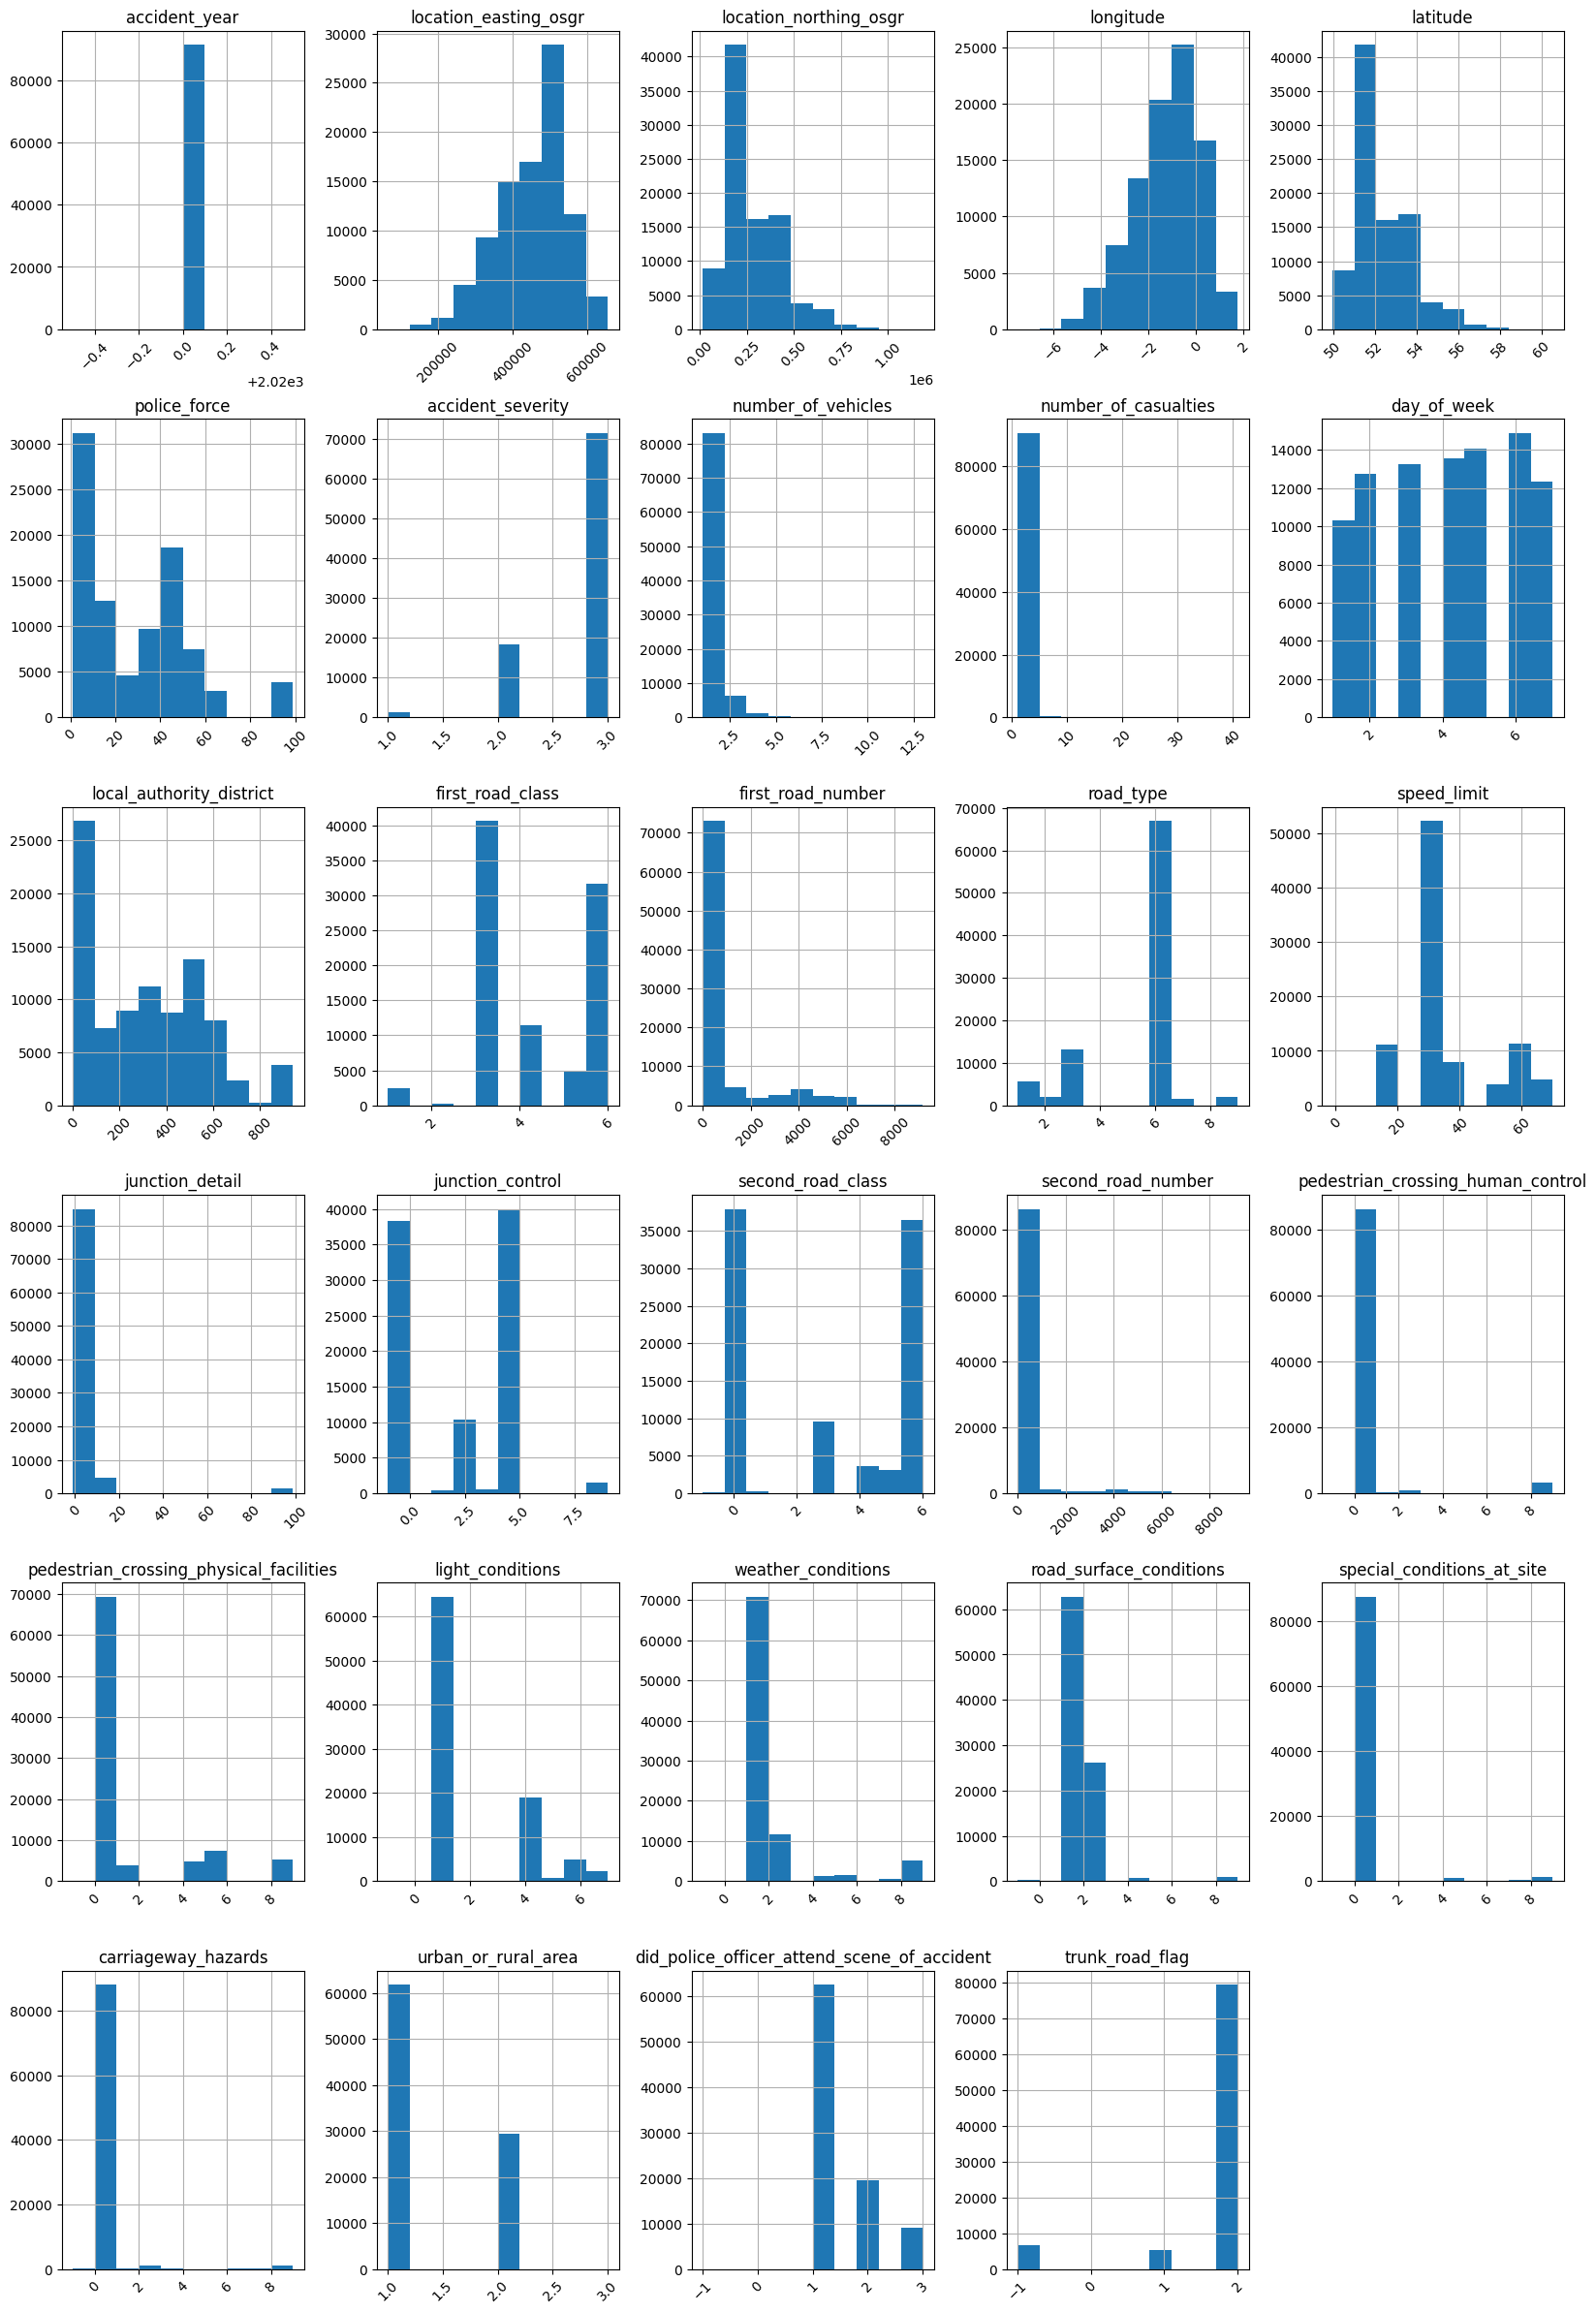

In [25]:
# visual exploration of the distribution in the features

Acc_df.hist(figsize = (20,30), xrot =45)
plt.show()

- The accident data is largely non-gaussian in nature (not normally distributed for most of the features)

In [26]:
cols = Acc_df.columns

for col in cols:
    count = (Acc_df[col] == -1).sum()
    if count > 0:
        print(f"There are {count} occurences of -1 in {col}")

There are 991 occurences of -1 in local_authority_district
There are 12 occurences of -1 in speed_limit
There are 2 occurences of -1 in junction_detail
There are 38298 occurences of -1 in junction_control
There are 110 occurences of -1 in second_road_class
There are 38045 occurences of -1 in second_road_number
There are 143 occurences of -1 in pedestrian_crossing_human_control
There are 135 occurences of -1 in pedestrian_crossing_physical_facilities
There are 1 occurences of -1 in light_conditions
There are 1 occurences of -1 in weather_conditions
There are 316 occurences of -1 in road_surface_conditions
There are 218 occurences of -1 in special_conditions_at_site
There are 208 occurences of -1 in carriageway_hazards
There are 1 occurences of -1 in did_police_officer_attend_scene_of_accident
There are 6710 occurences of -1 in trunk_road_flag


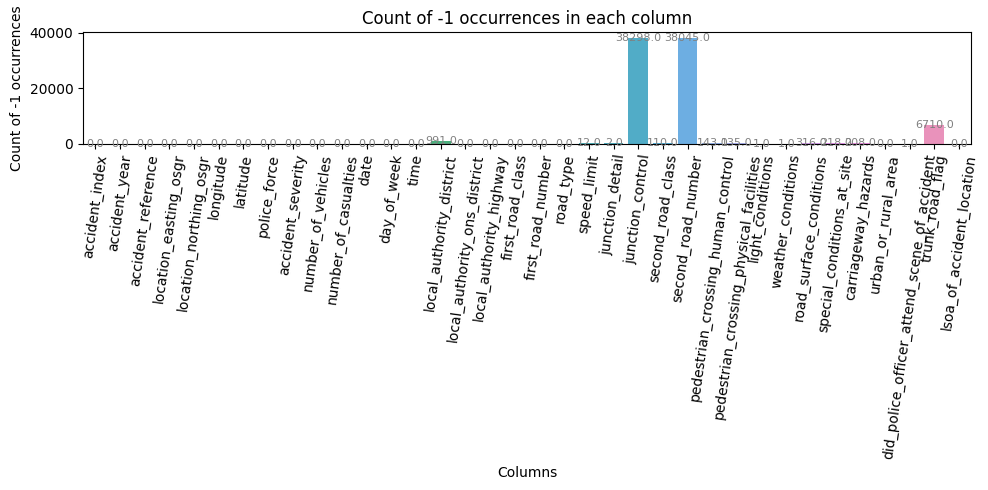

In [27]:
# Visualize -1

def plot_minus_one_counts(dataframe):
    """
    Plot the count of occurrences of '-1' in each column of the DataFrame.

    Parameters:
    dataframe (pd.DataFrame): The input DataFrame.

    Returns:
    None
    """
    # Get the list of column names
    cols = dataframe.columns

    # Dictionary to store the counts of '-1' occurrences for each column
    count_dict = {}

    # Count the occurrences of '-1' in each column
    for col in cols:
        count = (dataframe[col] == -1).sum()
        count_dict[col] = count

    # Convert the count_dict into a DataFrame for easier plotting
    count_df = pd.DataFrame.from_dict(count_dict, orient='index', columns=['Count'])

    # Set up the figure size and axis rotation
    plt.figure(figsize=(10, 5))
    plt.xticks(rotation=82)

    # Create the count plot for '-1' occurrences in each column
    plot = sns.barplot(data=count_df, x=count_df.index, y='Count')
    
    # Display count values on top of bars
    for p in plot.patches:
        plot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='grey')

    plt.xlabel('Columns')
    plt.ylabel('Count of -1 occurrences')
    plt.title('Count of -1 occurrences in each column')
    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame 'Acc_df'
plot_minus_one_counts(Acc_df)

### Vehicle Table

In [28]:
# Check for the dimension 
Veh_df.shape

(167375, 28)

- There are 28 columns and 167,375 rows in vehicle table

In [29]:
# Check the first few rows 
Veh_df.head()

vehicle_index accident_index  accident_year accident_reference   
0         681716  2020010219808           2020          010219808  \
1         681717  2020010220496           2020          010220496   
2         681718  2020010228005           2020          010228005   
3         681719  2020010228006           2020          010228006   
4         681720  2020010228011           2020          010228011   

   vehicle_reference  vehicle_type  towing_and_articulation   
0                  1             9                        9  \
1                  1             9                        0   
2                  1             9                        0   
3                  1             8                        0   
4                  1             9                        0   

   vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...   
0                  5                       1                     5  ...  \
1                  4                       2                     6  ...   
2                 18                      -1                    -1  ...   
3                 18                       1                     5  ...   
4                 18                       3                     7  ...   

   journey_purpose_of_driver  sex_of_driver  age_of_driver   
0                          6              2             32  \
1                          2              1             45   
2                          6              3             -1   
3                          1              1             44   
4                          6              1             20   

   age_band_of_driver  engine_capacity_cc  propulsion_code  age_of_vehicle   
0                   6                1968                2               6  \
1                   7                1395                1               2   
2                  -1                  -1               -1              -1   
3                   7                1798                8               8   
4                   4                2993                2               4   

   generic_make_model  driver_imd_decile  driver_home_area_type  
0             AUDI Q5                  4                      1  
1             AUDI A1                  7                      1  
2                  -1                 -1                     -1  
3        TOYOTA PRIUS                  2                      1  
4        BMW 4 SERIES                 -1                     -1  

[5 rows x 28 columns]

In [30]:
# Check the last few rows 
Veh_df.tail()

vehicle_index accident_index  accident_year accident_reference   
167370         849086  2020991030297           2020          991030297  \
167371         849087  2020991030297           2020          991030297   
167372         849088  2020991030900           2020          991030900   
167373         849089  2020991030900           2020          991030900   
167374         849090  2020991032575           2020          991032575   

        vehicle_reference  vehicle_type  towing_and_articulation   
167370                  1             9                        0  \
167371                  2             5                        0   
167372                  1             9                        0   
167373                  2             1                        0   
167374                  1             9                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...   
167370                  7                       8                     2  ...  \
167371                 16                       6                     2  ...   
167372                  7                       8                     2  ...   
167373                 18                       6                     2  ...   
167374                  1                       8                     4  ...   

        journey_purpose_of_driver  sex_of_driver  age_of_driver   
167370                          1              1             57  \
167371                          5              1             38   
167372                          6              2             68   
167373                          6              1             76   
167374                          6              1             39   

        age_band_of_driver  engine_capacity_cc  propulsion_code   
167370                   9                1968                2  \
167371                   7                1301                1   
167372                  10                1995                2   
167373                  11                  -1               -1   
167374                   7                 999                1   

        age_of_vehicle  generic_make_model  driver_imd_decile   
167370               2             AUDI A5                  7  \
167371               2  KTM 1290 SUPERDUKE                  9   
167372               1              BMW X3                  5   
167373              -1                  -1                  9   
167374               2          FORD FOCUS                  7   

        driver_home_area_type  
167370                      1  
167371                      2  
167372                      1  
167373                      1  
167374                      1  

[5 rows x 28 columns]

In [31]:
# Check statistics for numeric variables
Veh_df.describe()

vehicle_index  accident_year  vehicle_reference   vehicle_type   
count   167375.00000       167375.0      167375.000000  167375.000000  \
mean    765403.00000         2020.0           1.549198      10.051310   
std      48317.14499            0.0           2.538196      11.692412   
min     681716.00000         2020.0           1.000000       1.000000   
25%     723559.50000         2020.0           1.000000       9.000000   
50%     765403.00000         2020.0           1.000000       9.000000   
75%     807246.50000         2020.0           2.000000       9.000000   
max     849090.00000         2020.0         999.000000      98.000000   

       towing_and_articulation  vehicle_manoeuvre  vehicle_direction_from   
count            167375.000000      167375.000000           167375.000000  \
mean                  0.221664          19.538987                4.406387   
std                   1.344230          23.661274                2.718826   
min                  -1.000000          -1.000000               -1.000000   
25%                   0.000000           9.000000                2.000000   
50%                   0.000000          18.000000                5.000000   
75%                   0.000000          18.000000                7.000000   
max                   9.000000          99.000000                9.000000   

       vehicle_direction_to  vehicle_location_restricted_lane   
count         167375.000000                     167375.000000  \
mean               4.455068                          7.537870   
std                2.696937                         25.898393   
min               -1.000000                         -1.000000   
25%                2.000000                          0.000000   
50%                5.000000                          0.000000   
75%                7.000000                          0.000000   
max                9.000000                         99.000000   

       junction_location  ...  vehicle_left_hand_drive   
count      167375.000000  ...            167375.000000  \
mean            2.598303  ...                 1.448962   
std             3.285627  ...                 1.854349   
min            -1.000000  ...                -1.000000   
25%             0.000000  ...                 1.000000   
50%             1.000000  ...                 1.000000   
75%             6.000000  ...                 1.000000   
max             9.000000  ...                 9.000000   

       journey_purpose_of_driver  sex_of_driver  age_of_driver   
count              167375.000000  167375.000000  167375.000000  \
mean                    4.717066       1.480347      34.509658   
std                     1.914971       0.693344      20.797517   
min                    -1.000000      -1.000000      -1.000000   
25%                     4.000000       1.000000      22.000000   
50%                     6.000000       1.000000      34.000000   
75%                     6.000000       2.000000      49.000000   
max                     6.000000       3.000000     100.000000   

       age_band_of_driver  engine_capacity_cc  propulsion_code   
count       167375.000000       167375.000000    167375.000000  \
mean             5.780272         1332.294554         0.970121   
std              3.185713         1543.509942         1.585310   
min             -1.000000           -1.000000        -1.000000   
25%              5.000000           -1.000000        -1.000000   
50%              6.000000         1368.000000         1.000000   
75%              8.000000         1910.000000         2.000000   
max             11.000000        17696.000000        12.000000   

       age_of_vehicle  driver_imd_decile  driver_home_area_type  
count   167375.000000      167375.000000          167375.000000  
mean         5.820600           3.904143               0.871253  
std          6.331929           3.445329               1.072733  
min         -1.000000          -1.000000              -1.000000  
25%         -1.000000     

In [32]:
# Check statistics for categorical features
Veh_df.describe(include = 'object')

accident_index accident_reference generic_make_model
count          167375             167375             167375
unique          91199              91199                692
top     2020430342787          430342787                 -1
freq               13                 13              47637

In [33]:
# Check for duplicated records 
Veh_df.duplicated().sum()

0

- There are no duplicates in accident table

In [34]:
# Visually inspecting the columns in the table

cols = Veh_df.columns

for col in cols:
    print(col, Veh_df[col].unique())

vehicle_index [681716 681717 681718 ... 849088 849089 849090]
accident_index ['2020010219808' '2020010220496' '2020010228005' ... '2020991030297'
 '2020991030900' '2020991032575']
accident_year [2020]
accident_reference ['010219808' '010220496' '010228005' ... '991030297' '991030900'
 '991032575']
vehicle_reference [  1   2   3   4   5   6   7   8   9  10  11 999  12  13]
vehicle_type [ 9  8  3  2 11  1 90 19  4  5 21 97 20 98 10 17 23 22 18 16]
towing_and_articulation [ 9  0  3  1  5  4 -1  2]
vehicle_manoeuvre [ 5  4 18  3  2 99 11  1 17  9 14 13  7 15  6 16 10  8 12 -1]
vehicle_direction_from [ 1  2 -1  3  5  0  7  9  8  6  4]
vehicle_direction_to [ 5  6 -1  7  1  0  3  9  4  2  8]
vehicle_location_restricted_lane [ 0  9 99  2  6  5  4  1  8  7 -1  3]
junction_location [ 0  2  1  6  9  7  8  5  3  4 -1]
skidding_and_overturning [ 0  2  1  9  5 -1  3  4]
hit_object_in_carriageway [ 0 10  4 11 99  7 12  1  8 -1  9  2  6  5]
vehicle_leaving_carriageway [ 0  7  1  9  3  4  2  8  6  5 -1

In [35]:
# Check for the datatypes 
Veh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167375 entries, 0 to 167374
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   vehicle_index                     167375 non-null  int64 
 1   accident_index                    167375 non-null  object
 2   accident_year                     167375 non-null  int64 
 3   accident_reference                167375 non-null  object
 4   vehicle_reference                 167375 non-null  int64 
 5   vehicle_type                      167375 non-null  int64 
 6   towing_and_articulation           167375 non-null  int64 
 7   vehicle_manoeuvre                 167375 non-null  int64 
 8   vehicle_direction_from            167375 non-null  int64 
 9   vehicle_direction_to              167375 non-null  int64 
 10  vehicle_location_restricted_lane  167375 non-null  int64 
 11  junction_location                 167375 non-null  int64 
 12  sk

- Out of a total of 28 columns, there are 25 with datatype as integer while 3 are object datatypes.

In [36]:
# Check for Nan Values 
Veh_df.isnull().sum()

vehicle_index                       0
accident_index                      0
accident_year                       0
accident_reference                  0
vehicle_reference                   0
vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_direction_from              0
vehicle_direction_to                0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
hit_object_in_carriageway           0
vehicle_leaving_carriageway         0
hit_object_off_carriageway          0
first_point_of_impact               0
vehicle_left_hand_drive             0
journey_purpose_of_driver           0
sex_of_driver                       0
age_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
driver_imd_d

- There are no Nan values in Vehicle table

In [37]:
# separate the numeric features from the categorical features

Veh_num_vars = Veh_df.select_dtypes(np.number).columns
print(Veh_num_vars)
print(f'Number of numeric features in Accident table: {len(Veh_num_vars)}')
print(                           )
Veh_cat_vars = Veh_df.select_dtypes('object').columns
print(Veh_cat_vars)
print(f'Number of categorical features in Accident table: {len(Veh_cat_vars)}')

Index(['vehicle_index', 'accident_year', 'vehicle_reference', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'driver_imd_decile', 'driver_home_area_type'],
      dtype='object')
Number of numeric features in Accident table: 25

Index(['accident_index', 'accident_reference', 'generic_make_model'], dtype='object')
Number of categorical features in Accident table: 3


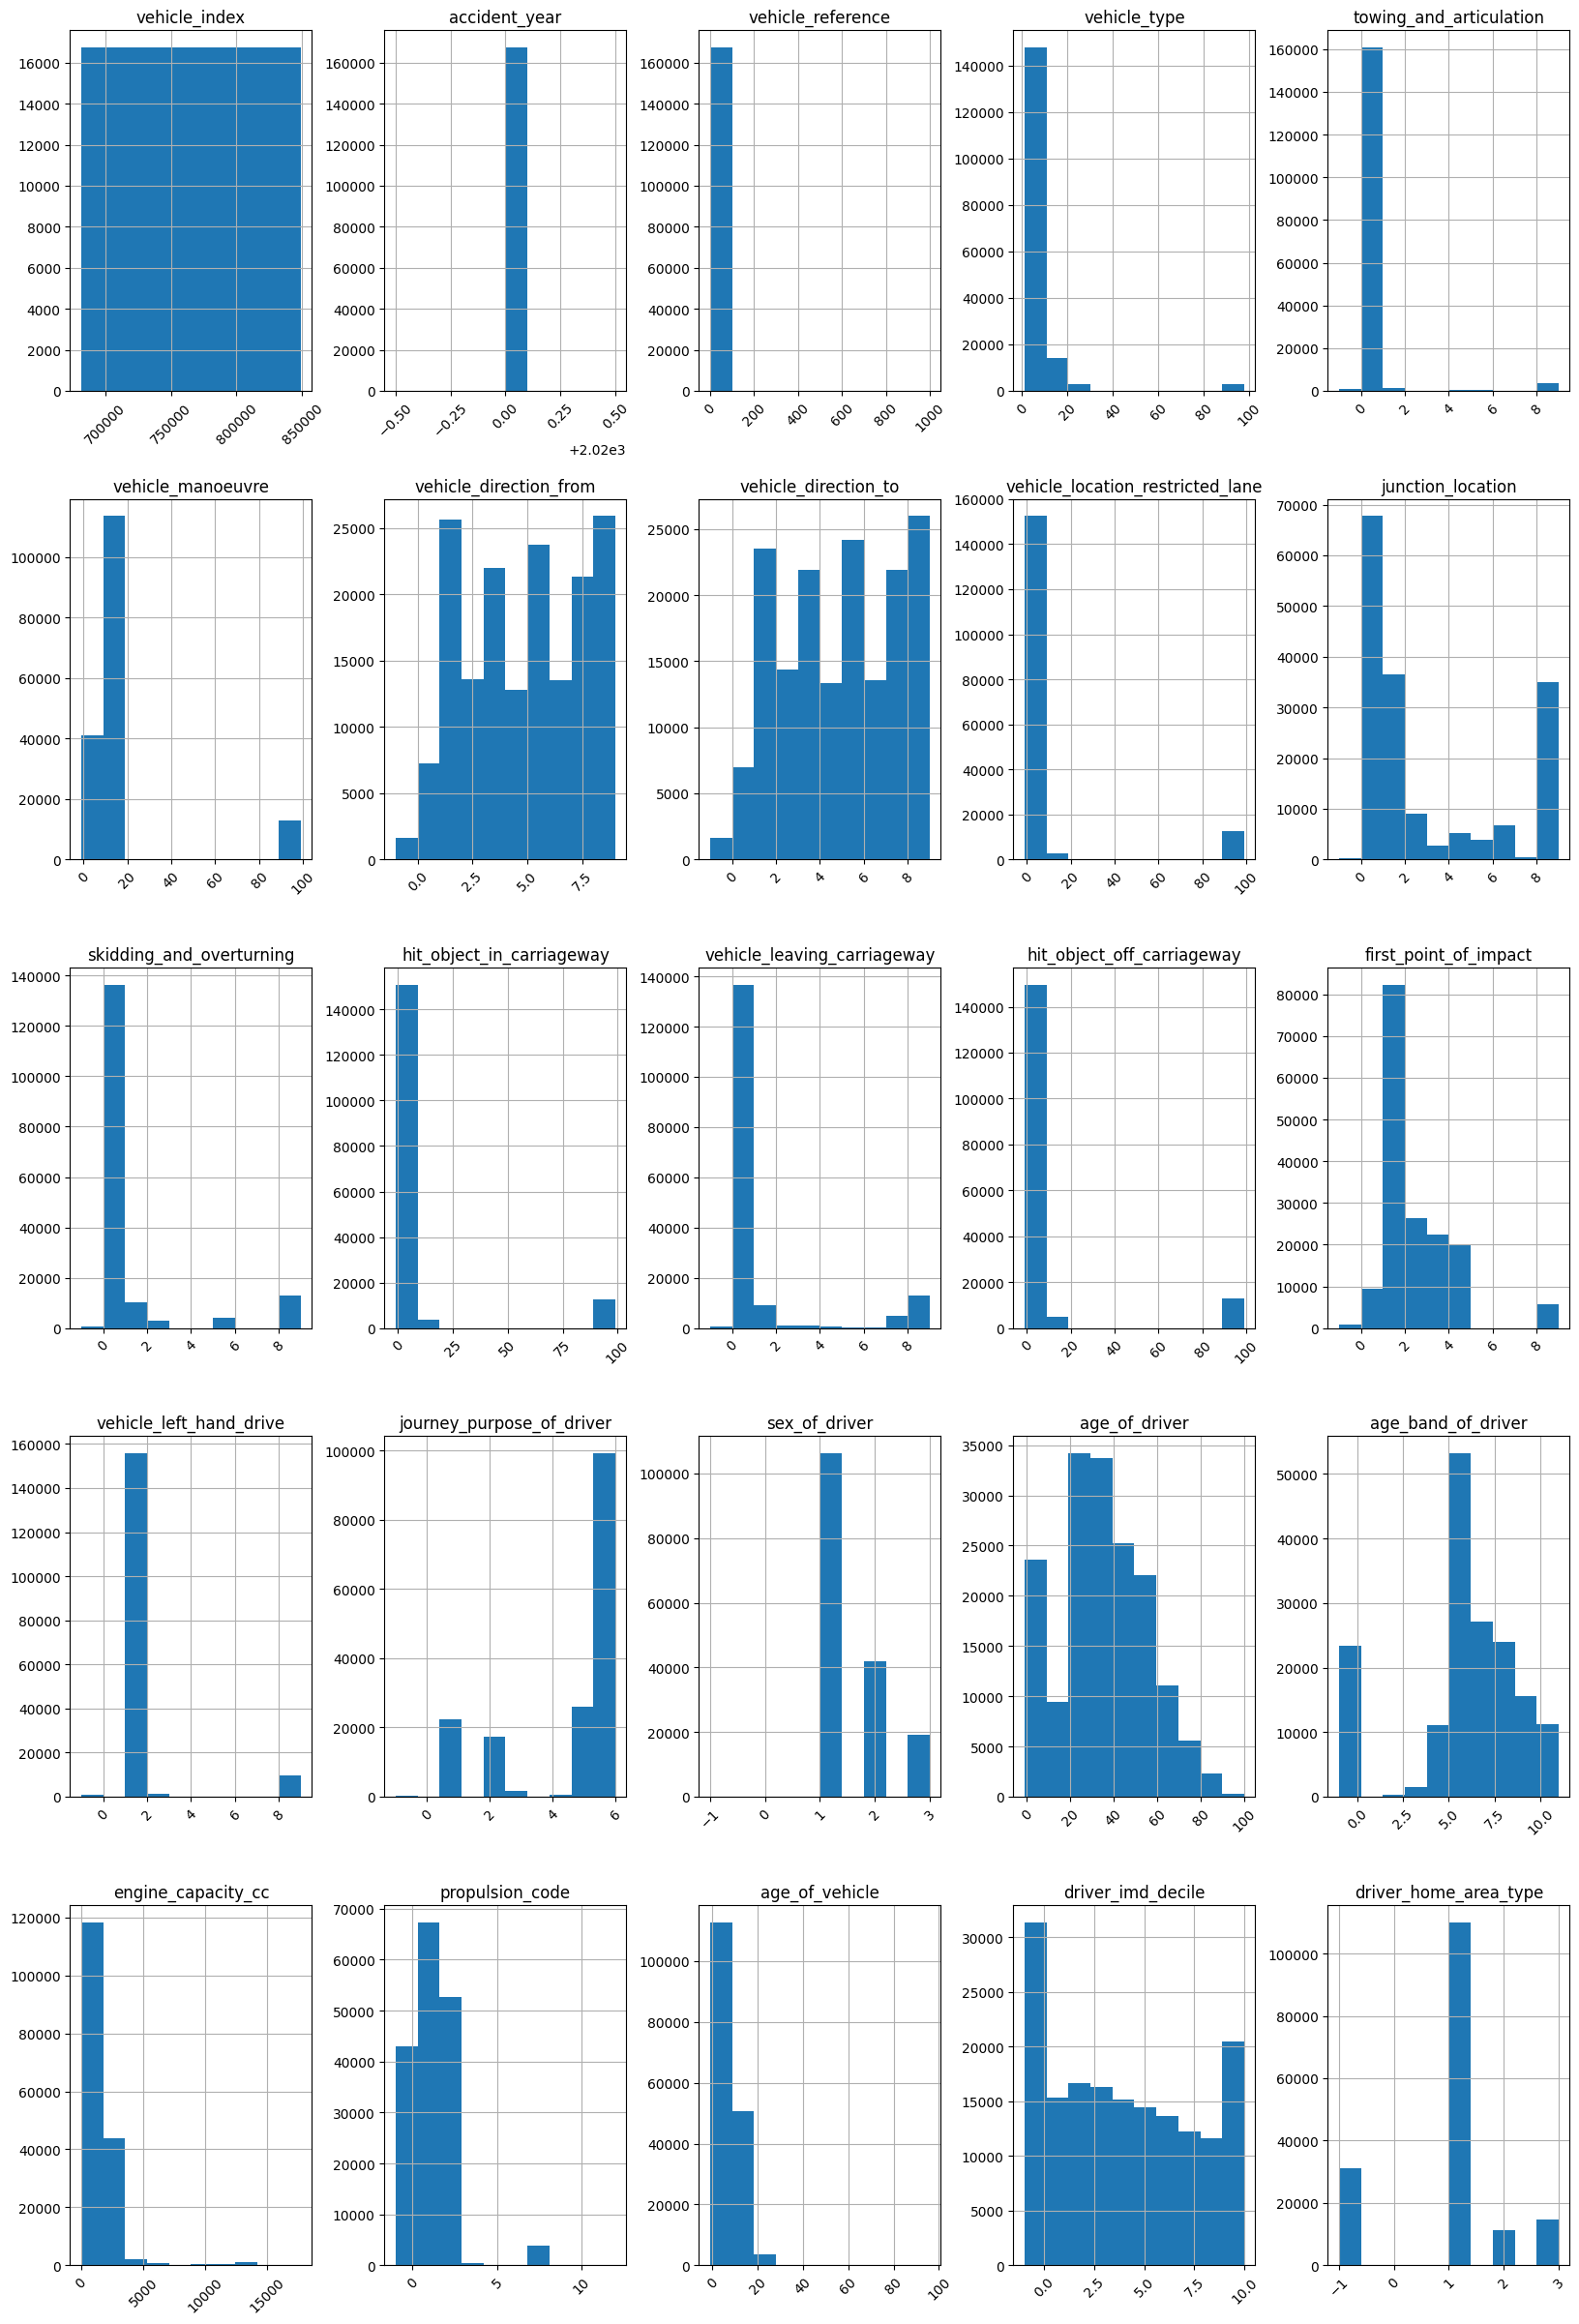

In [38]:
# visual exploration of the distribution in the features

Veh_df.hist(figsize = (20,30), xrot =45)
plt.show()

In [39]:
cols = Veh_df.columns

for col in cols:
    count = (Veh_df[col] == -1).sum()
    if count > 0:
        print(f"There are {count} occurences of -1 in {col}")

There are 689 occurences of -1 in towing_and_articulation
There are 679 occurences of -1 in vehicle_manoeuvre
There are 1640 occurences of -1 in vehicle_direction_from
There are 1653 occurences of -1 in vehicle_direction_to
There are 640 occurences of -1 in vehicle_location_restricted_lane
There are 284 occurences of -1 in junction_location
There are 662 occurences of -1 in skidding_and_overturning
There are 636 occurences of -1 in hit_object_in_carriageway
There are 644 occurences of -1 in vehicle_leaving_carriageway
There are 4 occurences of -1 in hit_object_off_carriageway
There are 939 occurences of -1 in first_point_of_impact
There are 877 occurences of -1 in vehicle_left_hand_drive
There are 184 occurences of -1 in journey_purpose_of_driver
There are 13 occurences of -1 in sex_of_driver
There are 23344 occurences of -1 in age_of_driver
There are 23344 occurences of -1 in age_band_of_driver
There are 43603 occurences of -1 in engine_capacity_cc
There are 43015 occurences of -1 in 

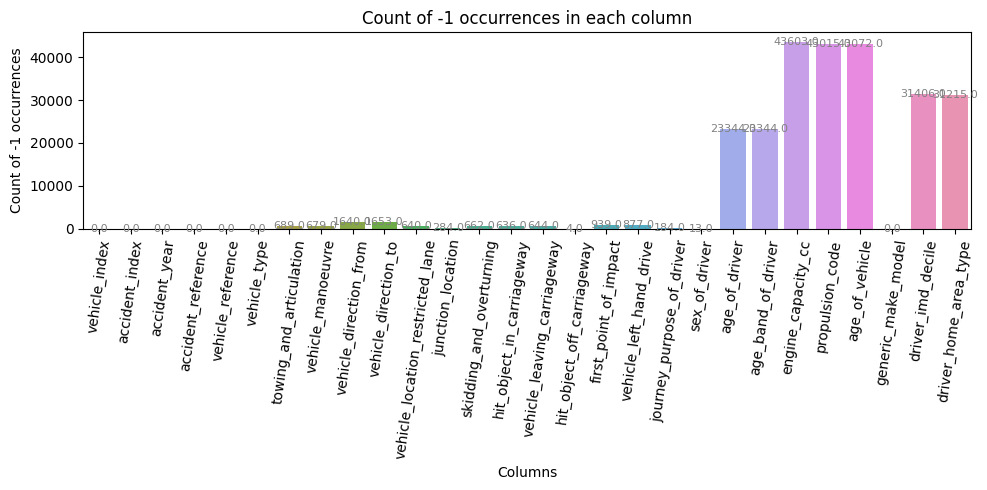

In [40]:
# Visualize -1

# Call the function with your DataFrame 'Veh_df'
plot_minus_one_counts(Veh_df)

### Casualty Table

In [41]:
# Check for the dimension 
Cas_df.shape

(115584, 19)

- There are 19 columns and 115,584 rows in casualty table

In [42]:
# Check the first few rows 
Cas_df.head()

casualty_index accident_index  accident_year accident_reference   
0          484748  2020010219808           2020          010219808  \
1          484749  2020010220496           2020          010220496   
2          484750  2020010220496           2020          010220496   
3          484751  2020010228005           2020          010228005   
4          484752  2020010228006           2020          010228006   

   vehicle_reference  casualty_reference  casualty_class  sex_of_casualty   
0                  1                   1               3                1  \
1                  1                   1               3                2   
2                  1                   2               3                2   
3                  1                   1               3                1   
4                  1                   1               3                1   

   age_of_casualty  age_band_of_casualty  casualty_severity   
0               31                     6                  3  \
1                2                     1                  3   
2                4                     1                  3   
3               23                     5                  3   
4               47                     8                  2   

   pedestrian_location  pedestrian_movement  car_passenger   
0                    9                    5              0  \
1                    1                    1              0   
2                    1                    1              0   
3                    5                    9              0   
4                    4                    1              0   

   bus_or_coach_passenger  pedestrian_road_maintenance_worker  casualty_type   
0                       0                                   0              0  \
1                       0                                   0              0   
2                       0                                   0              0   
3                       0                                   0              0   
4                       0                                   0              0   

   casualty_home_area_type  casualty_imd_decile  
0                        1                    4  
1                        1                    2  
2                        1                    2  
3                        1                    3  
4                        1                    3

In [43]:
# Check the last few rows 
Cas_df.tail()

casualty_index accident_index  accident_year accident_reference   
115579          600327  2020991027064           2020          991027064  \
115580          600328  2020991029573           2020          991029573   
115581          600329  2020991030297           2020          991030297   
115582          600330  2020991030900           2020          991030900   
115583          600331  2020991032575           2020          991032575   

        vehicle_reference  casualty_reference  casualty_class   
115579                  2                   1               1  \
115580                  1                   1               3   
115581                  2                   1               1   
115582                  2                   1               1   
115583                  1                   1               3   

        sex_of_casualty  age_of_casualty  age_band_of_casualty   
115579                1               11                     3  \
115580                2               63                     9   
115581                1               38                     7   
115582                1               76                    11   
115583                1               48                     8   

        casualty_severity  pedestrian_location  pedestrian_movement   
115579                  2                    0                    0  \
115580                  3                   10                    1   
115581                  2                    0                    0   
115582                  3                    0                    0   
115583                  3                    9                    9   

        car_passenger  bus_or_coach_passenger   
115579              0                       0  \
115580              0                       0   
115581              0                       0   
115582              0                       0   
115583              0                       0   

        pedestrian_road_maintenance_worker  casualty_type   
115579                                   0              1  \
115580                                   0              0   
115581                                   0              5   
115582                                   0              1   
115583                                   0              0   

        casualty_home_area_type  casualty_imd_decile  
115579                        1                    2  
115580                        1                   10  
115581                        2                    9  
115582                        1                    9  
115583                        1                    1

In [44]:
# Check statistics for numeric features
Cas_df.describe()

casualty_index  accident_year  vehicle_reference  casualty_reference   
count   115584.000000       115584.0      115584.000000       115584.000000  \
mean    542539.500000         2020.0           1.460557            1.347790   
std      33366.371094            0.0           2.991765            4.036721   
min     484748.000000         2020.0           1.000000            1.000000   
25%     513643.750000         2020.0           1.000000            1.000000   
50%     542539.500000         2020.0           1.000000            1.000000   
75%     571435.250000         2020.0           2.000000            1.000000   
max     600331.000000         2020.0         999.000000          992.000000   

       casualty_class  sex_of_casualty  age_of_casualty  age_band_of_casualty   
count   115584.000000    115584.000000    115584.000000         115584.000000  \
mean         1.441272         1.354859        36.489748              6.292610   
std          0.708365         0.520195        18.985022              2.392856   
min          1.000000        -1.000000        -1.000000             -1.000000   
25%          1.000000         1.000000        23.000000              5.000000   
50%          1.000000         1.000000        33.000000              6.000000   
75%          2.000000         2.000000        50.000000              8.000000   
max          3.000000         9.000000        99.000000             11.000000   

       casualty_severity  pedestrian_location  pedestrian_movement   
count      115584.000000        115584.000000        115584.000000  \
mean            2.800820             0.696861             0.561592   
std             0.429851             2.059930             1.879680   
min             1.000000            -1.000000            -1.000000   
25%             3.000000             0.000000             0.000000   
50%             3.000000             0.000000             0.000000   
75%             3.000000             0.000000             0.000000   
max             3.000000            10.000000             9.000000   

       car_passenger  bus_or_coach_passenger   
count  115584.000000           115584.000000  \
mean        0.223093                0.038950   
std         0.603991                0.381528   
min        -1.000000               -1.000000   
25%         0.000000                0.000000   
50%         0.000000                0.000000   
75%         0.000000                0.000000   
max         9.000000                9.000000   

       pedestrian_road_maintenance_worker  casualty_type   
count                       115584.000000  115584.000000  \
mean                             0.012709       7.388367   
std                              0.164516       9.914714   
min                             -1.000000       0.000000   
25%                              0.000000       1.000000   
50%                              0.000000       9.000000   
75%                              0.000000       9.000000   
max                              2.000000      98.000000   

       casualty_home_area_type  casualty_imd_decile  
count            115584.000000         115584.00000  
mean                  1.078177              4.36114  
std                   0.904791              3.17141  
min                  -1.000000             -1.00000  
25%                   1.000000              2.00000  
50%                   1.000000              4.00000  
75%                   1.000000              7.00000  
max                   3.000000             10.00000

In [45]:
# Check statistics for categorical features
Cas_df.describe(include = 'object')

accident_index accident_reference
count          115584             115584
unique          91199              91199
top     2020440349165          440349165
freq               41                 41

In [46]:
# Check for duplicated records 
Cas_df.duplicated().sum()

0

- There are no duplicates in casualty table

In [47]:
# Visually inspecting the columns in the table

cols = Cas_df.columns

for col in cols:
    print(col, Cas_df[col].unique())

casualty_index [484748 484749 484750 ... 600329 600330 600331]
accident_index ['2020010219808' '2020010220496' '2020010228005' ... '2020991030297'
 '2020991030900' '2020991032575']
accident_year [2020]
accident_reference ['010219808' '010220496' '010228005' ... '991030297' '991030900'
 '991032575']
vehicle_reference [  1   2   3   4   5   8   6   9  10 999   7  11]
casualty_reference [  1   2   3   4   5   6   7   8   9  10  11  40  12  13  14  15  16  17
  33  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  34  35
  36  37  38  39  41 902 992]
casualty_class [3 1 2]
sex_of_casualty [ 1  2 -1  9]
age_of_casualty [31  2  4 23 47 32 33 25 41 50 62 37 -1 20 42 30 18 26 29 38 39 80 19 21
 48  7 79 45 27 44 51 83 52 43 22 59 60 77 12 54 10 40 56 24 88 11  9 35
  5  3 16 57 67  6 49 46 53 28 69 15 76 36 55 61 85 34  8 87 58 73 64 65
  0 78 71 14 13 17  1 68 91 66 92 74 75 63 70 84 86 94 72 90 81 82 89 93
 96 95 98 99 97]
age_band_of_casualty [ 6  1  5  8  7  9 -1  4 11  2  3 10]


In [48]:
# Check for the datatypes 
Cas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115584 entries, 0 to 115583
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   casualty_index                      115584 non-null  int64 
 1   accident_index                      115584 non-null  object
 2   accident_year                       115584 non-null  int64 
 3   accident_reference                  115584 non-null  object
 4   vehicle_reference                   115584 non-null  int64 
 5   casualty_reference                  115584 non-null  int64 
 6   casualty_class                      115584 non-null  int64 
 7   sex_of_casualty                     115584 non-null  int64 
 8   age_of_casualty                     115584 non-null  int64 
 9   age_band_of_casualty                115584 non-null  int64 
 10  casualty_severity                   115584 non-null  int64 
 11  pedestrian_location                 115

- Out of a total of 19 columns, there are 17 with datatype as integer while 2 are object datatypes.

In [49]:
# Check for Nan Values
Cas_df.isnull().sum()

casualty_index                        0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64

- There are no Nan values in casualty table

In [50]:
# separate the numeric features from the categorical features

Cas_num_vars = Cas_df.select_dtypes(np.number).columns
print(Cas_num_vars)
print(f'Number of numeric features in Accident table: {len(Cas_num_vars)}')
print(                           )
Cas_cat_vars = Cas_df.select_dtypes('object').columns
print(Cas_cat_vars)
print(f'Number of categorical features in Accident table: {len(Cas_cat_vars)}')

Index(['casualty_index', 'accident_year', 'vehicle_reference',
       'casualty_reference', 'casualty_class', 'sex_of_casualty',
       'age_of_casualty', 'age_band_of_casualty', 'casualty_severity',
       'pedestrian_location', 'pedestrian_movement', 'car_passenger',
       'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker',
       'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile'],
      dtype='object')
Number of numeric features in Accident table: 17

Index(['accident_index', 'accident_reference'], dtype='object')
Number of categorical features in Accident table: 2


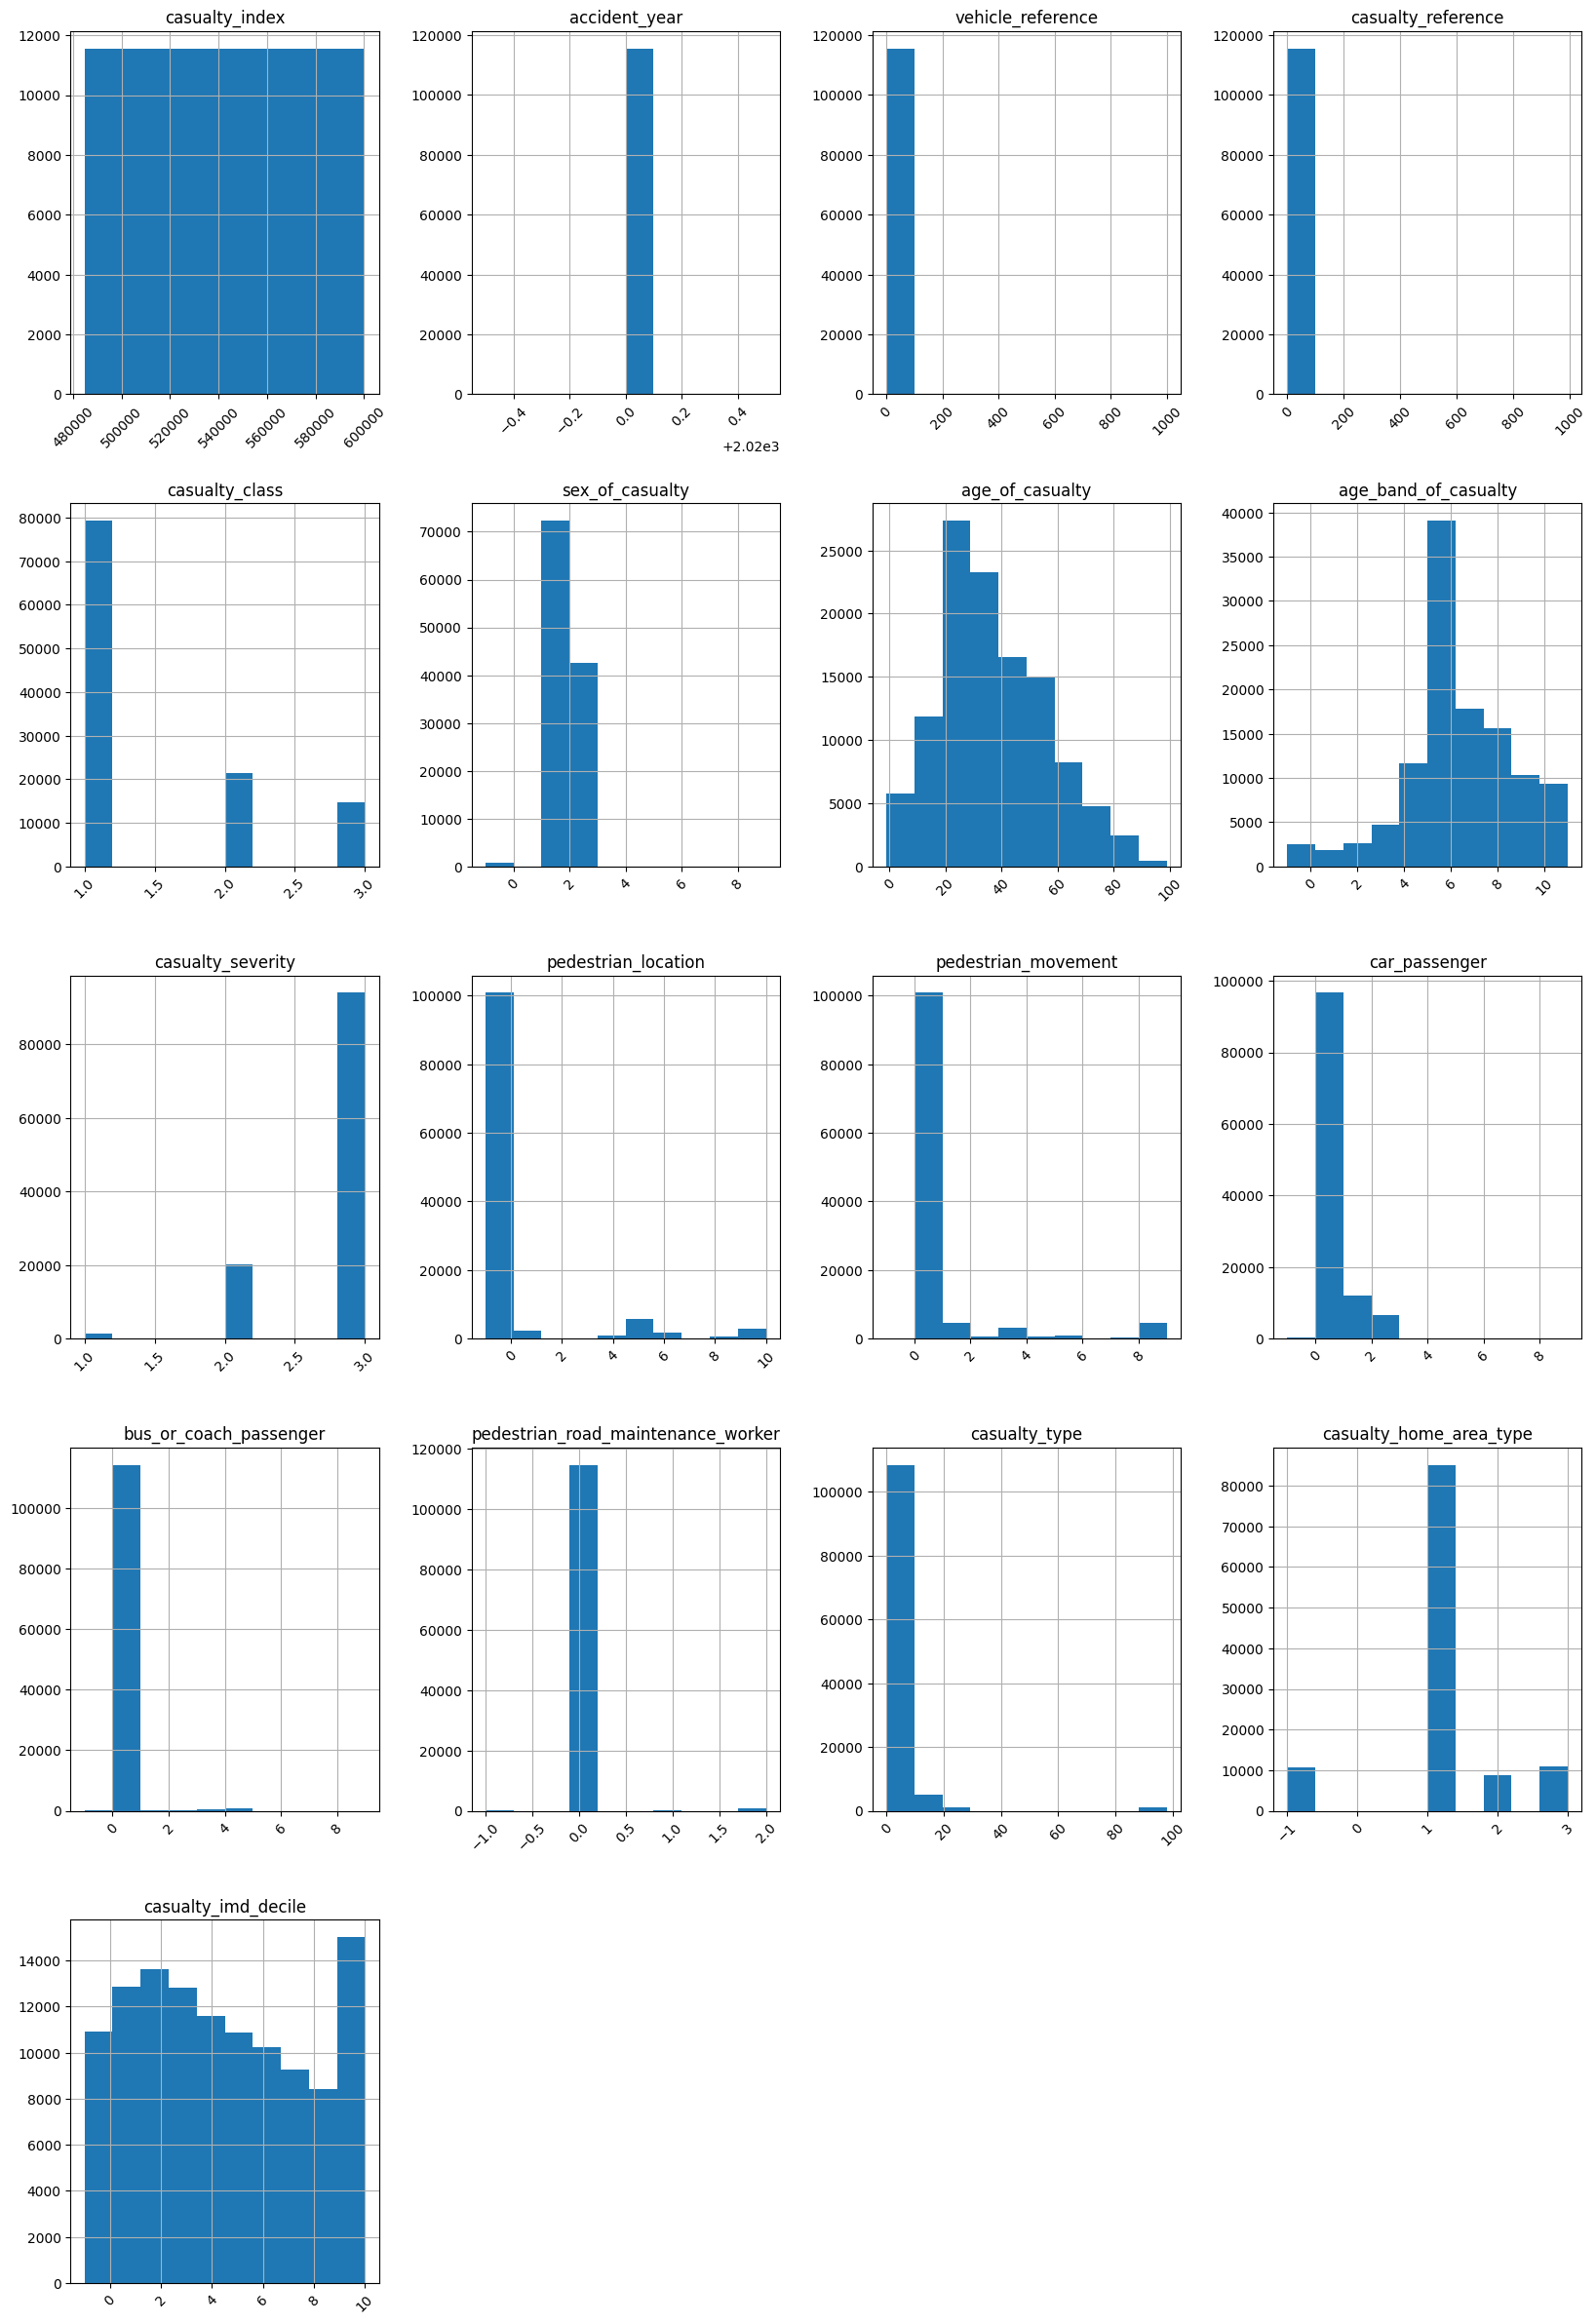

In [51]:
# visual exploration of the distribution in the features

Cas_df.hist(figsize = (20,30), xrot =45)
plt.show()

In [52]:
cols = Cas_df.columns

for col in cols:
    count = (Cas_df[col] == -1).sum()
    if count > 0:
        print(f"There are {count} occurences of -1 in {col}")

There are 756 occurences of -1 in sex_of_casualty
There are 2481 occurences of -1 in age_of_casualty
There are 2481 occurences of -1 in age_band_of_casualty
There are 2 occurences of -1 in pedestrian_location
There are 2 occurences of -1 in pedestrian_movement
There are 311 occurences of -1 in car_passenger
There are 22 occurences of -1 in bus_or_coach_passenger
There are 94 occurences of -1 in pedestrian_road_maintenance_worker
There are 10762 occurences of -1 in casualty_home_area_type
There are 10910 occurences of -1 in casualty_imd_decile


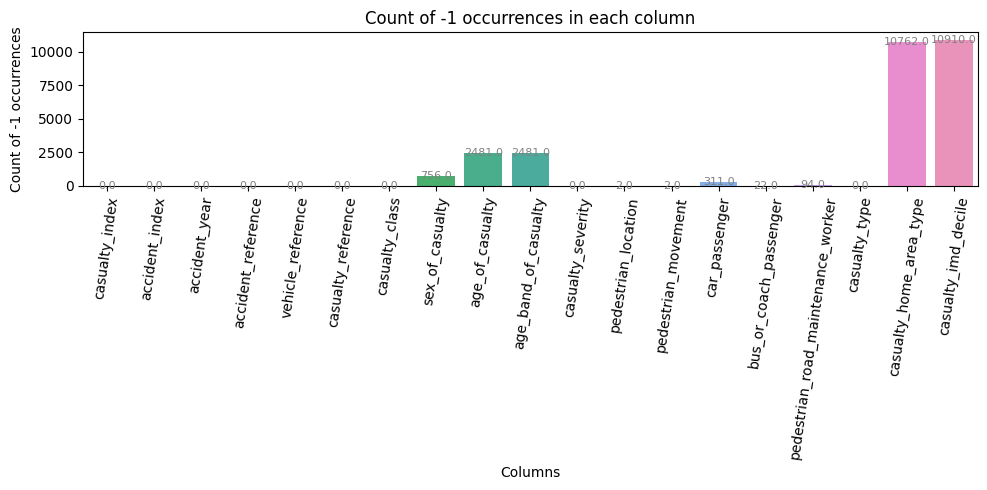

In [53]:
# Visualize -1

# Call the function with your DataFrame 'Cas_df'
plot_minus_one_counts(Cas_df)

### Lsoa Table

In [54]:
# Check for the dimension 
Lsoa_df.shape

(34378, 7)

- There are 7 columns and 34,378 rows in casualty table

In [55]:
# Check the first few rows 
Lsoa_df.head()

objectid   lsoa01cd             lsoa01nm            lsoa01nmw   
0         1  E01000001  City of London 001A  City of London 001A  \
1         2  E01000002  City of London 001B  City of London 001B   
2         3  E01000003  City of London 001C  City of London 001C   
3         4  E01000004  City of London 001D  City of London 001D   
4         5  E01000005  City of London 001E  City of London 001E   

    shape__area  shape__length                              globalid  
0  1.298652e+05    2635.772001  68cc6127-1008-4fbe-a16c-78fb089a7c43  
1  2.284189e+05    2707.986202  937edbc3-c1bf-4d35-b274-b0a1480a7c09  
2  5.905477e+04    1224.774479  2686dcaf-10b9-4736-92af-4788d4feaa69  
3  2.544551e+06   10718.466240  3c493140-0b3f-4b9a-b358-22011dc5fb89  
4  1.895782e+05    2275.809358  b569093d-788d-41be-816c-d6d7658b2311

In [56]:
# Check the first few rows 
Lsoa_df.tail()

objectid   lsoa01cd      lsoa01nm      lsoa01nmw   shape__area   
34373     34374  W01001892  Cardiff 020D  Caerdydd 020D  2.699088e+05  \
34374     34375  W01001893  Cardiff 010B  Caerdydd 010B  4.288488e+06   
34375     34376  W01001894  Cardiff 010C  Caerdydd 010C  3.337511e+05   
34376     34377  W01001895  Cardiff 010D  Caerdydd 010D  1.360174e+06   
34377     34378  W01001896  Cardiff 020E  Caerdydd 020E  3.124395e+05   

       shape__length                              globalid  
34373    2537.220060  1a25aa1e-5db5-4d32-8355-473409dbd69f  
34374    9807.284401  b6af5e24-eb2a-404a-98a6-a282037b3e10  
34375    2929.546177  72d16f53-115d-4926-936d-2f1b1d659d46  
34376    8141.281226  8e105eb9-f68e-4cdb-bca6-b49f6592cb71  
34377    3823.366435  c885f171-a56e-4e2b-8d09-1c7d6efedd67

In [57]:
# Check statistics for numeric features
Lsoa_df.describe()

objectid   shape__area  shape__length
count  34378.000000  3.437800e+04   34378.000000
mean   17189.500000  4.484756e+06    8672.586392
std     9924.218114  1.497949e+07   11186.682402
min        1.000000  1.836184e+04     794.752314
25%     8595.250000  2.804555e+05    3329.866718
50%    17189.500000  4.843540e+05    4605.231856
75%    25783.750000  1.509910e+06    7947.973477
max    34378.000000  6.837464e+08  176560.397355

In [58]:
# Check statistics for categorical features
Lsoa_df.describe(include = 'object')

lsoa01cd             lsoa01nm            lsoa01nmw   
count       34378                34378                34378  \
unique      34378                34378                34378   
top     E01000001  City of London 001A  City of London 001A   
freq            1                    1                    1   

                                    globalid  
count                                  34378  
unique                                 34378  
top     68cc6127-1008-4fbe-a16c-78fb089a7c43  
freq                                       1

In [59]:
# Check for duplicated records 
Lsoa_df.duplicated().sum()

0

In [60]:
# Visually inspecting the columns in the table

cols = Lsoa_df.columns

for col in cols:
    print(col, Lsoa_df[col].unique())

objectid [    1     2     3 ... 34376 34377 34378]
lsoa01cd ['E01000001' 'E01000002' 'E01000003' ... 'W01001894' 'W01001895'
 'W01001896']
lsoa01nm ['City of London 001A' 'City of London 001B' 'City of London 001C' ...
 'Cardiff 010C' 'Cardiff 010D' 'Cardiff 020E']
lsoa01nmw ['City of London 001A' 'City of London 001B' 'City of London 001C' ...
 'Caerdydd 010C' 'Caerdydd 010D' 'Caerdydd 020E']
shape__area [ 129865.23255157  228418.8966217    59054.76900482 ...  333751.11530304
 1360173.69174957  312439.51629257]
shape__length [2635.77200095 2707.98620167 1224.77447916 ... 2929.54617695 8141.28122607
 3823.36643468]
globalid ['68cc6127-1008-4fbe-a16c-78fb089a7c43'
 '937edbc3-c1bf-4d35-b274-b0a1480a7c09'
 '2686dcaf-10b9-4736-92af-4788d4feaa69' ...
 '72d16f53-115d-4926-936d-2f1b1d659d46'
 '8e105eb9-f68e-4cdb-bca6-b49f6592cb71'
 'c885f171-a56e-4e2b-8d09-1c7d6efedd67']


In [61]:
# Check for the datatypes 
Lsoa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34378 entries, 0 to 34377
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   objectid       34378 non-null  int64  
 1   lsoa01cd       34378 non-null  object 
 2   lsoa01nm       34378 non-null  object 
 3   lsoa01nmw      34378 non-null  object 
 4   shape__area    34378 non-null  float64
 5   shape__length  34378 non-null  float64
 6   globalid       34378 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.8+ MB


- Out of a total of 7 columns, there are 1 with datatype as integer, 2 as float while 3 are object datatypes

In [62]:
# Check for Nan Values
Lsoa_df.isnull().sum()

objectid         0
lsoa01cd         0
lsoa01nm         0
lsoa01nmw        0
shape__area      0
shape__length    0
globalid         0
dtype: int64

In [63]:
# separate the numeric features from the categorical features

Lsoa_num_vars = Lsoa_df.select_dtypes(np.number).columns
print(Lsoa_num_vars)
print(f'Number of numeric features in Accident table: {len(Lsoa_num_vars)}')
print(                           )
Lsoa_cat_vars = Lsoa_df.select_dtypes('object').columns
print(Lsoa_cat_vars)
print(f'Number of categorical features in Accident table: {len(Lsoa_cat_vars)}')

Index(['objectid', 'shape__area', 'shape__length'], dtype='object')
Number of numeric features in Accident table: 3

Index(['lsoa01cd', 'lsoa01nm', 'lsoa01nmw', 'globalid'], dtype='object')
Number of categorical features in Accident table: 4


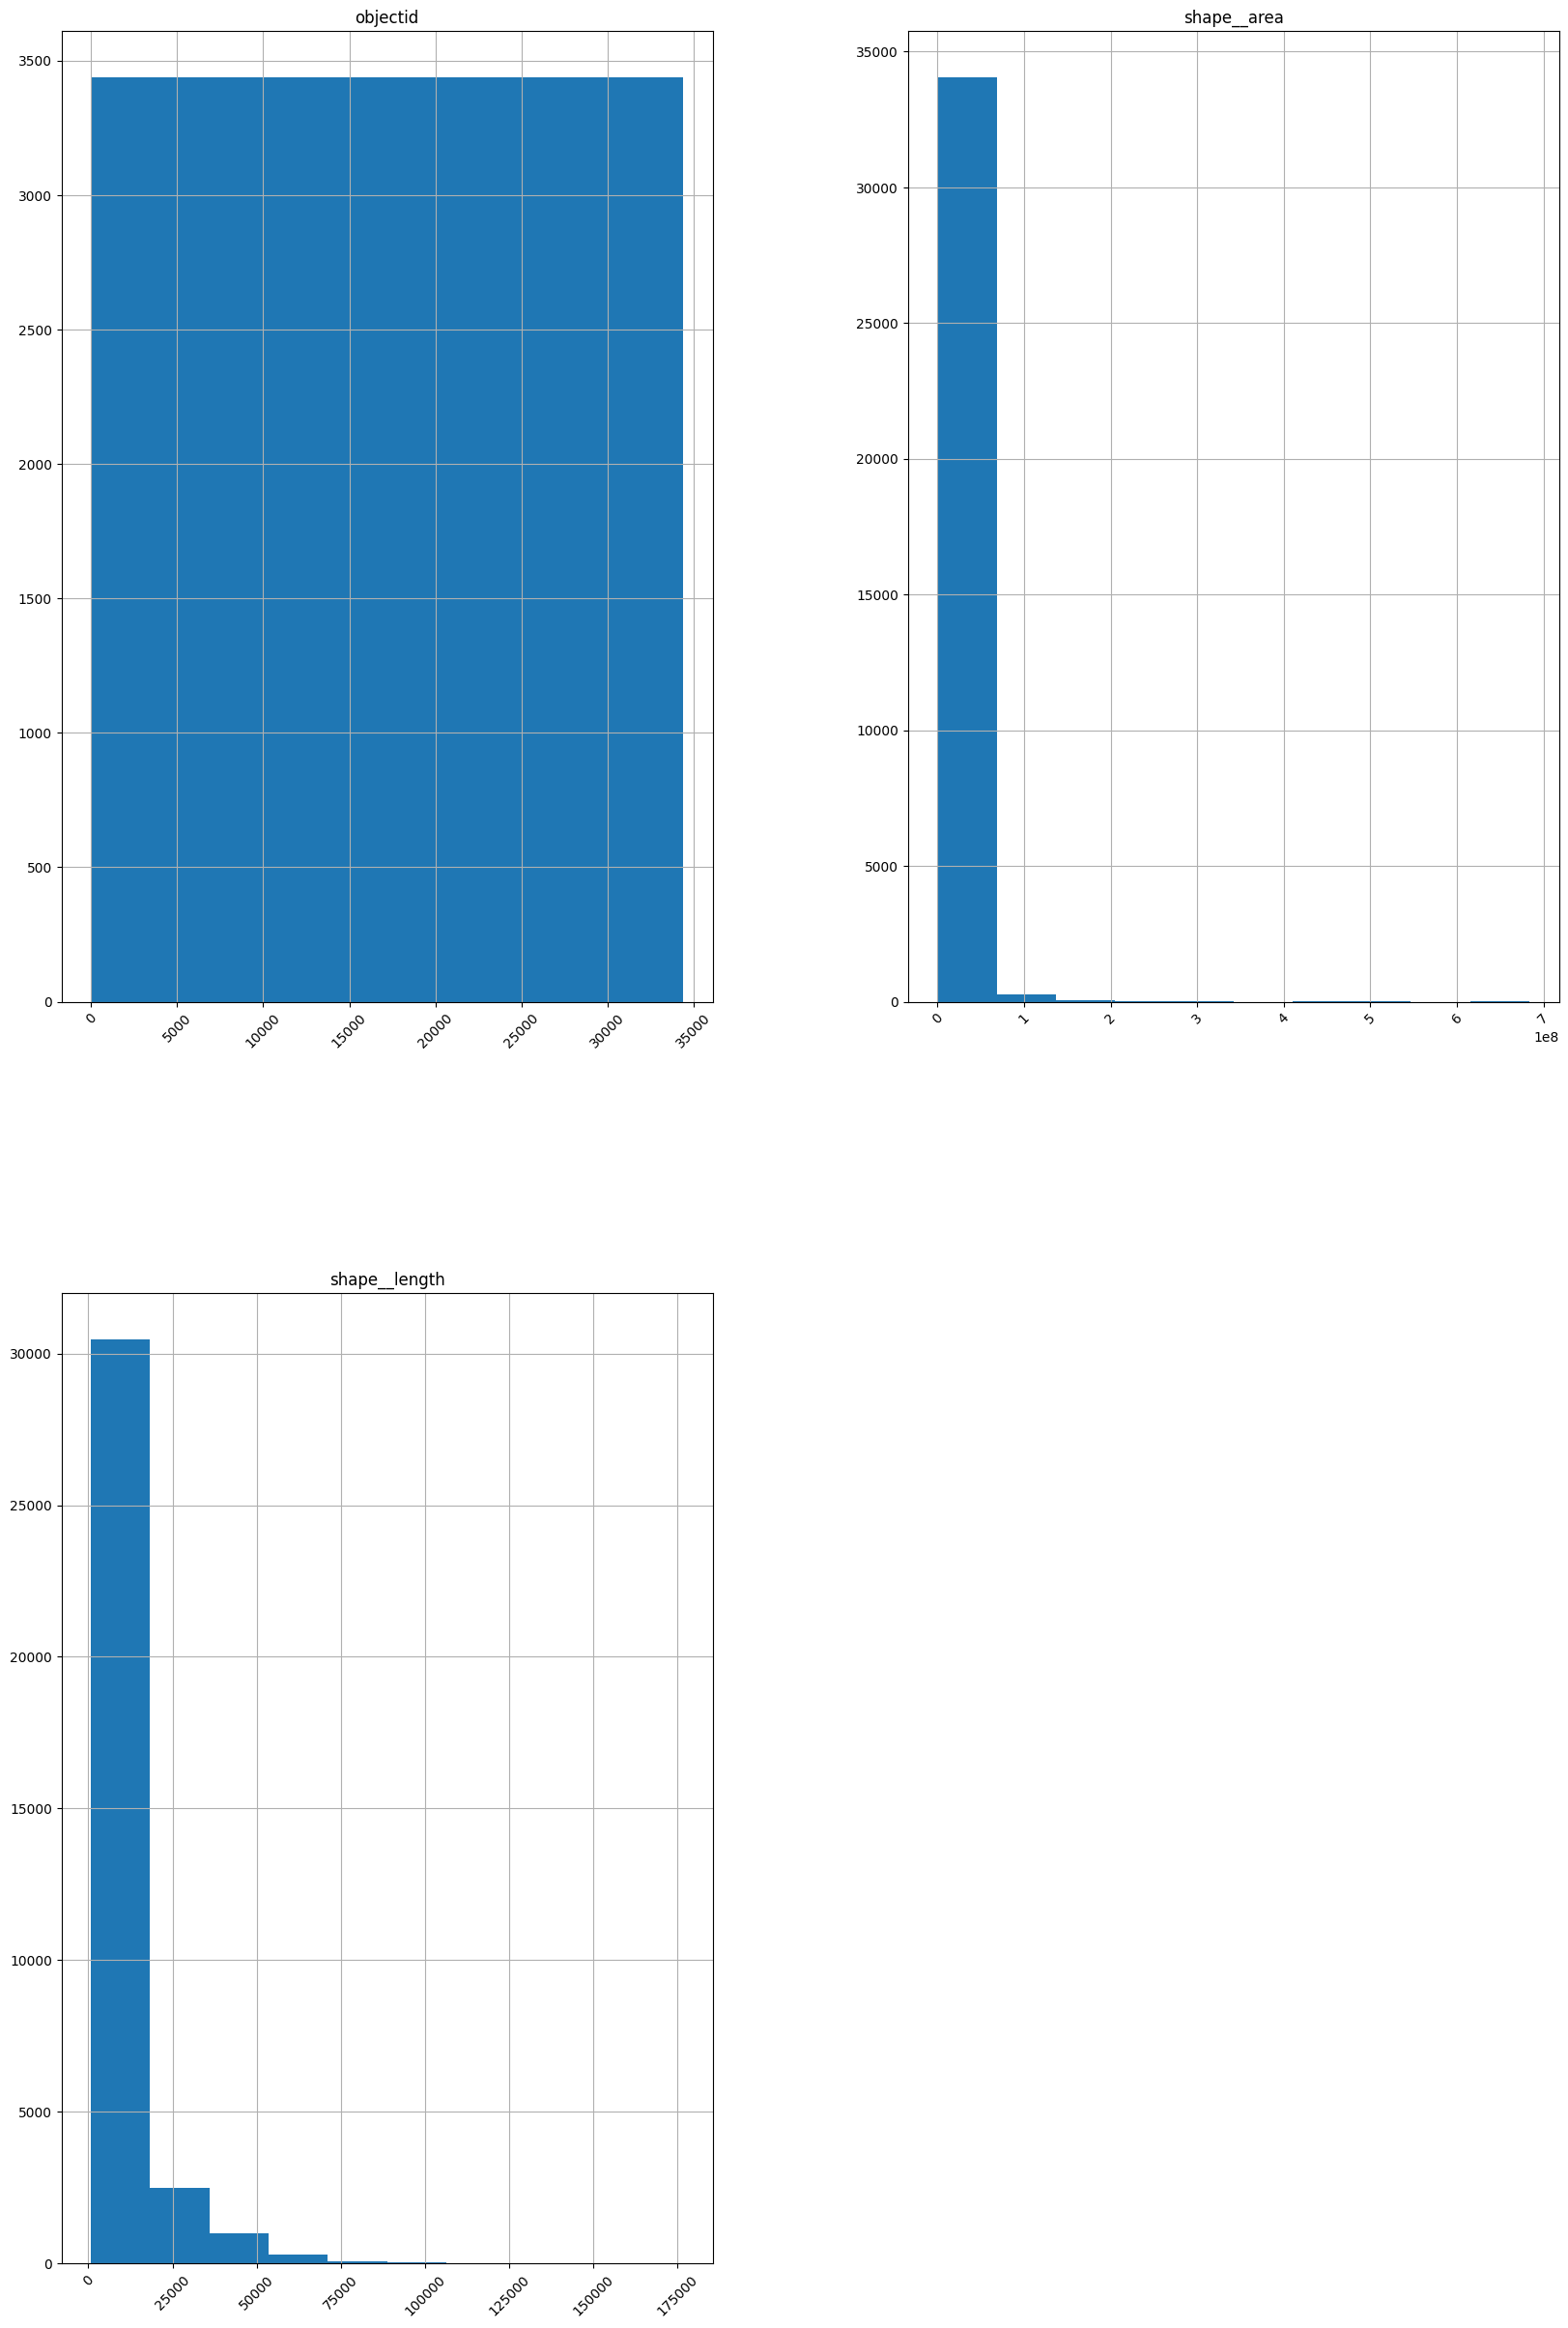

In [64]:
# visual exploration of the distribution in the features

Lsoa_df.hist(figsize = (20,30), xrot =45)
plt.show()

In [65]:

cols = Lsoa_df.columns

for col in cols:
    count = (Lsoa_df[col] == -1).sum()
    if count > 0:
        print(f"There are {count} occurences of -1 in {col}")

In [66]:
(Lsoa_df[col] == -1).sum()

0

- There are no occurence of -1 in Lsoa table

## Data Cleaning - Missing values

#### Treating Nan Values in Longitude column

In [67]:
# Check NaN values in longitude
Acc_df['longitude'].isnull().sum()

14

In [68]:
Acc_df['local_authority_ons_district'].unique()

array(['E09000032', 'E09000022', 'E09000033', 'E09000025', 'E09000023',
       'E09000011', 'E09000030', 'E09000014', 'E09000010', 'E09000006',
       'E09000016', 'E09000029', 'E09000019', 'E09000005', 'E09000008',
       'E09000020', 'E09000003', 'E09000026', 'E09000002', 'E09000021',
       'E09000012', 'E09000028', 'E09000024', 'E09000017', 'E09000018',
       'E09000013', 'E09000009', 'E09000031', 'E09000004', 'E09000027',
       'E09000007', 'E09000015', 'EHEATHROW', 'E07000029', 'E07000030',
       'E07000028', 'E07000031', 'E07000026', 'E07000027', 'E06000009',
       'E07000125', 'E07000128', 'E07000123', 'E07000122', 'E07000119',
       'E07000121', 'E06000008', 'E07000120', 'E07000117', 'E07000127',
       'E07000126', 'E07000118', 'E07000124', 'E08000013', 'E08000015',
       'E08000011', 'E08000012', 'E08000014', 'E08000007', 'E08000010',
       'E08000001', 'E08000005', 'E08000003', 'E08000006', 'E08000008',
       'E08000009', 'E08000002', 'E08000004', 'E06000007', 'E060

In [69]:
# Selecting Nan values in 'longitude'
Null_longitude = Acc_df[Acc_df['longitude'].isnull()]

# Accessing local districts from longitudes with NaN values 
district_Null_longitude_list = Null_longitude['local_authority_ons_district'].tolist()

#Calculate the mean by district
district_mean_longitude = Acc_df.groupby('local_authority_ons_district')['longitude'].mean()


print(district_Null_longitude_list)
print(               )
print(district_mean_longitude)


['E08000013', 'E06000050', 'E07000164', 'E08000036', 'E06000024', 'W06000015', 'W06000010', 'W06000010', 'W06000010', 'W06000010', 'W06000010', 'W06000009', 'W06000009', 'W06000023']

local_authority_ons_district
E06000001   -1.229307
E06000002   -1.227904
E06000003   -1.078963
E06000004   -1.315058
E06000005   -1.544287
               ...   
W06000020   -3.030028
W06000021   -2.836937
W06000022   -2.986721
W06000023   -3.373685
W06000024   -3.362635
Name: longitude, Length: 378, dtype: float64


In [70]:
# Fill NaN values in 'longitude' column with the mean longitude of the corresponding district
for index, row in Acc_df.iterrows():
    district_code = row['local_authority_ons_district']
    if pd.isna(row['longitude']) and district_code in district_mean_longitude:
        Acc_df.at[index, 'longitude'] = district_mean_longitude[district_code]


In [71]:
# Sanity check
Acc_df['longitude'].isnull().sum()

0

- The missing values in longitude was filled with the mean of longitude for the districts in the same local authority as the record for the missing longitude.

#### Treating Nan Values in Latitude column

In [72]:
# Check NaN values in latutude
Acc_df['latitude'].isnull().sum()

14

In [73]:
# Selecting Nan values in 'latitude'
Null_latitude = Acc_df[Acc_df['latitude'].isnull()]

# Accessing local districts from latitudes with NaN values
district_Null_latitude_list = Null_latitude['local_authority_ons_district'].tolist()

#Calculate the mean by district
district_mean_latitude = Acc_df.groupby('local_authority_ons_district')['latitude'].mean()

print(district_Null_longitude_list)
print(               )
print(district_mean_longitude)


['E08000013', 'E06000050', 'E07000164', 'E08000036', 'E06000024', 'W06000015', 'W06000010', 'W06000010', 'W06000010', 'W06000010', 'W06000010', 'W06000009', 'W06000009', 'W06000023']

local_authority_ons_district
E06000001   -1.229307
E06000002   -1.227904
E06000003   -1.078963
E06000004   -1.315058
E06000005   -1.544287
               ...   
W06000020   -3.030028
W06000021   -2.836937
W06000022   -2.986721
W06000023   -3.373685
W06000024   -3.362635
Name: longitude, Length: 378, dtype: float64


In [74]:
# Fill NaN values in 'latitude' column with the mean latitude of the corresponding district
for index, row in Acc_df.iterrows():
    district_code = row['local_authority_ons_district']
    if pd.isna(row['latitude']) and district_code in district_mean_latitude:
        Acc_df.at[index, 'latitude'] = district_mean_latitude[district_code]

In [75]:
# Sanity check
Acc_df['latitude'].isnull().sum()

0

#### Treating Nan Values in 'location_easting_osgr' column

In [76]:
# Check NaN values in 'location_easting_osgr'
Acc_df['location_easting_osgr'].isnull().sum()

14

In [77]:
# Selecting Nan values in 'location_easting_osgr'
Null_easting_loc = Acc_df[Acc_df['location_easting_osgr'].isnull()]

# Accessing local districts from 'location_easting_osgr' with NaN values 
district_Null_easting_list = Null_easting_loc['local_authority_ons_district'].tolist()

#Calculate the mean by district
district_mean_easting_loc = Acc_df.groupby('local_authority_ons_district')['location_easting_osgr'].mean()

print(district_Null_easting_list)
print(               )
print(district_mean_easting_loc)


['E08000013', 'E06000050', 'E07000164', 'E08000036', 'E06000024', 'W06000015', 'W06000010', 'W06000010', 'W06000010', 'W06000010', 'W06000010', 'W06000009', 'W06000009', 'W06000023']

local_authority_ons_district
E06000001    449791.450000
E06000002    450035.169492
E06000003    459646.818966
E06000004    444380.977401
E06000005    429588.766990
                 ...      
W06000020    328891.557377
W06000021    342262.512821
W06000022    331735.039216
W06000023    306484.078341
W06000024    305998.083333
Name: location_easting_osgr, Length: 378, dtype: float64


In [78]:
# Fill NaN values in 'location_easting_osgr' column with the mean location_easting_osgr of the corresponding district
for index, row in Acc_df.iterrows():
    district_code = row['local_authority_ons_district']
    if pd.isna(row['location_easting_osgr']) and district_code in district_mean_easting_loc:
        Acc_df.at[index, 'location_easting_osgr'] = district_mean_easting_loc[district_code]

In [79]:
# Sanity check
Acc_df['local_authority_ons_district'].isnull().sum()

0

#### Treating Nan Values in 'location_northing_osgr' column

In [80]:
# Check NaN values in 'location_easting_osgr'
Acc_df['location_northing_osgr'].isnull().sum()

14

In [81]:
# Selecting Nan values in 'location_northing_osgr'
Null_northing_loc = Acc_df[Acc_df['location_northing_osgr'].isnull()]

# Accessing local districts from 'location_northing_osgr' with NaN values  
district_Null_northing_list = Null_northing_loc['local_authority_ons_district'].tolist()

#Calculate the mean by district
district_mean_northing_loc = Acc_df.groupby('local_authority_ons_district')['location_northing_osgr'].mean()

print(district_Null_northing_list)
print(               )
print(district_mean_northing_loc)


['E08000013', 'E06000050', 'E07000164', 'E08000036', 'E06000024', 'W06000015', 'W06000010', 'W06000010', 'W06000010', 'W06000010', 'W06000010', 'W06000009', 'W06000009', 'W06000023']

local_authority_ons_district
E06000001    531921.930000
E06000002    517992.101695
E06000003    519722.344828
E06000004    519680.853107
E06000005    515296.048544
                 ...      
W06000020    199132.524590
W06000021    199983.794872
W06000022    188055.339869
W06000023    272422.474654
W06000024    204753.229167
Name: location_northing_osgr, Length: 378, dtype: float64


In [82]:
# Fill NaN values in 'location_northing_osgr' column with the mean location_northing_osgr of the corresponding district
for index, row in Acc_df.iterrows():
    district_code = row['local_authority_ons_district']
    if pd.isna(row['location_northing_osgr']) and district_code in district_mean_northing_loc:
        Acc_df.at[index, 'location_northing_osgr'] = district_mean_northing_loc[district_code]

In [83]:
# Sanity check
Acc_df['location_northing_osgr'].isnull().sum()

0

In [84]:
# Sanity check
Acc_df.isnull().sum()

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit         

- Local authorities/police using link/node systems are expected to code their accidents on the above
basis but a local authority can have an additional variable for link/node reference on its local variant
of STATS19, for local use, if it so chooses. If so, this information is not to be sent to DfT/SG/WG

### Join the Tables

In [85]:
Cas_Acc_df = Cas_df.merge(Acc_df, on = "accident_index")
Cas_Veh_df = Cas_df.merge(Veh_df, on = "accident_index")
Acc_Veh_df = Acc_df.merge(Veh_df, on = "accident_index")
Cas_Veh_Acc_df = Acc_df.merge(Cas_Veh_df, on = "accident_index")

In [86]:
# Check the whole tables
Cas_Veh_Acc_df

accident_index  accident_year accident_reference   
0       2020010219808           2020          010219808  \
1       2020010220496           2020          010220496   
2       2020010220496           2020          010220496   
3       2020010228005           2020          010228005   
4       2020010228006           2020          010228006   
...               ...            ...                ...   
220430  2020991030297           2020          991030297   
220431  2020991030297           2020          991030297   
220432  2020991030900           2020          991030900   
220433  2020991030900           2020          991030900   
220434  2020991032575           2020          991032575   

        location_easting_osgr  location_northing_osgr  longitude   latitude   
0                    521389.0                175144.0  -0.254001  51.462262  \
1                    529337.0                176237.0  -0.139253  51.470327   
2                    529337.0                176237.0  -0.139253  51.470327   
3                    526432.0                182761.0  -0.178719  51.529614   
4                    538676.0                184371.0  -0.001683  51.541210   
...                       ...                     ...        ...        ...   
220430               383664.0                810646.0  -2.271903  57.186317   
220431               383664.0                810646.0  -2.271903  57.186317   
220432               277161.0                674852.0  -3.968753  55.950940   
220433               277161.0                674852.0  -3.968753  55.950940   
220434               240402.0                681950.0  -4.561040  56.003843   

        police_force  accident_severity  number_of_vehicles  ...   
0                  1                  3                   1  ...  \
1                  1                  3                   1  ...   
2                  1                  3                   1  ...   
3                  1                  3                   1  ...   
4                  1                  2                   1  ...   
...              ...                ...                 ...  ...   
220430            99                  2                   2  ...   
220431            99                  2                   2  ...   
220432            99                  3                   2  ...   
220433            99                  3                   2  ...   
220434            99                  3                   1  ...   

        journey_purpose_of_driver sex_of_driver  age_of_driver   
0                               6             2             32  \
1                               2             1             45   
2                               2             1             45   
3                               6             3             -1   
4                               1             1             44   
...                           ...           ...            ...   
220430                          1             1             57   
220431                          5             1             38   
220432                          6             2             68   
220433                          6             1             76   
220434                          6             1             39   

       age_band_of_driver  engine_capacity_cc propulsion_code age_of_vehicle   
0                       6                1968               2              6  \
1                       7                1395               1              2   
2                       7                1395               1              2   
3                      -1                  -1              -1             -1   
4                       7                1798               8              8   
...                   ...                 ...             ...            ...   
220430                  9                1968               2              2   
220431                  7                1301               1              2   
220432             

In [87]:
Cas_Veh_Acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220435 entries, 0 to 220434
Data columns (total 81 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               220435 non-null  object 
 1   accident_year                                220435 non-null  int64  
 2   accident_reference                           220435 non-null  object 
 3   location_easting_osgr                        220435 non-null  float64
 4   location_northing_osgr                       220435 non-null  float64
 5   longitude                                    220435 non-null  float64
 6   latitude                                     220435 non-null  float64
 7   police_force                                 220435 non-null  int64  
 8   accident_severity                            220435 non-null  int64  
 9   number_of_vehicles                           220435 non-nul

## Analysis

### A. Trends in the data

#### Day and Time

- significant hours of the day, and days of the week, which accidents occur

In [88]:
# Defining a function to display plots of accident days and time with their counts and percentages

def plot_accidents_by_time(dataframe, title_hour, title_day):
    # Convert the 'time' column to datetime type
    dataframe['time'] = pd.to_datetime(dataframe['time'])

    # Extract the hour of the day from the 'time' column
    dataframe['hour_of_day'] = dataframe['time'].dt.hour

    # Group the data by the hour of the day and calculate the total number of accidents for each hour
    Acc_by_hour = dataframe.groupby('hour_of_day')['accident_index'].count()

    # Create a dictionary to map the accidents day of the week index to actual days of the week
    day_mapping = {
        1: 'Sunday',
        2: 'Monday',
        3: 'Tuesday',
        4: 'Wednesday',  
        5: 'Thursday',
        6: 'Friday',
        7: 'Saturday'
    }

    # Group the data by the day of the week and calculate the total number of accidents for each day
    Acc_by_day_of_week = dataframe.groupby('day_of_week')['accident_index'].count()
    Acc_by_day_of_week.index = Acc_by_day_of_week.index.map(day_mapping)

    # Calculate total counts for percentages
    total_Acc_by_hour = sum(Acc_by_hour)
    total_Acc_by_day_of_week = sum(Acc_by_day_of_week)

    # Create subplots for the two graphs
    fig, axes = plt.subplots(2, 1, figsize=(10, 12))

    # Plot the accidents by hour of the day
    sns.barplot(x=Acc_by_hour.index, y=Acc_by_hour.values, ax=axes[0])
    axes[0].set_title(title_hour)
    axes[0].set_xlabel('Hour of the Day')
    axes[0].set_ylabel('Number of Accidents')

    # Annotate the bars with both count values and percentages
    for i, value in enumerate(Acc_by_hour.values):
        percentage = (value / total_Acc_by_hour) * 100
        axes[0].text(i, value + 1, f'{value}\n{percentage:.1f}%', ha='center', va='bottom', fontsize=8, color='grey')

    # Plot the accidents by day of the week
    sns.barplot(x=Acc_by_day_of_week.index, y=Acc_by_day_of_week.values, ax=axes[1])
    axes[1].set_title(title_day)
    axes[1].set_xlabel('Day of the Week')
    axes[1].set_ylabel('Number of Accidents')

    # Annotate the bars with both count values and percentages
    for i, value in enumerate(Acc_by_day_of_week.values):
        percentage = (value / total_Acc_by_day_of_week) * 100
        axes[1].text(i, value + 1, f'{value}\n{percentage:.1f}%', ha='center', va='bottom', fontsize=8, color='grey')

    # Rotate x-axis labels for better readability
    axes[1].tick_params(axis='x', rotation=45)

    # Adjust the layout to avoid overlapping titles
    plt.tight_layout()

    # Show the plots
    plt.show()

C:\Users\760988\AppData\Local\Temp\ipykernel_504\2063478477.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataframe['time'] = pd.to_datetime(dataframe['time'])


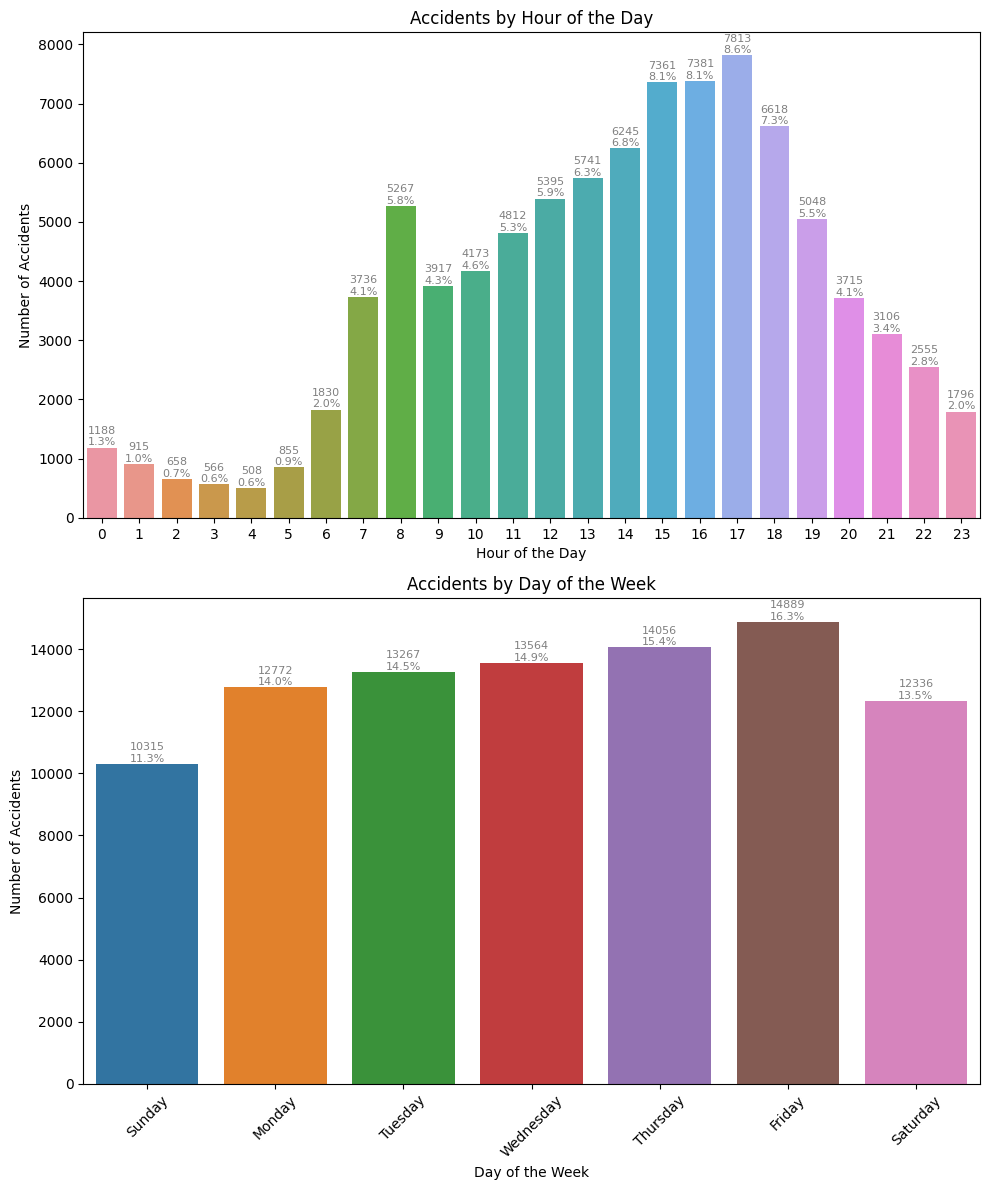

<Figure size 640x480 with 0 Axes>

In [89]:
# Call the function with your DataFrame 'Acc_df'
plot_accidents_by_time(Acc_df, 'Accidents by Hour of the Day', 'Accidents by Day of the Week')
plt.savefig('Accidents_Hour_of_the_Day.png')

### Motorcycles

In [90]:
# Chech for unique values in 'vehicle_type'
Veh_df['vehicle_type'].unique()

array([ 9,  8,  3,  2, 11,  1, 90, 19,  4,  5, 21, 97, 20, 98, 10, 17, 23,
       22, 18, 16], dtype=int64)

- M/cycle 50cc and under - 02, 
M/cycle over 50cc and up to 125cc - 03, 
M/cycle over 125cc and up to 500cc - 04, 
Motorcycle over 500cc - 05.

#### Motorcycles - 125cc and Under

In [91]:
motorcycle125ccandUnder_df = cur.execute("""SELECT accident.accident_index,day_of_week,time,vehicle_type FROM vehicle  
join accident on vehicle.accident_index=accident.accident_index 
WHERE accident.accident_year= 2020 and vehicle_type in (02,03)""")

In [92]:
#put the result in a pandas dataframe
motorcycle125ccandUnder_df = pd.DataFrame(motorcycle125ccandUnder_df, columns=['accident_index','day_of_week','time','vehicle_type'])
motorcycle125ccandUnder_df

accident_index  day_of_week   time  vehicle_type
0     2020010228020            4  03:25             3
1     2020010228077            4  08:00             2
2     2020010228086            4  14:00             3
3     2020010228097            4  14:37             3
4     2020010228148            4  19:05             3
...             ...          ...    ...           ...
8646  2020991008618            1  07:20             3
8647  2020991009778            5  20:50             3
8648  2020991010130            5  16:30             3
8649  2020991011809            4  17:30             3
8650  2020991012311            2  17:55             3

[8651 rows x 4 columns]

C:\Users\760988\AppData\Local\Temp\ipykernel_504\2063478477.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataframe['time'] = pd.to_datetime(dataframe['time'])


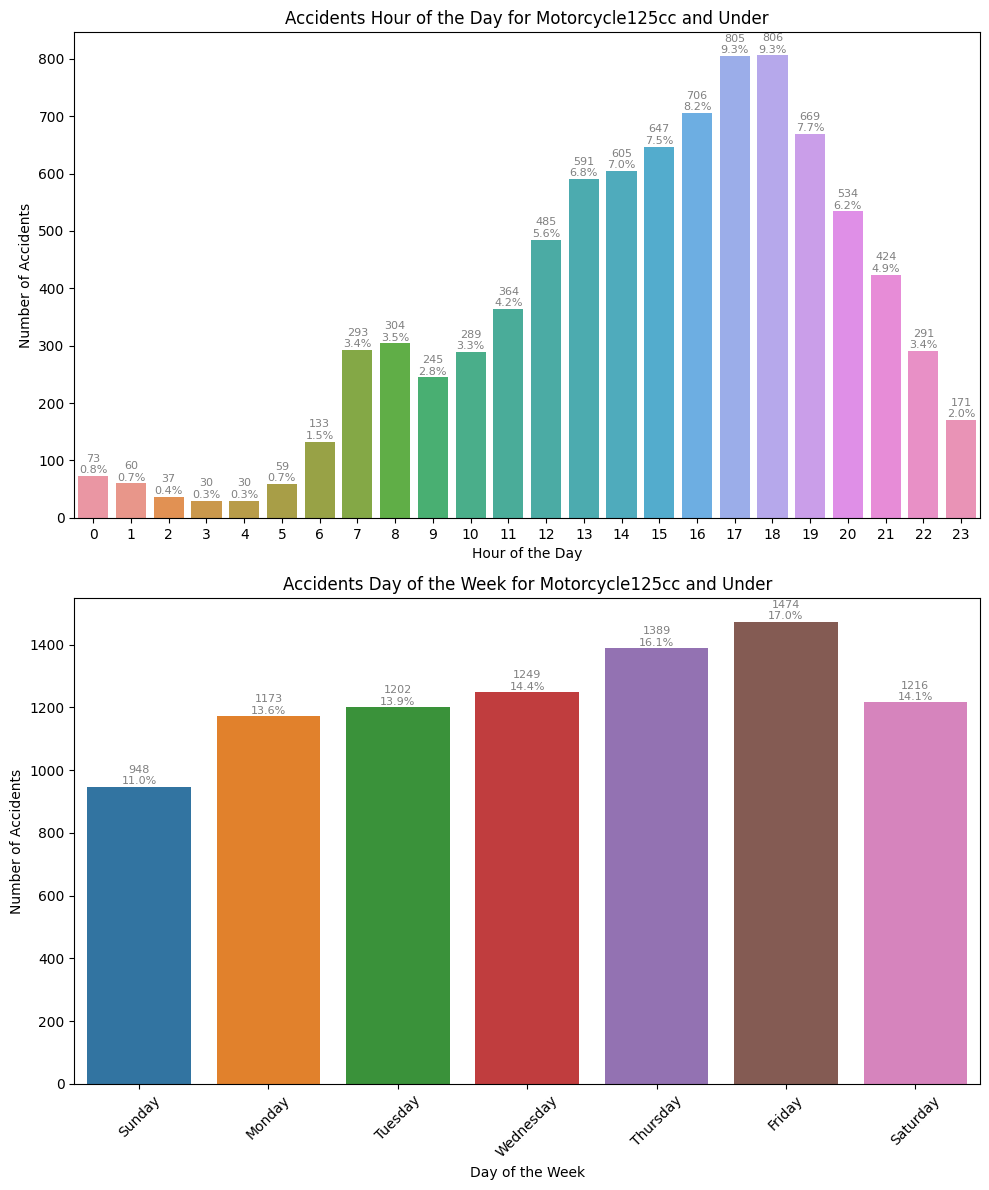

In [93]:
# Call the plot function with your DataFrame 'motorcycle125ccandUnder_df'
plot_accidents_by_time(motorcycle125ccandUnder_df,'Accidents Hour of the Day for Motorcycle125cc and Under', 'Accidents Day of the Week for Motorcycle125cc and Under')

#### Motorcycle over 125cc and up to 500cc

In [94]:
Motorcycleover125ccandupto500cc_df = cur.execute("""SELECT accident.accident_index,day_of_week,time,vehicle_type FROM  vehicle  
join accident on vehicle.accident_index=accident.accident_index 
WHERE accident.accident_year= 2020 and vehicle_type in (04)""")

In [95]:
#put the result in a pandas dataframe
Motorcycleover125ccandupto500cc_df = pd.DataFrame(Motorcycleover125ccandupto500cc_df, columns=['accident_index','day_of_week','time','vehicle_type'])
Motorcycleover125ccandupto500cc_df

accident_index  day_of_week   time  vehicle_type
0     2020010228247            5  14:17             4
1     2020010228265            5  17:35             4
2     2020010229213            3  16:33             4
3     2020010229461            5  18:40             4
4     2020010229496            5  20:31             4
...             ...          ...    ...           ...
1686  2020990997907            7  18:45             4
1687  2020991003397            3  16:23             4
1688  2020991004865            1  09:40             4
1689  2020991008057            6  17:55             4
1690  2020991012353            5  15:45             4

[1691 rows x 4 columns]

C:\Users\760988\AppData\Local\Temp\ipykernel_504\2063478477.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataframe['time'] = pd.to_datetime(dataframe['time'])


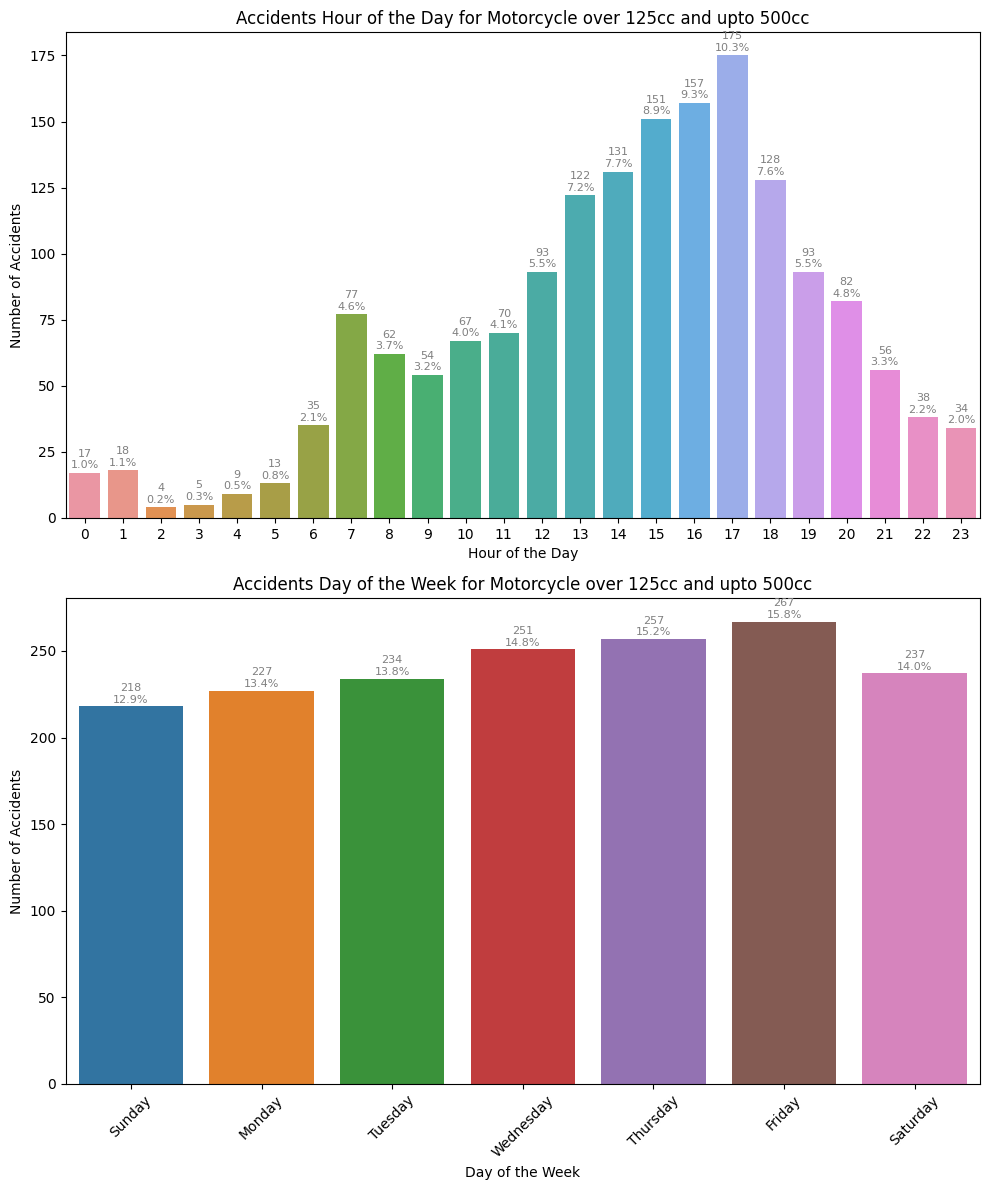

In [96]:
# Call the plot function with your DataFrame 'Motorcycleover125ccandupto500cc_df'
plot_accidents_by_time(Motorcycleover125ccandupto500cc_df,'Accidents Hour of the Day for Motorcycle over 125cc and upto 500cc', 'Accidents Day of the Week for Motorcycle over 125cc and upto 500cc')

#### Motorcycle over 500cc

In [97]:
# query
Motorcycleover500cc_df = cur.execute("""SELECT accident.accident_index,day_of_week,time,vehicle_type FROM  vehicle  
join accident on vehicle.accident_index=accident.accident_index 
WHERE accident.accident_year= 2020 and vehicle_type in (05)""")

In [98]:
#put the result in a pandas dataframe
Motorcycleover500cc_df = pd.DataFrame(Motorcycleover500cc_df, columns=['accident_index','day_of_week','time','vehicle_type'])
Motorcycleover500cc_df

accident_index  day_of_week   time  vehicle_type
0     2020010228283            5  15:24             5
1     2020010228659            1  16:35             5
2     2020010228738            2  08:34             5
3     2020010228796            2  17:40             5
4     2020010228865            3  00:50             5
...             ...          ...    ...           ...
3779  2020991003397            3  16:23             5
3780  2020991003505            5  12:50             5
3781  2020991004857            2  16:18             5
3782  2020991009395            3  13:15             5
3783  2020991030297            4  12:42             5

[3784 rows x 4 columns]

C:\Users\760988\AppData\Local\Temp\ipykernel_504\2063478477.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataframe['time'] = pd.to_datetime(dataframe['time'])


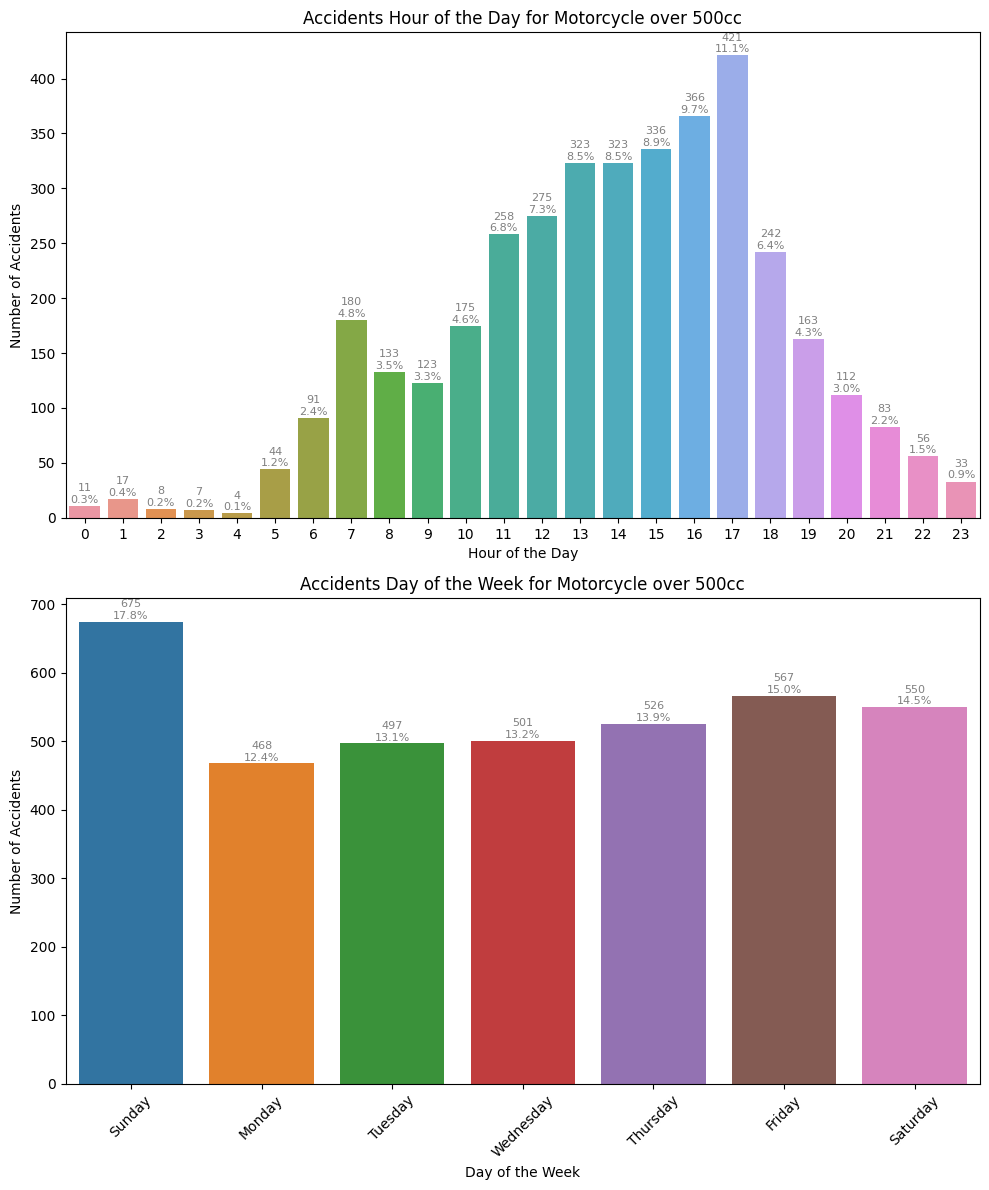

In [99]:
# Call the plot function with your DataFrame 'Motorcycleover500cc_df'
plot_accidents_by_time(Motorcycleover500cc_df,'Accidents Hour of the Day for Motorcycle over 500cc', 'Accidents Day of the Week for Motorcycle over 500cc')

#### Pedestrians

- For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

In [100]:
# Quick check of unique feaures of casualty class
Cas_df['casualty_class'].unique()

array([3, 1, 2], dtype=int64)

- Pedestrians are represented by casualty_class 3

In [101]:
pedestrian = cur.execute("""SELECT accident.accident_index, day_of_week,time,casualty_class 
FROM  accident join casualty on accident.accident_index=casualty.accident_index 
WHERE accident.accident_year= 2020 and casualty_class=3 """)

In [102]:
#put the result in a pandas dataframe
pedestrian_df = pd.DataFrame(pedestrian, columns=['accident_index','day_of_week','time','casualty_class'])
pedestrian_df

accident_index  day_of_week   time  casualty_class
0      2020010219808            3  09:00               3
1      2020010220496            2  13:55               3
2      2020010220496            2  13:55               3
3      2020010228005            4  01:25               3
4      2020010228006            4  01:50               3
...              ...          ...    ...             ...
14745  2020991023621            3  10:30               3
14746  2020991023880            2  17:00               3
14747  2020991024526            3  12:00               3
14748  2020991029573            6  15:05               3
14749  2020991032575            3  13:50               3

[14750 rows x 4 columns]

C:\Users\760988\AppData\Local\Temp\ipykernel_504\2063478477.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataframe['time'] = pd.to_datetime(dataframe['time'])


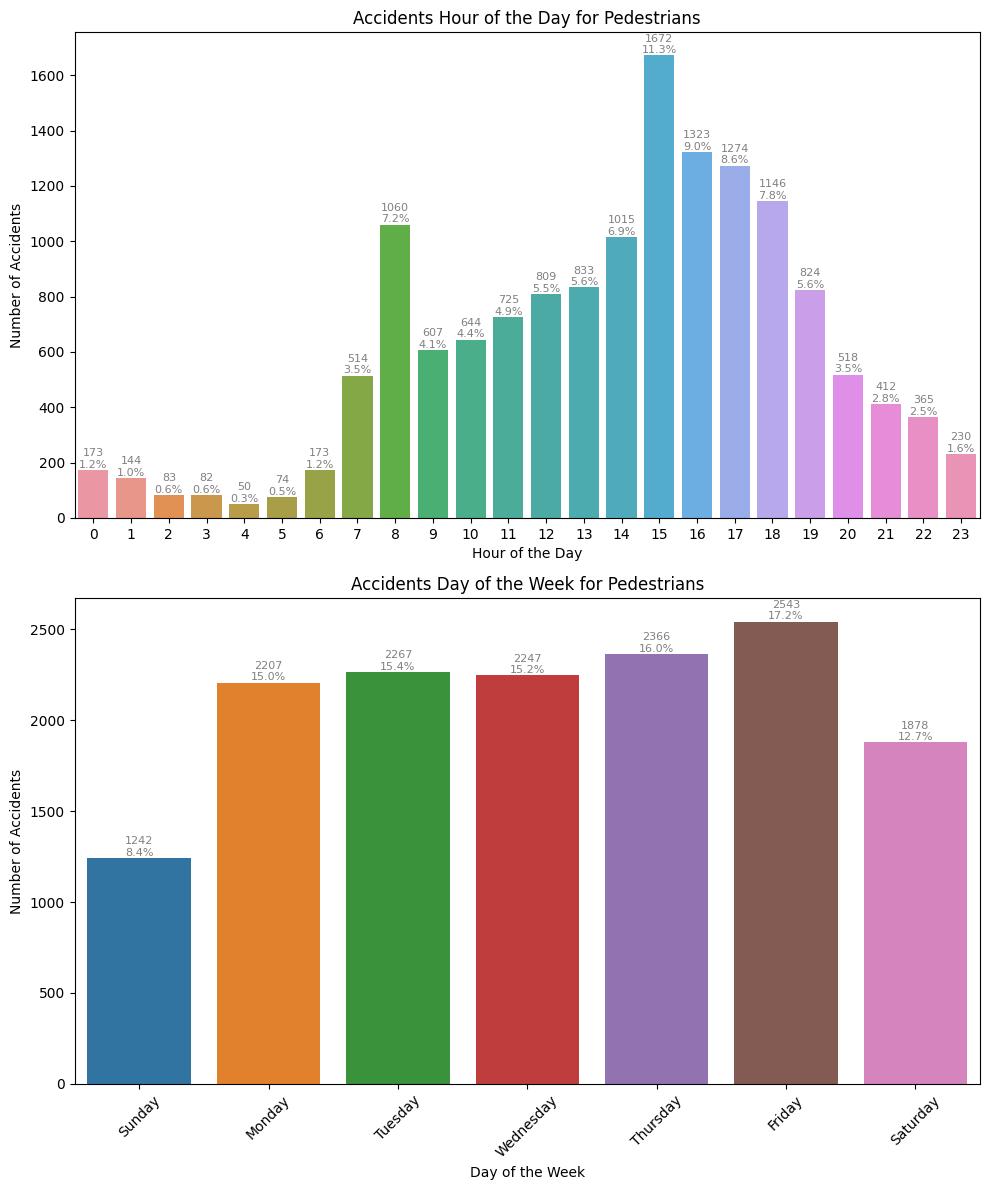

In [103]:
# Call the plot function with your DataFrame 'pedestrian_df'
plot_accidents_by_time(pedestrian_df,'Accidents Hour of the Day for Pedestrians', 'Accidents Day of the Week for Pedestrians')

# Apriori

- Using the apriori algorithm, explore the impact of selected variables on accident severity.

### Cleaning

In [104]:
# A quick check on Accident table columns
Acc_df.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'hour_of_day'],
      dtype='object')

#### Speed limit

In [105]:
# Check the columns in speed_limit
speed_limit = Acc_df['speed_limit'].unique()
print(speed_limit)

Total_minusone_speed_limit = (Acc_df['speed_limit'] == -1).sum()
print(f"Speed limit with column as -1 are {Total_minusone_speed_limit} in number")

[20 30 40 50 60 70 -1]
Speed limit with column as -1 are 12 in number


In [106]:
# Check the columns in road_type
road_type = Acc_df['road_type'].unique()
print(road_type)

[6 2 3 7 1 9]


In [107]:
# Create a dictionary to map road_type values to their corresponding speed limits
road_type_speed_dict = dict(zip(road_type, speed_limit[:-1]))  # Excluding the last -1 value

# Iterate through the rows of 'speed_limit' column
for index, value in Acc_df['speed_limit'].items():
    if value == -1:
        road_type_value = Acc_df.at[index, 'road_type']
        corresponding_speed_limit = road_type_speed_dict.get(road_type_value)
        if corresponding_speed_limit is not None:
            Acc_df.at[index, 'speed_limit'] = corresponding_speed_limit
            
# Sanity check
Acc_df['speed_limit'].unique()

array([20, 30, 40, 50, 60, 70], dtype=int64)

- Inferement: Speed limit applies to the general speed limit applicable to the ROAD ON WHICH THE ACCIDENT OCCURED, not to
that governing a specified class of vehicle (eg. articulated vehicle or tram), even when such a vehicle is involved. 
-The -1 values in 'speed_limit' were replaced with corresponding road_type speed limits.

#### light condition

In [108]:
# Check the columns in light_conditions
light_unique = Acc_df['light_conditions'].unique()
print(light_unique)

Total_minusone_light_conditions = (Acc_df['light_conditions'] == -1).sum()
print(f"Light_conditions with column as -1 are {Total_minusone_light_conditions} in number")

[ 1  4  5  7  6 -1]
Light_conditions with column as -1 are 1 in number


In [109]:
light_filtered = Acc_df.loc[Acc_df['light_conditions'] == -1]
light_filtered

accident_index  accident_year accident_reference  location_easting_osgr   
79777  2020520002488           2020          520002488               343681.0  \

       location_northing_osgr  longitude   latitude  police_force   
79777                154706.0  -2.809007  51.288686            52  \

       accident_severity  number_of_vehicles  ...  light_conditions   
79777                  1                   1  ...                -1  \

      weather_conditions  road_surface_conditions special_conditions_at_site   
79777                 -1                       -1                         -1  \

       carriageway_hazards urban_or_rural_area   
79777                   -1                   2  \

      did_police_officer_attend_scene_of_accident  trunk_road_flag   
79777                                          -1                2  \

       lsoa_of_accident_location  hour_of_day  
79777                  E01029085            1  

[1 rows x 37 columns]

In [110]:
# Replace the -1 in light_conditions with 7 (Darkness: street lighting unknown)
Acc_df.at[79777, 'light_conditions'] = 7

# Check
Acc_df['light_conditions'].unique()


array([1, 4, 5, 7, 6], dtype=int64)

- Light conditions, whether in daylight or darkness.'Darkness' means half an hour after sunset to half an hour before sunrise. 'Daylight' means all other times.
- replace the -1 with light_condition code 7 (Darkness: street lighting unknown)
- infered by the time of the accident as it happened at 1:15am, time classified as darkness. 
- However, information about whether the street light was lit or not could not be deduced, hence code 7

#### weather condition

In [111]:
# Check the columns in weather_conditions
weather_unique = Acc_df['weather_conditions'].unique()
print(weather_unique)

Total_minusone_weather_conditions = (Acc_df['weather_conditions'] == -1).sum()
print(f"Weather_conditions with column as -1 are {Total_minusone_weather_conditions} in number")

[ 9  1  8  7  2  4  5  3  6 -1]
Weather_conditions with column as -1 are 1 in number


In [112]:
filtered_weather = Acc_df.loc[Acc_df['weather_conditions'] == -1]
filtered_weather

accident_index  accident_year accident_reference  location_easting_osgr   
79777  2020520002488           2020          520002488               343681.0  \

       location_northing_osgr  longitude   latitude  police_force   
79777                154706.0  -2.809007  51.288686            52  \

       accident_severity  number_of_vehicles  ...  light_conditions   
79777                  1                   1  ...                 7  \

      weather_conditions  road_surface_conditions special_conditions_at_site   
79777                 -1                       -1                         -1  \

       carriageway_hazards urban_or_rural_area   
79777                   -1                   2  \

      did_police_officer_attend_scene_of_accident  trunk_road_flag   
79777                                          -1                2  \

       lsoa_of_accident_location  hour_of_day  
79777                  E01029085            1  

[1 rows x 37 columns]

In [113]:
# Check the time of the accident
filtered_weather['time']

79777   2023-08-14 01:15:00
Name: time, dtype: datetime64[ns]

In [114]:
# Check the time of the accident
filtered_weather['date']

79777    24/06/2020
Name: date, dtype: object

In [115]:
# Check the time of the accident
filtered_weather['police_force']

79777    52
Name: police_force, dtype: int64

In [116]:
# Replace the -1 in light_conditions with 1 (Fine without high winds)
Acc_df.at[79777, 'weather_conditions'] = 1

In [117]:
# Sanity Check
Acc_df['weather_conditions'].unique()

array([9, 1, 8, 7, 2, 4, 5, 3, 6], dtype=int64)

- This refers to weather conditions at the time and location of the accident
Location of the accident was Avon and Somerset (Police force 52)
Time of the accident was 1.15am
Hence, the weather condition is infered as Fine without high winds after checking the weather for Bristol (being the same region as Avon and Somerset - Police force 52) on 24/06/2020 at about 1am


https://www.weather25.com/europe/united-kingdom/bristol?page=past-weather#day=24&month=6

#### Defining variables and One-hot encoding for Apriori

In [118]:
# Defining the variables

Acc_Sev = Acc_df[['accident_severity']]
Acc_Speed_limit = Acc_df[['speed_limit']]
Acc_Weather = Acc_df[['weather_conditions']]
Acc_Light = Acc_df[['light_conditions']]

In [119]:
# One-hot encoding on Severity
a_severity = pd.get_dummies(Acc_df.accident_severity, prefix = 'severity')
a_severity

severity_1  severity_2  severity_3
0           False       False        True
1           False       False        True
2           False       False        True
3           False        True       False
4           False       False        True
...           ...         ...         ...
91194       False        True       False
91195       False       False        True
91196       False        True       False
91197       False       False        True
91198       False       False        True

[91199 rows x 3 columns]

CODES
1. Fatal
2. Serious
3. Slight

In [120]:
# One-hot encoding on speed limit
a_speed = pd.get_dummies(Acc_df.speed_limit, prefix = 'speed')
a_speed

speed_20  speed_30  speed_40  speed_50  speed_60  speed_70
0          True     False     False     False     False     False
1          True     False     False     False     False     False
2         False      True     False     False     False     False
3         False      True     False     False     False     False
4         False      True     False     False     False     False
...         ...       ...       ...       ...       ...       ...
91194     False      True     False     False     False     False
91195     False      True     False     False     False     False
91196     False     False     False     False      True     False
91197     False      True     False     False     False     False
91198     False      True     False     False     False     False

[91199 rows x 6 columns]

In [121]:
# One-hot encoding on weather conditions
a_weather = pd.get_dummies(Acc_df.weather_conditions, prefix = 'weather')
a_weather

weather_1  weather_2  weather_3  weather_4  weather_5  weather_6   
0          False      False      False      False      False      False  \
1           True      False      False      False      False      False   
2           True      False      False      False      False      False   
3           True      False      False      False      False      False   
4           True      False      False      False      False      False   
...          ...        ...        ...        ...        ...        ...   
91194       True      False      False      False      False      False   
91195       True      False      False      False      False      False   
91196       True      False      False      False      False      False   
91197       True      False      False      False      False      False   
91198       True      False      False      False      False      False   

       weather_7  weather_8  weather_9  
0          False      False       True  
1          False      False      False  
2          False      False      False  
3          False      False      False  
4          False      False      False  
...          ...        ...        ...  
91194      False      False      False  
91195      False      False      False  
91196      False      False      False  
91197      False      False      False  
91198      False      False      False  

[91199 rows x 9 columns]

CODES
1. Fine without high winds
2. Raining without high winds
3. Snowing without high winds
4. Fine with high winds
5. Raining with high winds
6. Snowing with high winds
7. Fog or mist - if hazard
8. Other
9. Unknown

In [122]:
# One-hot encoding on light conditions
a_light = pd.get_dummies(Acc_df.light_conditions, prefix = 'light_conditions')
a_light

light_conditions_1  light_conditions_4  light_conditions_5   
0                    True               False               False  \
1                    True               False               False   
2                   False                True               False   
3                   False                True               False   
4                   False                True               False   
...                   ...                 ...                 ...   
91194                True               False               False   
91195                True               False               False   
91196                True               False               False   
91197                True               False               False   
91198                True               False               False   

       light_conditions_6  light_conditions_7  
0                   False               False  
1                   False               False  
2                   False               False  
3                   False               False  
4                   False               False  
...                   ...                 ...  
91194               False               False  
91195               False               False  
91196               False               False  
91197               False               False  
91198               False               False  

[91199 rows x 5 columns]

CODES
1. Daylight
4. Darkness: street lights present and lit
5. Darkness: street lights present but unlit
6. Darkness: no street lighting
7. Darkness: street lighting unknown

In [123]:
# Put the 3 columns into a DataFrame
Acc_df_4col_onehot = pd.concat([a_severity,a_speed,a_weather,a_light], axis=1)
Acc_df_4col_onehot

severity_1  severity_2  severity_3  speed_20  speed_30  speed_40   
0           False       False        True      True     False     False  \
1           False       False        True      True     False     False   
2           False       False        True     False      True     False   
3           False        True       False     False      True     False   
4           False       False        True     False      True     False   
...           ...         ...         ...       ...       ...       ...   
91194       False        True       False     False      True     False   
91195       False       False        True     False      True     False   
91196       False        True       False     False     False     False   
91197       False       False        True     False      True     False   
91198       False       False        True     False      True     False   

       speed_50  speed_60  speed_70  weather_1  ...  weather_5  weather_6   
0         False     False     False      False  ...      False      False  \
1         False     False     False       True  ...      False      False   
2         False     False     False       True  ...      False      False   
3         False     False     False       True  ...      False      False   
4         False     False     False       True  ...      False      False   
...         ...       ...       ...        ...  ...        ...        ...   
91194     False     False     False       True  ...      False      False   
91195     False     False     False       True  ...      False      False   
91196     False      True     False       True  ...      False      False   
91197     False     False     False       True  ...      False      False   
91198     False     False     False       True  ...      False      False   

       weather_7  weather_8  weather_9  light_conditions_1   
0          False      False       True                True  \
1          False      False      False                True   
2          False      False      False               False   
3          False      False      False               False   
4          False      False      False               False   
...          ...        ...        ...                 ...   
91194      False      False      False                True   
91195      False      False      False                True   
91196      False      False      False                True   
91197      False      False      False                True   
91198      False      False      False                True   

       light_conditions_4  light_conditions_5  light_conditions_6   
0                   False               False               False  \
1                   False               False               False   
2                    True               False               False   
3                    True               False               False   
4                    True               False               False   
...                   ...                 ...                 ...   
91194               False               False               False   
91195               False               False               False   
91196               False               False               False   
91197               False               False               False   
91198               False               False               False   

       light_conditions_7  
0                   False  
1                   False  
2                   False  
3                   False  
4                   False  
...                   ...  
91194               False  
91195               False  
91196               False  
91197               False  
91198               False  

[91199 rows x 23 columns]

### Running Apriori

In [124]:
#  item sets that are supported (i.e. occur together often)
Freq_item_support= apriori(Acc_df_4col_onehot, min_support = 0.2, use_colnames = True)
Freq_item_support

support                                           itemsets
0   0.201263                                       (severity_2)
1   0.783484                                       (severity_3)
2   0.573055                                         (speed_30)
3   0.775557                                        (weather_1)
4   0.706784                               (light_conditions_1)
5   0.208621                               (light_conditions_4)
6   0.459994                             (severity_3, speed_30)
7   0.603186                            (severity_3, weather_1)
8   0.559337                   (severity_3, light_conditions_1)
9   0.450158                              (speed_30, weather_1)
10  0.406551                     (speed_30, light_conditions_1)
11  0.578669                    (light_conditions_1, weather_1)
12  0.359708                  (severity_3, speed_30, weather_1)
13  0.330420         (severity_3, speed_30, light_conditions_1)
14  0.453810        (severity_3, light_conditions_1, weather_1)
15  0.337284          (speed_30, light_conditions_1, weather_1)
16  0.272108  (severity_3, speed_30, light_conditions_1, wea...

### Generating Rules

In [125]:
# Collecting the inferred rules in a dataframe
rules = association_rules(Freq_item_support, metric ="lift", min_threshold = 0.5)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

antecedents   
30               (speed_30, light_conditions_1)  \
36   (severity_3, speed_30, light_conditions_1)   
10                         (light_conditions_1)   
20               (speed_30, light_conditions_1)   
24             (severity_3, light_conditions_1)   
39    (speed_30, light_conditions_1, weather_1)   
1                                    (speed_30)   
14                        (speed_30, weather_1)   
5                          (light_conditions_1)   
6                                    (speed_30)   
26              (light_conditions_1, weather_1)   
12                       (severity_3, speed_30)   
3                                   (weather_1)   
2                                  (severity_3)   
37            (severity_3, speed_30, weather_1)   
25                      (severity_3, weather_1)   
31                        (speed_30, weather_1)   
11                                  (weather_1)   
18                       (severity_3, speed_30)   
4                                  (severity_3)   
8                                    (speed_30)   
43               (speed_30, light_conditions_1)   
28                         (light_conditions_1)   
16                                   (speed_30)   
44                        (speed_30, weather_1)   
38  (severity_3, light_conditions_1, weather_1)   
13                      (severity_3, weather_1)   
40                       (severity_3, speed_30)   
19             (severity_3, light_conditions_1)   
33                                   (speed_30)   
0                                  (severity_3)   
29                                  (weather_1)   
32              (light_conditions_1, weather_1)   
7                                   (weather_1)   
27                                 (severity_3)   
22                                   (speed_30)   
9                          (light_conditions_1)   
41             (severity_3, light_conditions_1)   
34                         (light_conditions_1)   
47                                   (speed_30)   
45              (light_conditions_1, weather_1)   
23                         (light_conditions_1)   
17                                  (weather_1)   
15                                 (severity_3)   
42                      (severity_3, weather_1)   
35                                  (weather_1)   
21                                 (severity_3)   
48                         (light_conditions_1)   
49                                  (weather_1)   
46                                 (severity_3)   

                                    consequents  antecedent support   
30                                  (weather_1)            0.406551  \
36                                  (weather_1)            0.330420   
10                                  (weather_1)            0.706784   
20                                 (severity_3)            0.406551   
24                                  (weather_1)            0.559337   
39                                 (severity_3)            0.337284   
1                                  (severity_3)            0.573055   
14                                 (severity_3)            0.450158   
5                                  (severity_3)            0.706784   
6                                   (weather_1)            0.573055   
26                                 (severity_3)            0.578669   
12                                  (weather_1)            0.459994   
3                                  (severity_3)            0.775557   
2                                   (weather_1)            0.783484   
37                         (light_conditions_1)            0.359708   
25                         (light_conditions_1)            0.603186   
31                         (light_conditions_1)            0.450158   
11                         (light_conditions_1)            0.775557   
18                         (light_conditions_1)            0.459994   
4             

In [126]:
rules.consequents.unique()

array([frozenset({'weather_1'}), frozenset({'severity_3'}),
       frozenset({'light_conditions_1'}),
       frozenset({'severity_3', 'weather_1'}),
       frozenset({'severity_3', 'light_conditions_1'}),
       frozenset({'speed_30'}),
       frozenset({'light_conditions_1', 'weather_1'}),
       frozenset({'speed_30', 'weather_1'}),
       frozenset({'severity_3', 'light_conditions_1', 'weather_1'}),
       frozenset({'severity_3', 'speed_30'}),
       frozenset({'speed_30', 'light_conditions_1'}),
       frozenset({'severity_3', 'speed_30', 'weather_1'}),
       frozenset({'severity_3', 'speed_30', 'light_conditions_1'}),
       frozenset({'speed_30', 'light_conditions_1', 'weather_1'})],
      dtype=object)

In [127]:
def get_accident_related(one):
    if (len(one['consequents']) ==1):
        return one

In [128]:
filtered = rules.apply(get_accident_related, axis=1)

In [129]:
#Checking conditions meeting serious accident
apriori_1 = filtered[filtered['consequents'] == frozenset({'severity_1'})]
apriori_1

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []

In [130]:
#Checking conditions meeting serious accident
apriori_2 = filtered[filtered['consequents'] == frozenset({'severity_2'})]
apriori_2.to_csv('apriori2.csv')
apriori_2

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []

In [131]:
#Checking conditions meeting slight accident
apriori_3 = filtered[filtered['consequents'] == frozenset({'severity_3'})]
apriori_3.to_csv('apriori3.csv')
apriori_3

antecedents   consequents   
20             (speed_30, light_conditions_1)  (severity_3)  \
39  (speed_30, light_conditions_1, weather_1)  (severity_3)   
1                                  (speed_30)  (severity_3)   
14                      (speed_30, weather_1)  (severity_3)   
5                        (light_conditions_1)  (severity_3)   
26            (light_conditions_1, weather_1)  (severity_3)   
3                                 (weather_1)  (severity_3)   

    antecedent support  consequent support   support  confidence      lift   
20            0.406551            0.783484  0.330420    0.812741  1.037342  \
39            0.337284            0.783484  0.272108    0.806762  1.029710   
1             0.573055            0.783484  0.459994    0.802706  1.024533   
14            0.450158            0.783484  0.359708    0.799070  1.019892   
5             0.706784            0.783484  0.559337    0.791384  1.010082   
26            0.578669            0.783484  0.453810    0.784231  1.000953   
3             0.775557            0.783484  0.603186    0.777746  0.992676   

    leverage  conviction  zhangs_metric  
20  0.011894    1.156236       0.060658  
39  0.007851    1.120461       0.043538  
1   0.011015    1.097424       0.056085  
14  0.007016    1.077564       0.035472  
5   0.005583    1.037864       0.034041  
26  0.000432    1.003459       0.002259  
3  -0.004450    0.974182      -0.031826

- Interpreting association rules with the lift metric is important. A lift greater than 1 suggests a positive association, meaning that the presence of the antecedents increases the likelihood of the consequents occurring. Lift values closer to 1 indicate weaker associations, while values significantly greater than 1 indicate stronger associations.

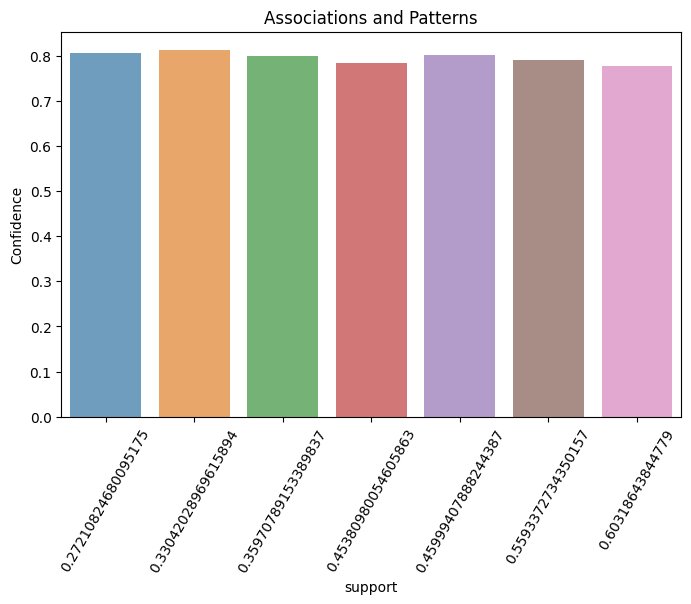

In [132]:
# Set up the figure size and axis rotation
plt.figure(figsize=(8,5))
plt.xticks(rotation=60)
    
sns.barplot(x='support', y='confidence', data=apriori_3, alpha=0.7)

# Add labels for each point
# for i, row in apriori_3.iterrows():
#     plt.text(row['support'], row['confidence'], f"({i})", fontsize=8, ha='center')

# Set plot title and labels
plt.title("Associations and Patterns")
plt.xlabel("support")
plt.ylabel("Confidence")

# Show the plot
# plt.grid(True)
plt.show()

### 5. Clustering Accidents in our region - Humberside

(North Lincolnshire, North East Lincolnshire, Kingston upon Hull and East Riding of Yorkshire)

What do these clusters reveal about the distribution of accidents in our region? 


In [133]:
# Check unique values in police force column
Acc_df['police_force'].unique()

array([ 1,  3,  4,  5,  6,  7, 10, 11, 12, 13, 14, 16, 17, 20, 21, 22, 23,
       30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       50, 52, 53, 54, 55, 60, 61, 62, 63, 99], dtype=int64)

In [134]:
# Filtering for Humberside (police_force = 16)
Humberside_df = Acc_df[Acc_df['police_force']== 16]
Humberside_df

accident_index  accident_year accident_reference  location_easting_osgr   
37750  2020160914781           2020          160914781               510156.0  \
37751  2020160914930           2020          160914930               506050.0   
37752  2020160915008           2020          160915008               497660.0   
37753  2020160915028           2020          160915028               510449.0   
37754  2020160915041           2020          160915041               526236.0   
...              ...            ...                ...                    ...   
39454  2020161014491           2020          161014491               489433.0   
39455  2020161014528           2020          161014528               503756.0   
39456  2020161014544           2020          161014544               511525.0   
39457  2020161014546           2020          161014546               485978.0   
39458  2020161014949           2020          161014949               509443.0   

       location_northing_osgr  longitude   latitude  police_force   
37750                429221.0  -0.331047  53.747751            16  \
37751                428813.0  -0.393424  53.744936            16   
37752                402806.0  -0.528743  53.512895            16   
37753                434112.0  -0.324858  53.791630            16   
37754                410340.0  -0.095008  53.574501            16   
...                       ...        ...        ...           ...   
39454                408637.0  -0.651104  53.566753            16   
39455                439285.0  -0.424674  53.839482            16   
39456                433149.0  -0.308880  53.782750            16   
39457                408912.0  -0.703181  53.569801            16   
39458                428632.0  -0.342063  53.742609            16   

       accident_severity  number_of_vehicles  ...  light_conditions   
37750                  2                   1  ...                 4  \
37751                  3                   2  ...                 1   
37752                  3                   1  ...                 4   
37753                  2                   1  ...                 4   
37754                  3                   1  ...                 4   
...                  ...                 ...  ...               ...   
39454                  3                   2  ...                 1   
39455                  3                   2  ...                 4   
39456                  3                   1  ...                 1   
39457                  3                   2  ...                 1   
39458                  3                   2  ...                 4   

      weather_conditions  road_surface_conditions special_conditions_at_site   
37750                  1                        1                          0  \
37751                  1                        1                          0   
37752                  1                        1                          0   
37753                  1                        1                          0   
37754                  1                        1                          0   
...                  ...                      ...                        ...   
39454                  1                        1                          0   
39455                  1                        1                          0   
39456                  1                        1                          0   
39457                  1                        1                          0   
39458                  1                        1                          0   

       carriageway_hazards urban_or_rural_area   
37750                    0                   1  \
37751                    0                   1   
37752                    0                   2   
37753                    0                   1   
37754                    0                   1   
...                    ...                 ...   
39454                    0              

In [135]:
# Merging the relevant data
region_df = pd.merge(Humberside_df, Lsoa_df, left_on = 'lsoa_of_accident_location', right_on ='lsoa01cd')
region_df

accident_index  accident_year accident_reference  location_easting_osgr   
0     2020160914930           2020          160914930               506050.0  \
1     2020160918418           2020          160918418               505576.0   
2     2020160936879           2020          160936879               505583.0   
3     2020160947046           2020          160947046               506031.0   
4     2020160951627           2020          160951627               505692.0   
...             ...            ...                ...                    ...   
1658  2020161011040           2020          161011040               478094.0   
1659  2020161011144           2020          161011144               519036.0   
1660  2020161011936           2020          161011936               510941.0   
1661  2020161012614           2020          161012614               504795.0   
1662  2020161012744           2020          161012744               503718.0   

      location_northing_osgr  longitude   latitude  police_force   
0                   428813.0  -0.393424  53.744936            16  \
1                   428756.0  -0.400627  53.744520            16   
2                   428752.0  -0.400523  53.744482            16   
3                   428789.0  -0.393720  53.744724            16   
4                   428758.0  -0.398868  53.744514            16   
...                      ...        ...        ...           ...   
1658                403312.0  -0.823599  53.520707            16   
1659                428776.0  -0.196631  53.741804            16   
1660                432122.0  -0.318108  53.773648            16   
1661                439763.0  -0.408728  53.843568            16   
1662                428641.0  -0.428826  53.743858            16   

      accident_severity  number_of_vehicles  ...  trunk_road_flag   
0                     3                   2  ...                2  \
1                     3                   2  ...                2   
2                     3                   2  ...                2   
3                     3                   1  ...                2   
4                     2                   2  ...                2   
...                 ...                 ...  ...              ...   
1658                  3                   2  ...                2   
1659                  3                   2  ...                2   
1660                  3                   2  ...                2   
1661                  3                   5  ...                2   
1662                  3                   2  ...                2   

     lsoa_of_accident_location  hour_of_day objectid   lsoa01cd   
0                    E01012777           11    12777  E01012777  \
1                    E01012777            8    12777  E01012777   
2                    E01012777           17    12777  E01012777   
3                    E01012777           19    12777  E01012777   
4                    E01012777           19    12777  E01012777   
...                        ...          ...      ...        ...   
1658                 E01013244           14    13244  E01013244   
1659                 E01013095           17    13095  E01013095   
1660                 E01012815           18    12815  E01012815   
1661                 E01013037            1    13037  E01013037   
1662                 E01013107           13    13107  E01013107   

                           lsoa01nm                      lsoa01nmw   
0           Kingston upon Hull 028E        Kingston upon Hull 028E  \
1           Kingston upon Hull 028E        Kingston upon Hull 028E   
2           Kingston upon Hull 028E        Kingston upon Hull 028E   
3           Kingston upon Hull 028E        Kingston upon Hull 028E   
4           Kingston upon Hull 028E        Kingston upon Hull 028E   
...                             ...                            ...   
1658        North Lincolnshire 020D        North Lincolnshire 020D   
1659  East Riding of Yorkshire 02

In [136]:
# Check the unique columns
region_df['lsoa01nm'].unique()

array(['Kingston upon Hull 028E', 'North Lincolnshire 022C',
       'Kingston upon Hull 002E', 'North East Lincolnshire 003C',
       'Kingston upon Hull 016D', 'North East Lincolnshire 016C',
       'Kingston upon Hull 026D', 'North Lincolnshire 006D',
       'East Riding of Yorkshire 014A', 'East Riding of Yorkshire 007H',
       'North East Lincolnshire 019A', 'East Riding of Yorkshire 033C',
       'Kingston upon Hull 019D', 'Kingston upon Hull 029D',
       'North Lincolnshire 012B', 'Kingston upon Hull 031D',
       'North Lincolnshire 004D', 'East Riding of Yorkshire 040D',
       'North Lincolnshire 001C', 'North East Lincolnshire 021B',
       'North East Lincolnshire 003B', 'East Riding of Yorkshire 014D',
       'Kingston upon Hull 027B', 'North Lincolnshire 005A',
       'North East Lincolnshire 004C', 'East Riding of Yorkshire 011F',
       'North East Lincolnshire 014D', 'North Lincolnshire 002A',
       'North East Lincolnshire 017B', 'North East Lincolnshire 016B',
    

In [137]:
# Number of columns
region_df['lsoa01nm'].nunique()

479

In [138]:
# Selecting city names removing the codes at the end
cities = []
for one in np.unique(pd.Series(region_df.lsoa01nm.unique()).apply(lambda x:x.split(" ")[:-1]).values):
    if len(one)> 1:
        cities.append(' '.join(one))
    else:
        cities.append(one[0])
        
cities

['East Riding of Yorkshire',
 'Kingston upon Hull',
 'North East Lincolnshire',
 'North Lincolnshire']

In [139]:
def capture_region(one):
    one = one.split(" ")[:-1]
    one = ' '.join(one)
    return one

In [140]:
region_df['name'] = region_df['lsoa01nm'].apply(capture_region)
region_df

accident_index  accident_year accident_reference  location_easting_osgr   
0     2020160914930           2020          160914930               506050.0  \
1     2020160918418           2020          160918418               505576.0   
2     2020160936879           2020          160936879               505583.0   
3     2020160947046           2020          160947046               506031.0   
4     2020160951627           2020          160951627               505692.0   
...             ...            ...                ...                    ...   
1658  2020161011040           2020          161011040               478094.0   
1659  2020161011144           2020          161011144               519036.0   
1660  2020161011936           2020          161011936               510941.0   
1661  2020161012614           2020          161012614               504795.0   
1662  2020161012744           2020          161012744               503718.0   

      location_northing_osgr  longitude   latitude  police_force   
0                   428813.0  -0.393424  53.744936            16  \
1                   428756.0  -0.400627  53.744520            16   
2                   428752.0  -0.400523  53.744482            16   
3                   428789.0  -0.393720  53.744724            16   
4                   428758.0  -0.398868  53.744514            16   
...                      ...        ...        ...           ...   
1658                403312.0  -0.823599  53.520707            16   
1659                428776.0  -0.196631  53.741804            16   
1660                432122.0  -0.318108  53.773648            16   
1661                439763.0  -0.408728  53.843568            16   
1662                428641.0  -0.428826  53.743858            16   

      accident_severity  number_of_vehicles  ...  lsoa_of_accident_location   
0                     3                   2  ...                  E01012777  \
1                     3                   2  ...                  E01012777   
2                     3                   2  ...                  E01012777   
3                     3                   1  ...                  E01012777   
4                     2                   2  ...                  E01012777   
...                 ...                 ...  ...                        ...   
1658                  3                   2  ...                  E01013244   
1659                  3                   2  ...                  E01013095   
1660                  3                   2  ...                  E01012815   
1661                  3                   5  ...                  E01013037   
1662                  3                   2  ...                  E01013107   

     hour_of_day  objectid   lsoa01cd                       lsoa01nm   
0             11     12777  E01012777        Kingston upon Hull 028E  \
1              8     12777  E01012777        Kingston upon Hull 028E   
2             17     12777  E01012777        Kingston upon Hull 028E   
3             19     12777  E01012777        Kingston upon Hull 028E   
4             19     12777  E01012777        Kingston upon Hull 028E   
...          ...       ...        ...                            ...   
1658          14     13244  E01013244        North Lincolnshire 020D   
1659          17     13095  E01013095  East Riding of Yorkshire 029B   
1660          18     12815  E01012815        Kingston upon Hull 013D   
1661           1     13037  E01013037  East Riding of Yorkshire 019B   
1662          13     13107  E01013107  East Riding of Yorkshire 034E   

                          lsoa01nmw   shape__area  shape__length   
0           Kingston upon Hull 028E  3.567509e+05    3963.099631  \
1           Kingston upon Hull 028E  3.567509e+05    3963.099631   
2           Kingston upon Hull 028E  3.567509e+05    3963.099631   
3           Kingston upon Hull 028E  3.567509e+05    3963.099631   
4           Kingston upon Hull 028E  3.567509e+05    3963.099631   
...  

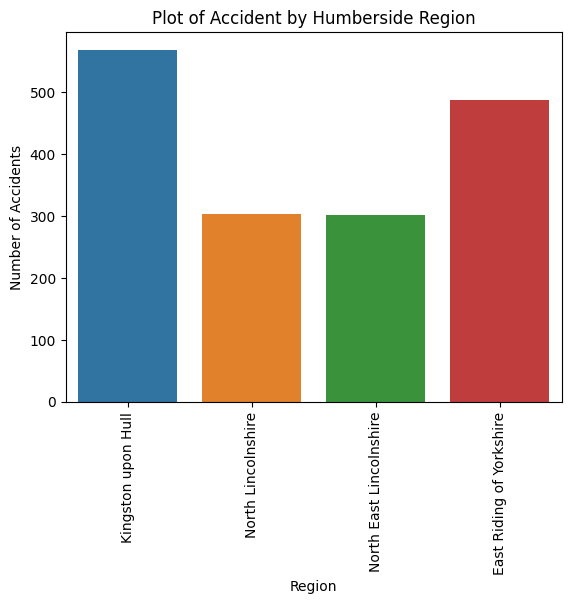

In [141]:
# Plot of top regions

name_counts = region_df['name'].value_counts()

# Sort the names based on counts in descending order
sorted_names = name_counts.index

# Select the top 5 names
top_count = sorted_names[:10]

# Filter the DataFrame to include only the top 5 names
region_selected_df = region_df[region_df['name'].isin(top_count)]

# Create a countplot for the top 5 names
sns.countplot(data=region_selected_df , x='name')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.title('Plot of Accident by Humberside Region')
plt.xlabel('Region')
plt.ylabel('Number of Accidents')

# Display the plot
plt.show()

In [142]:
# Check few rows of regions selected
region_selected_df.head()

accident_index  accident_year accident_reference  location_easting_osgr   
0  2020160914930           2020          160914930               506050.0  \
1  2020160918418           2020          160918418               505576.0   
2  2020160936879           2020          160936879               505583.0   
3  2020160947046           2020          160947046               506031.0   
4  2020160951627           2020          160951627               505692.0   

   location_northing_osgr  longitude   latitude  police_force   
0                428813.0  -0.393424  53.744936            16  \
1                428756.0  -0.400627  53.744520            16   
2                428752.0  -0.400523  53.744482            16   
3                428789.0  -0.393720  53.744724            16   
4                428758.0  -0.398868  53.744514            16   

   accident_severity  number_of_vehicles  ...  lsoa_of_accident_location   
0                  3                   2  ...                  E01012777  \
1                  3                   2  ...                  E01012777   
2                  3                   2  ...                  E01012777   
3                  3                   1  ...                  E01012777   
4                  2                   2  ...                  E01012777   

  hour_of_day  objectid   lsoa01cd                 lsoa01nm   
0          11     12777  E01012777  Kingston upon Hull 028E  \
1           8     12777  E01012777  Kingston upon Hull 028E   
2          17     12777  E01012777  Kingston upon Hull 028E   
3          19     12777  E01012777  Kingston upon Hull 028E   
4          19     12777  E01012777  Kingston upon Hull 028E   

                 lsoa01nmw   shape__area  shape__length   
0  Kingston upon Hull 028E  356750.94548    3963.099631  \
1  Kingston upon Hull 028E  356750.94548    3963.099631   
2  Kingston upon Hull 028E  356750.94548    3963.099631   
3  Kingston upon Hull 028E  356750.94548    3963.099631   
4  Kingston upon Hull 028E  356750.94548    3963.099631   

                               globalid                name  
0  4c068a55-c2d9-426c-9cfa-94742ef4a3ff  Kingston upon Hull  
1  4c068a55-c2d9-426c-9cfa-94742ef4a3ff  Kingston upon Hull  
2  4c068a55-c2d9-426c-9cfa-94742ef4a3ff  Kingston upon Hull  
3  4c068a55-c2d9-426c-9cfa-94742ef4a3ff  Kingston upon Hull  
4  4c068a55-c2d9-426c-9cfa-94742ef4a3ff  Kingston upon Hull  

[5 rows x 45 columns]

In [143]:
# Defining the longitude and latitude of the selected regions
region_long_lat = region_selected_df[['longitude','latitude']]
region_long_lat

longitude   latitude
0     -0.393424  53.744936
1     -0.400627  53.744520
2     -0.400523  53.744482
3     -0.393720  53.744724
4     -0.398868  53.744514
...         ...        ...
1658  -0.823599  53.520707
1659  -0.196631  53.741804
1660  -0.318108  53.773648
1661  -0.408728  53.843568
1662  -0.428826  53.743858

[1663 rows x 2 columns]

In [144]:
#Using K= 15 as the optimal number of clusters
#Creating clustering for the dataset using a given set of clusters

k_means = KMeans(n_clusters=15, random_state=0).fit(region_long_lat)
k_means

C:\Users\760988\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=15, random_state=0)

In [145]:
labels = k_means.labels_
labels

array([11, 11, 11, ...,  6, 13, 11])

In [146]:
#labels = k_means.predict(region_long_lat)
centroids = k_means.cluster_centers_
centroids

array([[-0.08184679, 53.55714002],
       [-0.35784033, 53.75754893],
       [-0.6522471 , 53.58104086],
       [-0.20606274, 54.07503581],
       [-0.8900852 , 53.72364108],
       [-0.61997998, 53.77600216],
       [-0.28903533, 53.77979756],
       [-0.46327494, 54.01234389],
       [-0.79387252, 53.92992993],
       [-0.09128229, 53.7402558 ],
       [-0.4909185 , 53.56303069],
       [-0.42799855, 53.73488594],
       [-0.82090097, 53.56167117],
       [-0.44481403, 53.84279043],
       [-0.26172775, 53.61144629]])

In [147]:
# Create a scatter plot with dynamic colors based on labels
def plot_cluster_scatter(data_frame, labels, centroids):
    # Define a colormap for labels
    colormap = plt.cm.get_cmap("tab10", len(np.unique(labels)))
    
    # Convert labels to colors using the colormap
    colors = [colormap(label) for label in labels]
    
    # Create the scatter plot
    plt.figure(figsize=(8, 5)) # set the size of the figure
    plt.scatter(data_frame["longitude"], data_frame["latitude"], c=colors)
    
    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="*", color="orange", s=100)
    
    # Set labels and title
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Cluster Scatter Plot")
    
    plt.show()

C:\Users\760988\AppData\Local\Temp\ipykernel_504\443191747.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap("tab10", len(np.unique(labels)))


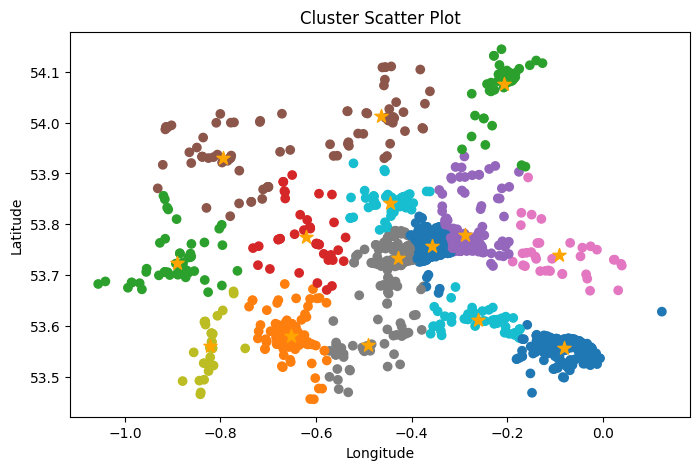

In [148]:
plot_cluster_scatter(region_long_lat,labels, centroids)

In [149]:
k_means.inertia_

4.090341794462084

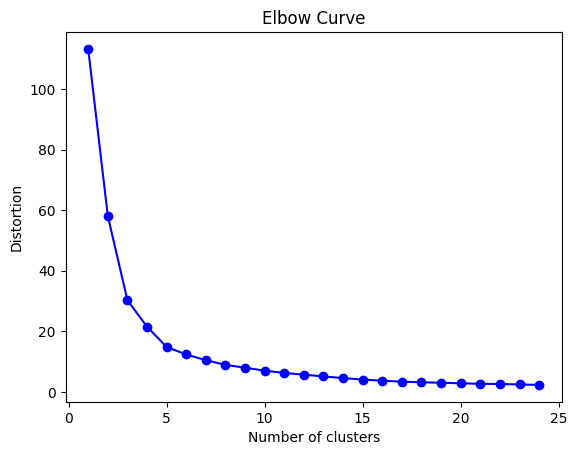

In [150]:
# Detremining the best number of cluster using elbow curve

List =  []

for i in range(1,25):
    k_means = KMeans(n_clusters=i, n_init=10)
    k_means.fit(region_long_lat)
    List.append(k_means.inertia_)
    
plt.figure()
plt.plot(range(1,25), List, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()

- The best number of clusters would be 3 or 4 as seen in the elbow curve

In [151]:
# Using kmeans with the best number of clusters as 4
kmeans = KMeans(n_clusters = 4, init='k-means++')
kmeans

KMeans(n_clusters=4)

In [152]:
# fit and predict
pred_clusters =  kmeans.fit_predict((region_long_lat))
pred_clusters

C:\Users\760988\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, ..., 1, 1, 1])

In [153]:
# update the 'cluster' with modified cluster labels
label4 = region_selected_df.loc[:, 'cluster'] = pred_clusters + 1

In [154]:
# Check the unique clusters
region_selected_df['cluster'].unique()

array([2, 3, 1, 4])

In [155]:
centroids4 = kmeans.cluster_centers_   
centroids4

array([[-0.09098956, 53.57604958],
       [-0.36405512, 53.75621725],
       [-0.71434247, 53.66534987],
       [-0.2715766 , 54.0433033 ]])

C:\Users\760988\AppData\Local\Temp\ipykernel_504\443191747.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap("tab10", len(np.unique(labels)))


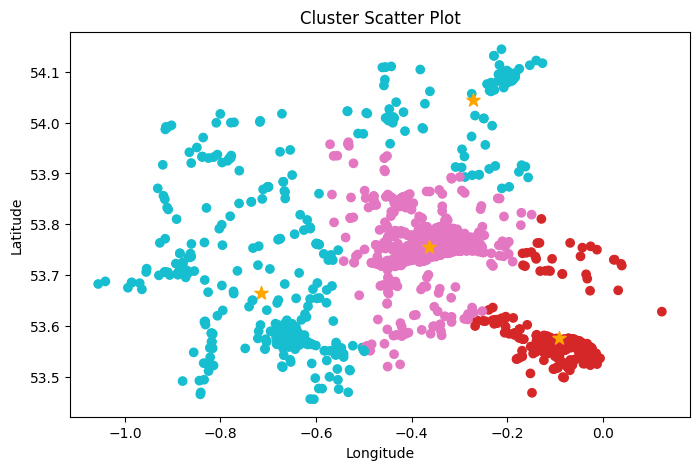

In [156]:
# Call 'the plot_cluster_scatter' function
plot_cluster_scatter(region_long_lat,label4, centroids4)

In [157]:
inertia = kmeans.inertia_
print(inertia)

21.51807102225449


In [158]:
#!pip install folium

In [159]:
import folium
from folium.plugins import MarkerCluster

# Create a folium map centered around the coordinates of your data
m = folium.Map(location=[53.7, -0.5], zoom_start=10)

# Create a marker cluster for better performance with large datasets
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each data point
for lat, lon, cluster_id in zip(region_long_lat['latitude'], region_long_lat['longitude'], region_selected_df['cluster']):
    folium.Marker(location=[lat, lon], icon=None, popup=f'Cluster {cluster_id}').add_to(marker_cluster)

# Display the map
m

Text(0, 0.5, 'Region')

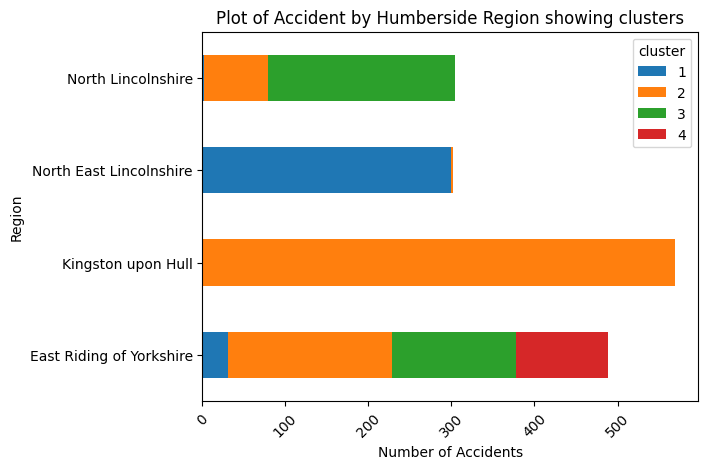

In [160]:
# Create a countplot for the top 5 names
region_selected_df.groupby(['name','cluster']).size().unstack().plot(kind='barh', stacked=True)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.title('Plot of Accident by Humberside Region showing clusters')
plt.xlabel('Number of Accidents')
plt.ylabel('Region')

In [161]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score

In [162]:
#select numerical columns only
Acc_df_num = Acc_df.select_dtypes([np.number]) 
Acc_df_num.columns

Index(['accident_year', 'location_easting_osgr', 'location_northing_osgr',
       'longitude', 'latitude', 'police_force', 'accident_severity',
       'number_of_vehicles', 'number_of_casualties', 'day_of_week',
       'local_authority_district', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'hour_of_day'],
      dtype='object')

In [163]:
y_kmeans = kmeans.fit_predict(Acc_df_num)

C:\Users\760988\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [164]:
# kmeans evaluation using internal metrics

db_score = davies_bouldin_score(Acc_df_num, y_kmeans)
print(f'Davies Bouldin evaluation is {db_score:.3f}')

sh_score = silhouette_score(Acc_df_num, y_kmeans)
print(f'Silhouette Coefficient is {sh_score:.3f}')

ch_score = calinski_harabasz_score(Acc_df_num, y_kmeans)
print(f'Calinski Harabasz Score is {ch_score:.3f}')

Davies Bouldin evaluation is 0.644
Silhouette Coefficient is 0.561
Calinski Harabasz Score is 131232.031


### 6. Outlier Detection methods

In [165]:
# Check for duplicates
Acc_df.duplicated().sum()

0

#### Isolation Forest Method 

In [166]:
#select the numerical columns only 
Acc_df_num = Acc_df.select_dtypes([np.number]) 
Acc_df_num.columns

Index(['accident_year', 'location_easting_osgr', 'location_northing_osgr',
       'longitude', 'latitude', 'police_force', 'accident_severity',
       'number_of_vehicles', 'number_of_casualties', 'day_of_week',
       'local_authority_district', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'hour_of_day'],
      dtype='object')

In [167]:
#Creating dataframe of the numerical columns
Acc_if_num_df = pd.DataFrame(Acc_df_num, columns = Acc_df_num.columns)
Acc_if_num_df

accident_year  location_easting_osgr  location_northing_osgr   
0               2020               521389.0                175144.0  \
1               2020               529337.0                176237.0   
2               2020               526432.0                182761.0   
3               2020               538676.0                184371.0   
4               2020               529324.0                181286.0   
...              ...                    ...                     ...   
91194           2020               343034.0                731654.0   
91195           2020               257963.0                658891.0   
91196           2020               383664.0                810646.0   
91197           2020               277161.0                674852.0   
91198           2020               240402.0                681950.0   

       longitude   latitude  police_force  accident_severity   
0      -0.254001  51.462262             1                  3  \
1      -0.139253  51.470327             1                  3   
2      -0.178719  51.529614             1                  3   
3      -0.001683  51.541210             1                  2   
4      -0.137592  51.515704             1                  3   
...          ...        ...           ...                ...   
91194  -2.926320  56.473539            99                  2   
91195  -4.267565  55.802353            99                  3   
91196  -2.271903  57.186317            99                  2   
91197  -3.968753  55.950940            99                  3   
91198  -4.561040  56.003843            99                  3   

       number_of_vehicles  number_of_casualties  day_of_week  ...   
0                       1                     1            3  ...  \
1                       1                     2            2  ...   
2                       1                     1            4  ...   
3                       1                     1            4  ...   
4                       1                     2            4  ...   
...                   ...                   ...          ...  ...   
91194                   2                     1            4  ...   
91195                   1                     1            6  ...   
91196                   2                     1            4  ...   
91197                   2                     1            3  ...   
91198                   1                     1            3  ...   

       pedestrian_crossing_physical_facilities  light_conditions   
0                                            9                 1  \
1                                            4                 1   
2                                            0                 4   
3                                            4                 4   
4                                            0                 4   
...                                        ...               ...   
91194                                        0                 1   
91195                                        0                 1   
91196                                        0                 1   
91197                                        0                 1   
91198                                        0                 1   

       weather_conditions  road_surface_conditions   
0                       9                        9  \
1                       1                        1   
2                       1                        2   
3                       1                        1   
4                       1                        1   
...                   ...                      ...   
91194                   1                        1   
91195                   1                        1   
91196                   1                        1   
91197                   1                        1   
91198                   1                        1   

       special_conditions_at_site  carriageway_hazards  urban_or_rural_area   
0          

In [176]:
#Initialise model
iforest_model1 = IsolationForest(contamination = 0.05, random_state = 42)
iforest_model1

IsolationForest(contamination=0.05, random_state=42)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [177]:
#fit and predict
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    iforest_model = iforest_model1.fit_predict(Acc_if_num_df)

In [178]:
Acc_if_num_df.loc[:, 'labels'] = iforest_model
Acc_if_num_df 

accident_year  location_easting_osgr  location_northing_osgr   
0               2020               521389.0                175144.0  \
1               2020               529337.0                176237.0   
2               2020               526432.0                182761.0   
3               2020               538676.0                184371.0   
4               2020               529324.0                181286.0   
...              ...                    ...                     ...   
91194           2020               343034.0                731654.0   
91195           2020               257963.0                658891.0   
91196           2020               383664.0                810646.0   
91197           2020               277161.0                674852.0   
91198           2020               240402.0                681950.0   

       longitude   latitude  police_force  accident_severity   
0      -0.254001  51.462262             1                  3  \
1      -0.139253  51.470327             1                  3   
2      -0.178719  51.529614             1                  3   
3      -0.001683  51.541210             1                  2   
4      -0.137592  51.515704             1                  3   
...          ...        ...           ...                ...   
91194  -2.926320  56.473539            99                  2   
91195  -4.267565  55.802353            99                  3   
91196  -2.271903  57.186317            99                  2   
91197  -3.968753  55.950940            99                  3   
91198  -4.561040  56.003843            99                  3   

       number_of_vehicles  number_of_casualties  day_of_week  ...   
0                       1                     1            3  ...  \
1                       1                     2            2  ...   
2                       1                     1            4  ...   
3                       1                     1            4  ...   
4                       1                     2            4  ...   
...                   ...                   ...          ...  ...   
91194                   2                     1            4  ...   
91195                   1                     1            6  ...   
91196                   2                     1            4  ...   
91197                   2                     1            3  ...   
91198                   1                     1            3  ...   

       light_conditions  weather_conditions  road_surface_conditions   
0                     1                   9                        9  \
1                     1                   1                        1   
2                     4                   1                        2   
3                     4                   1                        1   
4                     4                   1                        1   
...                 ...                 ...                      ...   
91194                 1                   1                        1   
91195                 1                   1                        1   
91196                 1                   1                        1   
91197                 1                   1                        1   
91198                 1                   1                        1   

       special_conditions_at_site  carriageway_hazards  urban_or_rural_area   
0                               0                    0                    1  \
1                               0                    0                    1   
2                               0                    0                    1   
3                               0                    0                    1   
4                               0                    0                    1   
...                           ...                  ...                  ...   
91194                           0                    0                    1   
91195                           0                    0     

In [179]:
Acc_df_outliers = Acc_if_num_df.loc[Acc_if_num_df['labels']== -1]
Acc_df_outliers

accident_year  location_easting_osgr  location_northing_osgr   
0               2020               521389.0                175144.0  \
12              2020               553943.0                190802.0   
33              2020               531124.0                189815.0   
37              2020               549043.0                183451.0   
54              2020               534659.0                178273.0   
...              ...                    ...                     ...   
91183           2020               277989.0                650526.0   
91185           2020               316541.0                691722.0   
91189           2020               341791.0                733677.0   
91190           2020               342979.0                731116.0   
91193           2020               286242.0                717023.0   

       longitude   latitude  police_force  accident_severity   
0      -0.254001  51.462262             1                  3  \
12      0.221108  51.595036             1                  3   
33     -0.108489  51.591936             1                  3   
37      0.147310  51.530303             1                  3   
54     -0.061900  51.487383             1                  3   
...          ...        ...           ...                ...   
91183  -3.944559  55.732713            99                  2   
91185  -3.343610  56.110929            99                  3   
91189  -2.946947  56.491558            99                  2   
91190  -2.927095  56.468699            99                  3   
91193  -3.841439  56.331864            99                  3   

       number_of_vehicles  number_of_casualties  day_of_week  ...   
0                       1                     1            3  ...  \
12                      2                     2            4  ...   
33                      2                     1            4  ...   
37                      1                     2            4  ...   
54                      2                     1            5  ...   
...                   ...                   ...          ...  ...   
91183                   3                     4            6  ...   
91185                   2                     2            7  ...   
91189                   1                     1            3  ...   
91190                   1                     1            2  ...   
91193                   1                     1            3  ...   

       light_conditions  weather_conditions  road_surface_conditions   
0                     1                   9                        9  \
12                    1                   7                        1   
33                    4                   9                        9   
37                    7                   7                        1   
54                    1                   1                        1   
...                 ...                 ...                      ...   
91183                 1                   1                        1   
91185                 4                   8                        2   
91189                 1                   9                        2   
91190                 4                   1                        2   
91193                 1                   2                        2   

       special_conditions_at_site  carriageway_hazards  urban_or_rural_area   
0                               0                    0                    1  \
12                              0                    0                    1   
33                              9                    0                    1   
37                              0                    0                    1   
54                              0                    0                    1   
...                           ...                  ...                  ...   
91183                           0                    0                    1   
91185                           0                    0     

In [181]:
iforest_anormalies = pd.Series(iforest_model).replace([-1,1],[1,0])
iforest_anormalies = Acc_if_num_df[iforest_anormalies==1];
iforest_anormalies

accident_year  location_easting_osgr  location_northing_osgr   
0               2020               521389.0                175144.0  \
12              2020               553943.0                190802.0   
33              2020               531124.0                189815.0   
37              2020               549043.0                183451.0   
54              2020               534659.0                178273.0   
...              ...                    ...                     ...   
91183           2020               277989.0                650526.0   
91185           2020               316541.0                691722.0   
91189           2020               341791.0                733677.0   
91190           2020               342979.0                731116.0   
91193           2020               286242.0                717023.0   

       longitude   latitude  police_force  accident_severity   
0      -0.254001  51.462262             1                  3  \
12      0.221108  51.595036             1                  3   
33     -0.108489  51.591936             1                  3   
37      0.147310  51.530303             1                  3   
54     -0.061900  51.487383             1                  3   
...          ...        ...           ...                ...   
91183  -3.944559  55.732713            99                  2   
91185  -3.343610  56.110929            99                  3   
91189  -2.946947  56.491558            99                  2   
91190  -2.927095  56.468699            99                  3   
91193  -3.841439  56.331864            99                  3   

       number_of_vehicles  number_of_casualties  day_of_week  ...   
0                       1                     1            3  ...  \
12                      2                     2            4  ...   
33                      2                     1            4  ...   
37                      1                     2            4  ...   
54                      2                     1            5  ...   
...                   ...                   ...          ...  ...   
91183                   3                     4            6  ...   
91185                   2                     2            7  ...   
91189                   1                     1            3  ...   
91190                   1                     1            2  ...   
91193                   1                     1            3  ...   

       light_conditions  weather_conditions  road_surface_conditions   
0                     1                   9                        9  \
12                    1                   7                        1   
33                    4                   9                        9   
37                    7                   7                        1   
54                    1                   1                        1   
...                 ...                 ...                      ...   
91183                 1                   1                        1   
91185                 4                   8                        2   
91189                 1                   9                        2   
91190                 4                   1                        2   
91193                 1                   2                        2   

       special_conditions_at_site  carriageway_hazards  urban_or_rural_area   
0                               0                    0                    1  \
12                              0                    0                    1   
33                              9                    0                    1   
37                              0                    0                    1   
54                              0                    0                    1   
...                           ...                  ...                  ...   
91183                           0                    0                    1   
91185                           0                    0     

C:\Users\760988\AppData\Local\Temp\ipykernel_504\995381291.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Acc_if_num_df["longitude"], Acc_if_num_df["latitude"],


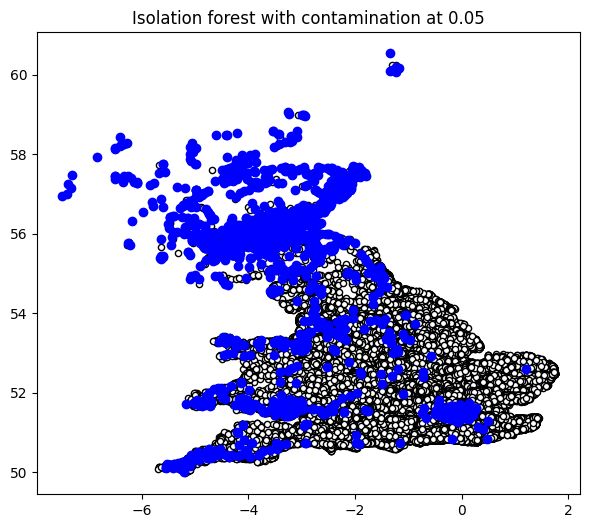

In [302]:
#Visualization of the Clusters
fig = plt.figure(figsize=(7, 6)) # set the size of the figure

# define which data is x, y, z
plt.scatter(Acc_if_num_df["longitude"], Acc_if_num_df["latitude"], 
            c = 'white', cmap = 'viridis' , s = 20, edgecolor='k')

# Add labels to the plot and a title
plt.scatter(iforest_anormalies["longitude"], iforest_anormalies["latitude"], c= 'blue')
plt.title("Isolation forest with contamination at 0.05")
plt.show()



In [183]:
# Trying a different contamination

# Create an isolation forest object and save it to a variable
iforest_model2 = IsolationForest(contamination = 0.0025, random_state = 42)

# Fit the isolation forest to your data frame containing just numerical data
scaled_isolated_df_pred2 = iforest_model2.fit_predict(Acc_if_num_df)

if_scores = iforest_model2.decision_function(Acc_if_num_df)

scaled_isolated_df_pred_count = (scaled_isolated_df_pred2 == -1).sum()

print(if_scores)
print(f"There are {scaled_isolated_df_pred_count} outliers in the dataset")

[0.06054169 0.22625961 0.24371682 ... 0.11576202 0.15279507 0.12162418]
There are 228 outliers in the dataset


In [184]:
iforest_anormalies2 = pd.Series(scaled_isolated_df_pred2).replace([-1,1],[1,0])
iforest_anormalies2 = Acc_if_num_df[iforest_anormalies2==1];
iforest_anormalies2

accident_year  location_easting_osgr  location_northing_osgr   
33              2020               531124.0                189815.0  \
154             2020               523741.0                185810.0   
678             2020               518638.0                181075.0   
742             2020               518048.0                168373.0   
747             2020               512902.0                180378.0   
...              ...                    ...                     ...   
24306           2020               334923.0                390235.0   
87553           2020               260359.0                853767.0   
87670           2020               172438.0                670321.0   
87725           2020               129995.0                850452.0   
88794           2020               268081.0                843167.0   

       longitude   latitude  police_force  accident_severity   
33     -0.108489  51.591936             1                  3  \
154    -0.216421  51.557612             1                  3   
678    -0.291591  51.516150             1                  3   
742    -0.304327  51.402112             1                  3   
747    -0.374445  51.511060             1                  3   
...          ...        ...           ...                ...   
24306  -2.980333  53.404920             5                  3   
87553  -4.335238  57.552356            99                  2   
87670  -5.639050  55.872147            99                  1   
87725  -6.504272  57.463690            99                  3   
88794  -4.200568  57.459532            99                  2   

       number_of_vehicles  number_of_casualties  day_of_week  ...   
33                      2                     1            4  ...  \
154                     2                     1            7  ...   
678                     2                     2            3  ...   
742                     1                     3            4  ...   
747                     1                     1            4  ...   
...                   ...                   ...          ...  ...   
24306                   2                     1            7  ...   
87553                   1                     2            1  ...   
87670                   1                     3            1  ...   
87725                   1                     1            1  ...   
88794                   1                     1            1  ...   

       light_conditions  weather_conditions  road_surface_conditions   
33                    4                   9                        9  \
154                   7                   2                        9   
678                   1                   9                        9   
742                   7                   9                        9   
747                   1                   1                        9   
...                 ...                 ...                      ...   
24306                 4                   9                        9   
87553                 6                   8                        4   
87670                 6                   9                        1   
87725                 6                   1                        4   
88794                 4                   1                        1   

       special_conditions_at_site  carriageway_hazards  urban_or_rural_area   
33                              9                    0                    1  \
154                             9                    9                    1   
678                             9                    9                    1   
742                             9                    9                    1   
747                             9                    9                    1   
...                           ...                  ...                  ...   
24306                           9                    9                    1   
87553                           5                    7     

C:\Users\760988\AppData\Local\Temp\ipykernel_504\1006056015.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Acc_if_num_df["longitude"], Acc_if_num_df["latitude"],


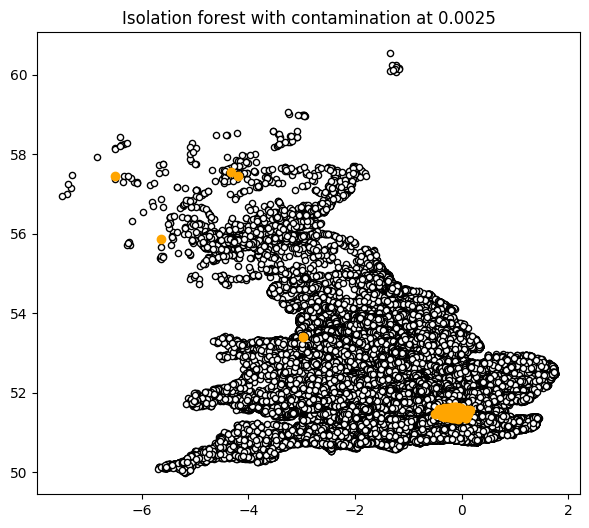

In [185]:
#Visualization of the Clusters
fig = plt.figure(figsize=(7, 6)) # set the size of the figure

# define which data is x, y, z
plt.scatter(Acc_if_num_df["longitude"], Acc_if_num_df["latitude"], 
            c = 'white', cmap = 'viridis' , s = 20, edgecolor='k')

# Add labels to the plot and a title
plt.scatter(iforest_anormalies2["longitude"], iforest_anormalies2["latitude"], c= 'orange')
plt.title("Isolation forest with contamination at 0.0025")
plt.show()

In [186]:
# Trying a different contamination at 

# Create an isolation forest object and save it to a variable
iforest_model3 = IsolationForest(contamination = 0.000001, random_state = 42)

# Fit the isolation forest to your data frame containing just numerical data
scaled_isolated_df_pred3 = iforest_model3.fit_predict(Acc_if_num_df)

if_scores = iforest_model3.decision_function(Acc_if_num_df)

scaled_isolated_df_pred_count = (scaled_isolated_df_pred3 == -1).sum()

print(if_scores)
print(f"There are {scaled_isolated_df_pred_count} outliers in the dataset")

[0.1126906  0.27840851 0.29586572 ... 0.16791092 0.20494397 0.17377309]
There are 1 outliers in the dataset


In [187]:
iforest_anormalies3 = pd.Series(scaled_isolated_df_pred3).replace([-1,1],[1,0])
iforest_anormalies3 = Acc_if_num_df[iforest_anormalies3==1];
iforest_anormalies3

accident_year  location_easting_osgr  location_northing_osgr   
15595           2020               510271.0                181222.0  \

       longitude   latitude  police_force  accident_severity   
15595  -0.412079  51.519165             1                  2  \

       number_of_vehicles  number_of_casualties  day_of_week  ...   
15595                   1                     1            2  ...  \

       light_conditions  weather_conditions  road_surface_conditions   
15595                 7                   9                        9  \

       special_conditions_at_site  carriageway_hazards  urban_or_rural_area   
15595                           9                    9                    1  \

       did_police_officer_attend_scene_of_accident  trunk_road_flag   
15595                                            3                2  \

       hour_of_day  labels  
15595           18      -1  

[1 rows x 31 columns]

C:\Users\760988\AppData\Local\Temp\ipykernel_504\3436033065.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Acc_if_num_df["longitude"], Acc_if_num_df["latitude"],


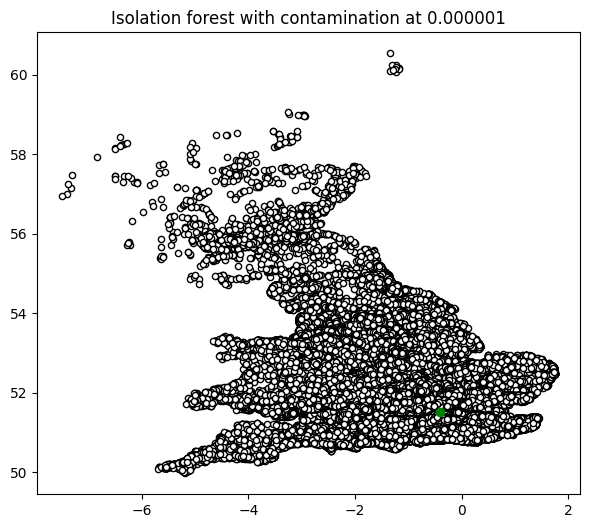

In [188]:
#Visualization of the Clusters
fig = plt.figure(figsize=(7, 6)) # set the size of the figure

# define which data is x, y, z
plt.scatter(Acc_if_num_df["longitude"], Acc_if_num_df["latitude"], 
            c = 'white', cmap = 'viridis' , s = 20, edgecolor='k')

# Add labels to the plot and a title
plt.scatter(iforest_anormalies3["longitude"], iforest_anormalies3["latitude"], c= 'green')
plt.title("Isolation forest with contamination at 0.000001")
plt.show()

In [295]:
# Trying a different contamination at 

# Create an isolation forest object and save it to a variable
iforest_model4 = IsolationForest(contamination = 0.30, random_state = 42)

# Fit the isolation forest to your data frame containing just numerical data
scaled_isolated_df_pred4 = iforest_model4.fit_predict(Acc_if_num_df)

if_scores = iforest_model4.decision_function(Acc_if_num_df)

scaled_isolated_df_pred_count = (scaled_isolated_df_pred4 == -1).sum()

print(if_scores)
print(f"There are {scaled_isolated_df_pred_count} outliers in the dataset")

[-0.14437535  0.02134256  0.03879978 ... -0.08915502 -0.05212197
 -0.08329286]
There are 27360 outliers in the dataset


In [296]:
iforest_anormalies4 = pd.Series(scaled_isolated_df_pred4).replace([-1,1],[1,0])
iforest_anormalies4 = Acc_if_num_df[iforest_anormalies4==1];
iforest_anormalies4

accident_year  location_easting_osgr  location_northing_osgr   
0               2020               521389.0                175144.0  \
11              2020               534377.0                197476.0   
12              2020               553943.0                190802.0   
15              2020               553007.0                190580.0   
16              2020               532463.0                182404.0   
...              ...                    ...                     ...   
91194           2020               343034.0                731654.0   
91195           2020               257963.0                658891.0   
91196           2020               383664.0                810646.0   
91197           2020               277161.0                674852.0   
91198           2020               240402.0                681950.0   

       longitude   latitude  police_force  accident_severity   
0      -0.254001  51.462262             1                  3  \
11     -0.058620  51.660013             1                  2   
12      0.221108  51.595036             1                  3   
15      0.207510  51.593297             1                  1   
16     -0.091959  51.525025             1                  3   
...          ...        ...           ...                ...   
91194  -2.926320  56.473539            99                  2   
91195  -4.267565  55.802353            99                  3   
91196  -2.271903  57.186317            99                  2   
91197  -3.968753  55.950940            99                  3   
91198  -4.561040  56.003843            99                  3   

       number_of_vehicles  number_of_casualties  day_of_week  ...   
0                       1                     1            3  ...  \
11                      3                     4            4  ...   
12                      2                     2            4  ...   
15                      1                     1            4  ...   
16                      2                     2            4  ...   
...                   ...                   ...          ...  ...   
91194                   2                     1            4  ...   
91195                   1                     1            6  ...   
91196                   2                     1            4  ...   
91197                   2                     1            3  ...   
91198                   1                     1            3  ...   

       light_conditions  weather_conditions  road_surface_conditions   
0                     1                   9                        9  \
11                    4                   1                        2   
12                    1                   7                        1   
15                    4                   7                        2   
16                    4                   1                        1   
...                 ...                 ...                      ...   
91194                 1                   1                        1   
91195                 1                   1                        1   
91196                 1                   1                        1   
91197                 1                   1                        1   
91198                 1                   1                        1   

       special_conditions_at_site  carriageway_hazards  urban_or_rural_area   
0                               0                    0                    1  \
11                              0                    0                    1   
12                              0                    0                    1   
15                              0                    0                    2   
16                              0                    0                    1   
...                           ...                  ...                  ...   
91194                           0                    0                    1   
91195                           0                    0     

C:\Users\760988\AppData\Local\Temp\ipykernel_504\398518724.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Acc_if_num_df["longitude"], Acc_if_num_df["latitude"],


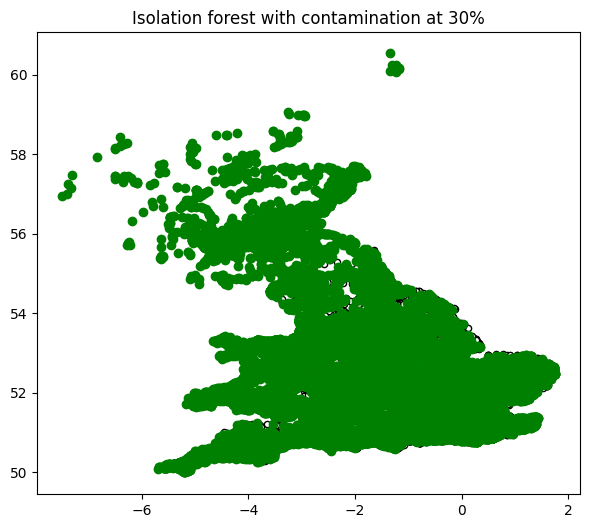

There are 27360 outliers in the dataset


In [300]:
#Visualization of the Clusters
fig = plt.figure(figsize=(7, 6)) # set the size of the figure

# define which data is x, y, z
plt.scatter(Acc_if_num_df["longitude"], Acc_if_num_df["latitude"], 
            c = 'white', cmap = 'viridis' , s = 20, edgecolor='k')

# Add labels to the plot and a title
plt.scatter(iforest_anormalies4["longitude"], iforest_anormalies4["latitude"], c= 'green')
plt.title("Isolation forest with contamination at 30%")
plt.show()


print(f"There are {scaled_isolated_df_pred_count} outliers in the dataset")

Text(0, 0.5, 'Speed Limit')

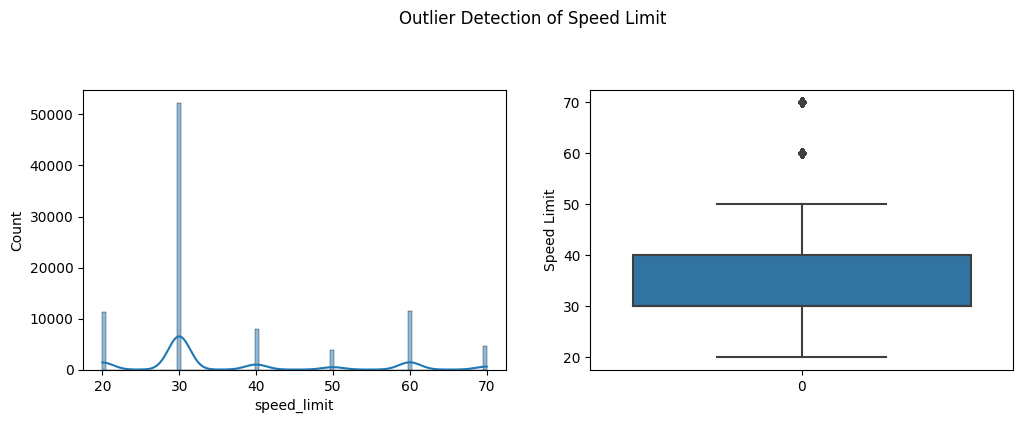

In [189]:
plt.figure(figsize=(12,8))

plt.suptitle("Outlier Detection of Speed Limit")
plt.subplot(2,2,1)
sns.histplot(Acc_df['speed_limit'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(data = Acc_df['speed_limit'])
plt.ylabel("Speed Limit")

##### Vehicle table

In [192]:
#vehicle table
Veh_df.duplicated().sum()

0

In [193]:
#select numerical columns only
Veh_df_num = Veh_df.select_dtypes([np.number]) 
Veh_df_num.columns

Index(['vehicle_index', 'accident_year', 'vehicle_reference', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'driver_imd_decile', 'driver_home_area_type'],
      dtype='object')

In [886]:
#fit and predict
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    iforest_model = if_model.fit_predict(Veh_df_num)
    
iforest_model

array([1, 1, 1, ..., 1, 1, 1])

In [888]:
Veh_df_num.loc[:, 'labels'] = iforest_model
Veh_df_num 

vehicle_index  accident_year  vehicle_reference  vehicle_type   
0              681716           2020                  1             9  \
1              681717           2020                  1             9   
2              681718           2020                  1             9   
3              681719           2020                  1             8   
4              681720           2020                  1             9   
...               ...            ...                ...           ...   
167370         849086           2020                  1             9   
167371         849087           2020                  2             5   
167372         849088           2020                  1             9   
167373         849089           2020                  2             1   
167374         849090           2020                  1             9   

        towing_and_articulation  vehicle_manoeuvre  vehicle_direction_from   
0                             9                  5                       1  \
1                             0                  4                       2   
2                             0                 18                      -1   
3                             0                 18                       1   
4                             0                 18                       3   
...                         ...                ...                     ...   
167370                        0                  7                       8   
167371                        0                 16                       6   
167372                        0                  7                       8   
167373                        0                 18                       6   
167374                        0                  1                       8   

        vehicle_direction_to  vehicle_location_restricted_lane   
0                          5                                 0  \
1                          6                                 0   
2                         -1                                 0   
3                          5                                 0   
4                          7                                 9   
...                      ...                               ...   
167370                     2                                 0   
167371                     2                                 0   
167372                     2                                 0   
167373                     2                                 4   
167374                     4                                 0   

        junction_location  ...  journey_purpose_of_driver  sex_of_driver   
0                       0  ...                          6              2  \
1                       2  ...                          2              1   
2                       0  ...                          6              3   
3                       0  ...                          1              1   
4                       1  ...                          6              1   
...                   ...  ...                        ...            ...   
167370                  6  ...                          1              1   
167371                  1  ...                          5              1   
167372                  6  ...                          6              2   
167373                  8  ...                          6              1   
167374                  0  ...                          6              1   

        age_of_driver  age_band_of_driver  engine_capacity_cc   
0                  32                   6                1968  \
1                  45                   7                1395   
2                  -1                  -1                  -1   
3                  44                   7                1798   
4                  20                   4                2993   
...               ...                 ...                 ...   
167370             57            

In [889]:
Veh_df_outliers = Veh_df_num .loc[Veh_df_num['labels']== -1]
Veh_df_outliers

vehicle_index  accident_year  vehicle_reference  vehicle_type   
18             681734           2020                  1             9  \
19             681735           2020                  2             9   
27             681743           2020                  1             8   
28             681744           2020                  2             9   
46             681762           2020                  1             8   
...               ...            ...                ...           ...   
59038          740754           2020                  2            90   
101713         783429           2020                  3            98   
141891         823607           2020                  1             1   
141892         823608           2020                  2             9   
151596         833312           2020                  2             9   

        towing_and_articulation  vehicle_manoeuvre  vehicle_direction_from   
18                            0                 99                       9  \
19                            9                 99                       9   
27                            0                 99                       9   
28                            0                 99                       9   
46                            0                 99                       9   
...                         ...                ...                     ...   
59038                         9                 18                       5   
101713                        4                  2                       0   
141891                        9                 99                       9   
141892                        0                 99                       9   
151596                        4                 18                       5   

        vehicle_direction_to  vehicle_location_restricted_lane   
18                         9                                99  \
19                         9                                99   
27                         9                                99   
28                         9                                99   
46                         9                                99   
...                      ...                               ...   
59038                      1                                 0   
101713                     0                                 6   
141891                     9                                99   
141892                     9                                99   
151596                     1                                 0   

        junction_location  ...  journey_purpose_of_driver  sex_of_driver   
18                      0  ...                          2              1  \
19                      0  ...                          6              3   
27                      9  ...                          6              1   
28                      9  ...                         -1             -1   
46                      9  ...                          6              1   
...                   ...  ...                        ...            ...   
59038                   0  ...                          6              3   
101713                  7  ...                          1              1   
141891                  9  ...                          6              1   
141892                  9  ...                          6              3   
151596                  1  ...                          1              1   

        age_of_driver  age_band_of_driver  engine_capacity_cc   
18                 30                   6                1597  \
19                 -1                  -1                1229   
27                 38                   7                1339   
28                 -1                  -1                1797   
46                 51                   8                1998   
...               ...                 ...                 ...   
59038              -1            

Text(0, 0.5, 'Age')

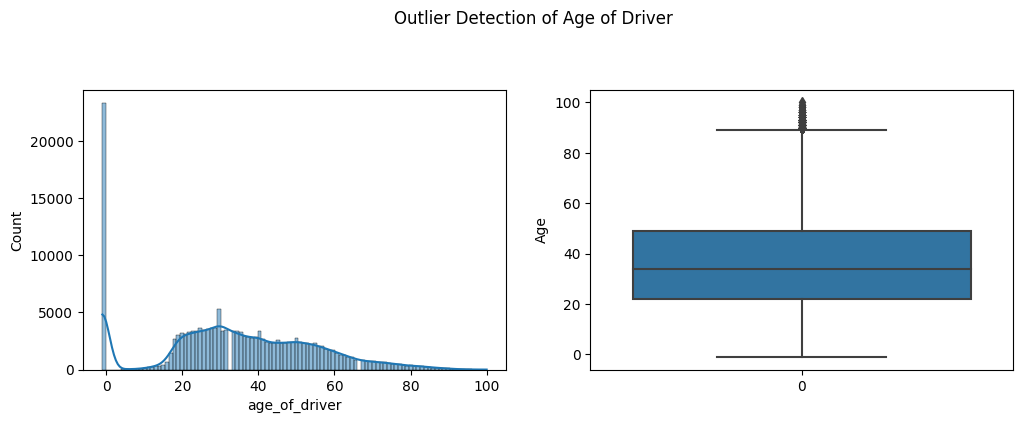

In [890]:
plt.figure(figsize=(12,8))

plt.suptitle("Outlier Detection of Age of Driver")
plt.subplot(2,2,1)
sns.histplot(Veh_df['age_of_driver'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(data = Veh_df['age_of_driver'])
plt.ylabel("Age")

##### Casualty table

In [891]:
#vehicle table
Cas_df.duplicated().sum()

0

In [892]:
Cas_df_num = Cas_df.select_dtypes([np.number]) 
Cas_df_num.columns

Index(['casualty_index', 'accident_year', 'vehicle_reference',
       'casualty_reference', 'casualty_class', 'sex_of_casualty',
       'age_of_casualty', 'age_band_of_casualty', 'casualty_severity',
       'pedestrian_location', 'pedestrian_movement', 'car_passenger',
       'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker',
       'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile'],
      dtype='object')

In [894]:
#fit and predict
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    iforest_model = if_model.fit_predict(Cas_df_num)
    
iforest_model

array([1, 1, 1, ..., 1, 1, 1])

In [897]:
Cas_df_num.loc[:, 'labels'] = iforest_model
Cas_df_num 

casualty_index  accident_year  vehicle_reference  casualty_reference   
0               484748           2020                  1                   1  \
1               484749           2020                  1                   1   
2               484750           2020                  1                   2   
3               484751           2020                  1                   1   
4               484752           2020                  1                   1   
...                ...            ...                ...                 ...   
115579          600327           2020                  2                   1   
115580          600328           2020                  1                   1   
115581          600329           2020                  2                   1   
115582          600330           2020                  2                   1   
115583          600331           2020                  1                   1   

        casualty_class  sex_of_casualty  age_of_casualty   
0                    3                1               31  \
1                    3                2                2   
2                    3                2                4   
3                    3                1               23   
4                    3                1               47   
...                ...              ...              ...   
115579               1                1               11   
115580               3                2               63   
115581               1                1               38   
115582               1                1               76   
115583               3                1               48   

        age_band_of_casualty  casualty_severity  pedestrian_location   
0                          6                  3                    9  \
1                          1                  3                    1   
2                          1                  3                    1   
3                          5                  3                    5   
4                          8                  2                    4   
...                      ...                ...                  ...   
115579                     3                  2                    0   
115580                     9                  3                   10   
115581                     7                  2                    0   
115582                    11                  3                    0   
115583                     8                  3                    9   

        pedestrian_movement  car_passenger  bus_or_coach_passenger   
0                         5              0                       0  \
1                         1              0                       0   
2                         1              0                       0   
3                         9              0                       0   
4                         1              0                       0   
...                     ...            ...                     ...   
115579                    0              0                       0   
115580                    1              0                       0   
115581                    0              0                       0   
115582                    0              0                       0   
115583                    9              0                       0   

        pedestrian_road_maintenance_worker  casualty_type   
0                                        0              0  \
1                                        0              0   
2                                        0              0   
3                                        0              0   
4                                        0              0   
...                                    ...            ...   
115579                                   0              1   
115580                                   0              0   
115581                                   0              5   
115582    

In [898]:
Cas_df_outliers = Cas_df_num .loc[Cas_df_num['labels']== -1]
Cas_df_outliers

casualty_index  accident_year  vehicle_reference  casualty_reference   
6               484754           2020                  1                   2  \
9               484757           2020                  1                   1   
18              484766           2020                  1                   2   
25              484773           2020                  2                   1   
39              484787           2020                  1                   1   
...                ...            ...                ...                 ...   
115546          600294           2020                  1                   1   
115566          600314           2020                  1                   1   
115573          600321           2020                  1                   2   
115578          600326           2020                  1                   1   
115580          600328           2020                  1                   1   

        casualty_class  sex_of_casualty  age_of_casualty   
6                    3                2               33  \
9                    3                1               50   
18                   2               -1               -1   
25                   2                2               80   
39                   3                2               83   
...                ...              ...              ...   
115546               2                1                4   
115566               3                1               19   
115573               3                2               54   
115578               3                1               69   
115580               3                2               63   

        age_band_of_casualty  casualty_severity  pedestrian_location   
6                          6                  3                    6  \
9                          8                  2                    9   
18                        -1                  3                    0   
25                        11                  3                    0   
39                        11                  3                    6   
...                      ...                ...                  ...   
115546                     1                  2                    0   
115566                     4                  2                    5   
115573                     8                  2                    8   
115578                    10                  3                    6   
115580                     9                  3                   10   

        pedestrian_movement  car_passenger  bus_or_coach_passenger   
6                         9              0                       0  \
9                         9              0                       0   
18                        0              1                       0   
25                        0              2                       0   
39                        9              0                       0   
...                     ...            ...                     ...   
115546                    0              2                       0   
115566                    1              0                       0   
115573                    1              0                       0   
115578                    9              0                       0   
115580                    1              0                       0   

        pedestrian_road_maintenance_worker  casualty_type   
6                                        0              0  \
9                                        0              0   
18                                       0              9   
25                                       0              9   
39                                       0              0   
...                                    ...            ...   
115546                                   0              9   
115566                                   2              0   
115573                                   0              0   
115578    

Text(0, 0.5, 'Age')

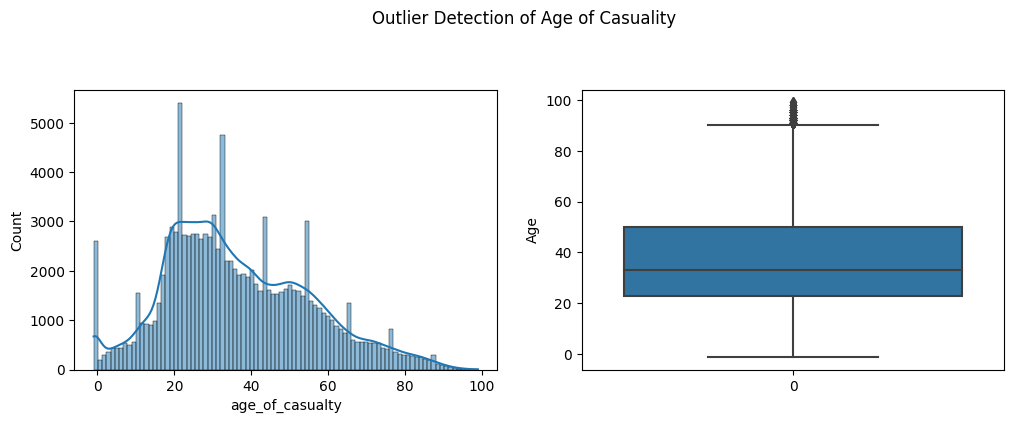

In [901]:
plt.figure(figsize=(12,8))

plt.suptitle("Outlier Detection of Age of Casuality")
plt.subplot(2,2,1)
sns.histplot(Cas_df['age_of_casualty'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(data = Cas_df['age_of_casualty'])
plt.ylabel("Age")

### Data cleaning

In [196]:
cols = Acc_df.columns

for col in cols:
    count = (Acc_df[col] == -1).sum()
    if count > 0:
        print(f"There are {count} occurences of -1 in {col}")

There are 991 occurences of -1 in local_authority_district
There are 2 occurences of -1 in junction_detail
There are 38298 occurences of -1 in junction_control
There are 110 occurences of -1 in second_road_class
There are 38045 occurences of -1 in second_road_number
There are 143 occurences of -1 in pedestrian_crossing_human_control
There are 135 occurences of -1 in pedestrian_crossing_physical_facilities
There are 316 occurences of -1 in road_surface_conditions
There are 218 occurences of -1 in special_conditions_at_site
There are 208 occurences of -1 in carriageway_hazards
There are 1 occurences of -1 in did_police_officer_attend_scene_of_accident
There are 6710 occurences of -1 in trunk_road_flag


#### Treating pedestrian_crossing_human_control

In [197]:
Acc_df['pedestrian_crossing_human_control'].unique()

array([ 9,  0,  2,  1, -1], dtype=int64)

- PEDESTRIAN CROSSING - HUMAN CONTROL
CODES
0. None within 50 metres
1. Control by school crossing patrol
2. Control by other authorised person


In [198]:
minus_one_control = Acc_df.loc[Acc_df['pedestrian_crossing_human_control']== -1]
minus_one_control

accident_index  accident_year accident_reference  location_easting_osgr   
21561  2020031002101           2020          031002101               304102.0  \
29707  2020100928025           2020          100928025               434725.0   
29829  2020100935233           2020          100935233               425337.0   
29834  2020100935403           2020          100935403               424645.0   
30017  2020100948112           2020          100948112               424383.0   
...              ...            ...                ...                    ...   
79777  2020520002488           2020          520002488               343681.0   
81794  2020530933544           2020          530933544               385838.0   
82325  2020531007045           2020          531007045               381547.0   
91094  2020991010132           2020          991010132               226757.0   
91133  2020991011155           2020          991011155               231958.0   

       location_northing_osgr  longitude   latitude  police_force   
21561                529475.0  -3.487808  54.651230             3  \
29707                572130.0  -1.458142  55.042479            10   
29829                563390.0  -1.605819  54.964507            10   
29834                563994.0  -1.616575  54.969968            10   
30017                573697.0  -1.619845  55.057172            10   
...                       ...        ...        ...           ...   
79777                154706.0  -2.809007  51.288686            52   
81794                218187.0  -2.207055  51.862090            53   
82325                221226.0  -2.269531  51.889288            53   
91094                642246.0  -4.754274  55.642790            99   
91133                639408.0  -4.670002  55.619144            99   

       accident_severity  number_of_vehicles  ...  light_conditions   
21561                  3                   1  ...                 4  \
29707                  3                   2  ...                 7   
29829                  3                   1  ...                 1   
29834                  3                   1  ...                 4   
30017                  3                   2  ...                 1   
...                  ...                 ...  ...               ...   
79777                  1                   1  ...                 7   
81794                  3                   1  ...                 1   
82325                  3                   2  ...                 1   
91094                  3                   2  ...                 4   
91133                  3                   1  ...                 1   

      weather_conditions  road_surface_conditions special_conditions_at_site   
21561                  5                        2                         -1  \
29707                  1                        1                          0   
29829                  1                        1                          0   
29834                  2                        2                          0   
30017                  1                        1                          0   
...                  ...                      ...                        ...   
79777                  1                       -1                         -1   
81794                  5                        2                          0   
82325                  1                        2                          0   
91094                  8                       -1                         -1   
91133                  1                       -1                         -1   

       carriageway_hazards urban_or_rural_area   
21561                   -1                   2  \
29707                    0                   1   
29829                    0                   1   
29834                    0                   1   
30017                    0                   2   
...                    ...                 ...   
79777                   -1              

In [199]:
minus_one_control['first_road_class'].value_counts()

first_road_class
6    70
3    60
4    11
1     2
Name: count, dtype: int64

In [200]:
minus_one_control[['first_road_class', 'first_road_number', 'junction_detail']]

first_road_class  first_road_number  junction_detail
21561                 6                  0                6
29707                 6                  0                0
29829                 3                184                3
29834                 3                186                3
30017                 4               1321                0
...                 ...                ...              ...
79777                 3                371                0
81794                 6                  0                9
82325                 3                417                0
91094                 3                738                9
91133                 3                737                3

[143 rows x 3 columns]

- if PEDESTRIAN CROSSING - HUMAN CONTROL is coded 1 or 2 and Junction Detail is coded 00, then 1st Road Class must not
be coded 1 or 2.

JUNCTION DETAIL 0
CODES
00. Not at or within 20 metres of junction
01. Roundabout
02. Mini roundabout
03. T or staggered junction
05. Slip road
06. Crossroads
07. Junction – more than 4 arms (not a roundabout)
08. Using private drive or entrance
09. Other junction

1.12 1st ROAD CLASS
CODES
1. Motorway
2. A(M)
3. A
4. B
5. C
6. Unclassified

The Road Class for an accident occurring on a Service Road running alongside a major road should
be coded according to the class of the Service Road itself (usually 'Unclassified'), not the major
road.


- If first road class is coded 1 - 4, first road number must contain a valid road number.

Since, there are valid road numbers for the road class 3 identified with the -1 in pedestrian_crossing_human_control are valid.

In [201]:
# Filling the -1 values in pedestrian_crossing_human_control with 0 (None within 50 metres) 
# since the first road class is neither 1 nor 2
Acc_df['pedestrian_crossing_human_control'] = Acc_df['pedestrian_crossing_human_control'].replace(-1, 0)

PEDESTRIAN CROSSING - HUMAN CONTROL
CODES
0. None within 50 metres
1. Control by school crossing patrol
2. Control by other authorised person


In [202]:
# Sanity Check
Acc_df.loc[Acc_df['pedestrian_crossing_human_control']== -1]

Empty DataFrame
Columns: [accident_index, accident_year, accident_reference, location_easting_osgr, location_northing_osgr, longitude, latitude, police_force, accident_severity, number_of_vehicles, number_of_casualties, date, day_of_week, time, local_authority_district, local_authority_ons_district, local_authority_highway, first_road_class, first_road_number, road_type, speed_limit, junction_detail, junction_control, second_road_class, second_road_number, pedestrian_crossing_human_control, pedestrian_crossing_physical_facilities, light_conditions, weather_conditions, road_surface_conditions, special_conditions_at_site, carriageway_hazards, urban_or_rural_area, did_police_officer_attend_scene_of_accident, trunk_road_flag, lsoa_of_accident_location, hour_of_day]
Index: []

[0 rows x 37 columns]

#### Junction detail

In [209]:
Acc_df['junction_detail'].unique()

array([ 0,  9,  3,  6,  1, 99,  7,  8,  2,  5], dtype=int64)

In [210]:
minus_one_junction = Acc_df.loc[Acc_df['junction_detail']== -1]
minus_one_junction

Empty DataFrame
Columns: [accident_index, accident_year, accident_reference, location_easting_osgr, location_northing_osgr, longitude, latitude, police_force, accident_severity, number_of_vehicles, number_of_casualties, date, day_of_week, time, local_authority_district, local_authority_ons_district, local_authority_highway, first_road_class, first_road_number, road_type, speed_limit, junction_detail, junction_control, second_road_class, second_road_number, pedestrian_crossing_human_control, pedestrian_crossing_physical_facilities, light_conditions, weather_conditions, road_surface_conditions, special_conditions_at_site, carriageway_hazards, urban_or_rural_area, did_police_officer_attend_scene_of_accident, trunk_road_flag, lsoa_of_accident_location, hour_of_day]
Index: []

[0 rows x 37 columns]

In [211]:
minus_one_junction['junction_control']

Series([], Name: junction_control, dtype: int64)

In [212]:
Acc_df['junction_control'] = Acc_df['junction_control'].replace(-1, 5)


if junction detail is 0, junction control, 2nd road class, 2nd road number be 0 and junction location of vehicle (2.10) must be 0. if junction detail is not 0,ie coded 1-3 0r 5-9, use 2.10 junction location of vehicle (2.10) must be 1-8

since junction control is 4, fill junction detail with 5 according to table on page 23 of Stat20

In [213]:
# Check
Acc_df['junction_detail'].unique()

array([ 0,  9,  3,  6,  1, 99,  7,  8,  2,  5], dtype=int64)

#### Treating second_road_class

In [214]:
Acc_df['second_road_class'].unique()

array([ 0,  6,  5,  3,  4,  1, -1,  2], dtype=int64)

CODES
1. Motorway
2. A(M)
3. A
4. B
5. C
6. Unclassified

In [215]:
minus_one_2ndRoad = Acc_df.loc[Acc_df['second_road_class']== -1]
minus_one_2ndRoad

accident_index  accident_year accident_reference  location_easting_osgr   
24306  2020052000508           2020          052000508               334923.0  \
25438  2020052002317           2020          052002317               334627.0   
25560  2020052002504           2020          052002504               346868.0   
25594  2020052002556           2020          052002556               321710.0   
25631  2020052002610           2020          052002610               341987.0   
...              ...            ...                ...                    ...   
86279  2020622000848           2020          622000848               290727.0   
86394  2020622000969           2020          622000969               318085.0   
86397  2020622000973           2020          622000973               317616.0   
86411  2020622000988           2020          622000988               320077.0   
86472  2020622001051           2020          622001051               260059.0   

       location_northing_osgr  longitude   latitude  police_force   
24306                390235.0  -2.980333  53.404920             5  \
25438                399720.0  -2.986758  53.490126             5   
25560                390532.0  -2.800731  53.408928             5   
25594                385999.0  -3.177985  53.365056             5   
25631                397862.0  -2.875501  53.474291             5   
...                       ...        ...        ...           ...   
86279                178973.0  -3.575625  51.499100            62   
86394                177732.0  -3.181307  51.492576            62   
86397                172399.0  -3.186817  51.444566            62   
86411                177332.0  -3.152530  51.489266            62   
86472                195490.0  -4.023760  51.640757            62   

       accident_severity  number_of_vehicles  ...  light_conditions   
24306                  3                   2  ...                 4  \
25438                  3                   2  ...                 4   
25560                  3                   2  ...                 4   
25594                  2                   1  ...                 4   
25631                  3                   1  ...                 1   
...                  ...                 ...  ...               ...   
86279                  3                   3  ...                 1   
86394                  3                   2  ...                 4   
86397                  3                   2  ...                 1   
86411                  3                   1  ...                 4   
86472                  3                   2  ...                 1   

      weather_conditions  road_surface_conditions special_conditions_at_site   
24306                  9                        9                          9  \
25438                  1                        1                          0   
25560                  1                        1                          0   
25594                  1                        2                          0   
25631                  1                        1                          0   
...                  ...                      ...                        ...   
86279                  1                        1                          0   
86394                  1                        1                          0   
86397                  1                        1                          0   
86411                  1                        1                          0   
86472                  1                        1                          0   

       carriageway_hazards urban_or_rural_area   
24306                    9                   1  \
25438                    0                   1   
25560                    0                   2   
25594                    0                   1   
25631                    0                   1   
...                    ...                 ...   
86279                    0              

In [216]:
Acc_df['second_road_class'] = Acc_df['second_road_class'].replace(-1, 6)

- It is for individual local processing authorities to decide whether or not to separately identify 'C'
roads. Where this is not done, such a road should be coded 6 'Unclassified'

In [217]:
# Sanity Check
Acc_df['second_road_class'].unique()

array([0, 6, 5, 3, 4, 1, 2], dtype=int64)

#### trunk_road_flag

In [218]:
Acc_df['trunk_road_flag'].unique()

array([ 2,  1, -1], dtype=int64)

In [219]:
minus_one_flag = Acc_df.loc[Acc_df['trunk_road_flag']== -1]
minus_one_flag

accident_index  accident_year accident_reference  location_easting_osgr   
84489  202060Y001159           2020          60Y001159               232114.0  \
84490  202060Y001269           2020          60Y001269               252536.0   
84491  202060Y001304           2020          60Y001304               300594.0   
84492  202060Y001562           2020          60Y001562               328262.0   
84493  202060Y001607           2020          60Y001607               243868.0   
...              ...            ...                ...                    ...   
91194  2020991027064           2020          991027064               343034.0   
91195  2020991029573           2020          991029573               257963.0   
91196  2020991030297           2020          991030297               383664.0   
91197  2020991030900           2020          991030900               277161.0   
91198  2020991032575           2020          991032575               240402.0   

       location_northing_osgr  longitude   latitude  police_force   
84489                331086.0  -4.494658  52.851044            60  \
84490                371657.0  -4.210206  53.221455            60   
84491                381453.0  -3.493778  53.320654            60   
84492                351293.0  -3.071730  53.054074            60   
84493                376365.0  -4.342230  53.261261            60   
...                       ...        ...        ...           ...   
91194                731654.0  -2.926320  56.473539            99   
91195                658891.0  -4.267565  55.802353            99   
91196                810646.0  -2.271903  57.186317            99   
91197                674852.0  -3.968753  55.950940            99   
91198                681950.0  -4.561040  56.003843            99   

       accident_severity  number_of_vehicles  ...  light_conditions   
84489                  3                   2  ...                 1  \
84490                  3                   2  ...                 4   
84491                  3                   1  ...                 7   
84492                  3                   1  ...                 1   
84493                  3                   2  ...                 1   
...                  ...                 ...  ...               ...   
91194                  2                   2  ...                 1   
91195                  3                   1  ...                 1   
91196                  2                   2  ...                 1   
91197                  3                   2  ...                 1   
91198                  3                   1  ...                 1   

      weather_conditions  road_surface_conditions special_conditions_at_site   
84489                  1                        1                          0  \
84490                  1                        2                          0   
84491                  1                        1                          0   
84492                  1                        1                          0   
84493                  1                        1                          0   
...                  ...                      ...                        ...   
91194                  1                        1                          0   
91195                  1                        1                          0   
91196                  1                        1                          0   
91197                  1                        1                          0   
91198                  1                        1                          0   

       carriageway_hazards urban_or_rural_area   
84489                    0                   2  \
84490                    0                   2   
84491                    0                   1   
84492                    0                   2   
84493                    0                   2   
...                    ...                 ...   
91194                    0              

In [220]:
fillwith = [2, 1]

for value in fillwith:
    replace_value = np.random.choice(fillwith)
    Acc_df.loc[(Acc_df['trunk_road_flag']== -1), 'trunk_road_flag']= replace_value

In [221]:
Acc_df['trunk_road_flag'].unique()

array([2, 1], dtype=int64)

##### Local Authority district

In [228]:
Acc_df.loc[Acc_df['local_authority_district']== -1]

accident_index  accident_year accident_reference  location_easting_osgr   
20886  2020010916585           2020          010916585          554799.000000  \
20887  2020010922915           2020          010922915          544987.000000   
20888  2020010931381           2020          010931381          533681.000000   
20889  2020010932267           2020          010932267          531162.000000   
20890  2020010935064           2020          010935064          533550.000000   
...              ...            ...                ...                    ...   
86668  202063A025020           2020          63A025020          250950.213235   
86705  202063A035620           2020          63A035620          250950.213235   
86785  202063A059120           2020          63A059120          250950.213235   
86916  202063B033320           2020          63B033320          260040.000000   
87296  202063D061520           2020          63D061520          306484.078341   

       location_northing_osgr  longitude   latitude  police_force   
20886           194187.000000   0.234951  51.625215             1  \
20887           192610.000000   0.092654  51.613656             1   
20888           180745.000000  -0.075042  51.509829             1   
20889           181123.000000  -0.111179  51.513816             1   
20890           180777.000000  -0.076916  51.510148             1   
...                       ...        ...        ...           ...   
86668           214608.720588  -4.163497  51.810073            63   
86705           214608.720588  -4.163497  51.810073            63   
86785           214608.720588  -4.163497  51.810073            63   
86916           280830.000000  -4.058956  52.407537            63   
87296           272422.474654  -3.373685  52.341707            63   

       accident_severity  number_of_vehicles  ...  light_conditions   
20886                  3                   2  ...                 4  \
20887                  3                   2  ...                 1   
20888                  3                   2  ...                 4   
20889                  3                   2  ...                 1   
20890                  3                   1  ...                 4   
...                  ...                 ...  ...               ...   
86668                  3                   2  ...                 1   
86705                  3                   1  ...                 1   
86785                  3                   2  ...                 1   
86916                  3                   2  ...                 1   
87296                  3                   1  ...                 6   

      weather_conditions  road_surface_conditions special_conditions_at_site   
20886                  1                        2                          0  \
20887                  5                        2                          0   
20888                  1                        1                          0   
20889                  1                        1                          0   
20890                  1                        1                          0   
...                  ...                      ...                        ...   
86668                  2                        2                          0   
86705                  1                        1                          0   
86785                  1                        1                          0   
86916                  9                        1                          0   
87296                  4                        1                          0   

       carriageway_hazards urban_or_rural_area   
20886                    0                   2  \
20887                    0                   1   
20888                    0                   1   
20889                    0                   1   
20890                    0                   1   
...                    ...                 ...   
86668                    0              

In [229]:
Acc_df['local_authority_district'].unique()

array([ 10,   9,   1,  17,   7,   6,   5,  31,  32,  19,  15,  21,   3,
        28,  20,  12,  30,  14,  16,  23,   4,   8,  22,  26,   2,  25,
        11,  27,  13,  18,  24,  29,  57,  -1,  63,  64,  62,  65,  60,
        61,  71,  82,  85,  79,  77,  74,  76,  70,  75,  72,  84,  83,
        73,  80,  91,  95,  90,  93,  92, 102, 107, 110, 109, 100, 114,
       112, 101, 106, 104, 128, 130, 129, 124, 147, 150, 139, 148, 146,
       149, 169, 161, 180, 186, 185, 189, 182, 187, 181, 184, 204, 203,
       206, 200, 202, 211, 210, 215, 213, 228, 232, 233, 231, 240, 241,
       243, 245, 306, 305, 300, 309, 307, 303, 302, 253, 252, 255, 251,
       257, 256, 250, 254, 258, 270, 274, 286, 278, 273, 284, 285, 276,
       277, 291, 290, 293, 294, 292, 321, 320, 325, 324, 328, 329, 323,
       327, 322, 340, 344, 343, 345, 341, 346, 342, 347, 354, 350, 352,
       351, 355, 356, 353, 362, 364, 363, 367, 368, 360, 366, 365, 361,
       380, 382, 383, 381, 385, 384, 386, 390, 392, 395, 394, 39

In [230]:
Acc_df['local_authority_ons_district'].unique()

array(['E09000032', 'E09000022', 'E09000033', 'E09000025', 'E09000023',
       'E09000011', 'E09000030', 'E09000014', 'E09000010', 'E09000006',
       'E09000016', 'E09000029', 'E09000019', 'E09000005', 'E09000008',
       'E09000020', 'E09000003', 'E09000026', 'E09000002', 'E09000021',
       'E09000012', 'E09000028', 'E09000024', 'E09000017', 'E09000018',
       'E09000013', 'E09000009', 'E09000031', 'E09000004', 'E09000027',
       'E09000007', 'E09000015', 'EHEATHROW', 'E07000029', 'E07000030',
       'E07000028', 'E07000031', 'E07000026', 'E07000027', 'E06000009',
       'E07000125', 'E07000128', 'E07000123', 'E07000122', 'E07000119',
       'E07000121', 'E06000008', 'E07000120', 'E07000117', 'E07000127',
       'E07000126', 'E07000118', 'E07000124', 'E08000013', 'E08000015',
       'E08000011', 'E08000012', 'E08000014', 'E08000007', 'E08000010',
       'E08000001', 'E08000005', 'E08000003', 'E08000006', 'E08000008',
       'E08000009', 'E08000002', 'E08000004', 'E06000007', 'E060

In [225]:
Acc_df.loc[Acc_df['local_authority_district']== -1]['local_authority_ons_district'].unique()

array(['E09000016', 'E09000026', 'E09000030', 'E09000033', 'E09000007',
       'E09000019', 'E09000027', 'E09000012', 'E09000028', 'E08000013',
       'E08000015', 'E08000011', 'E08000007', 'E08000010', 'E08000001',
       'E08000005', 'E06000049', 'E06000050', 'E06000007', 'E06000006',
       'E06000047', 'E08000035', 'E08000017', 'E08000026', 'E08000025',
       'E08000030', 'E07000195', 'E07000196', 'E07000194', 'E06000051',
       'E07000221', 'E07000218', 'E07000222', 'E07000176', 'E07000131',
       'E07000155', 'E07000156', 'E07000151', 'E07000009', 'E06000031',
       'E07000011', 'E07000244', 'E07000245', 'E07000242', 'E07000099',
       'E07000067', 'E07000177', 'E07000005', 'E06000040', 'E06000042',
       'E07000092', 'E07000228', 'E07000225', 'E09000001', 'E07000188',
       'E07000189', 'E07000187', 'E07000190', 'E06000025', 'E07000191',
       'E06000022', 'E06000030', 'E06000054', 'W06000018', 'W06000014',
       'W06000011', 'W06000015', 'W06000012', 'W06000013', 'W060

In [226]:
# Check the columns in speed_limit
local_authority_district = Acc_df['local_authority_district'].unique()
print(local_authority_district)

Total_minusone_district = (Acc_df['local_authority_district'] == -1).sum()
print(                        )
print(f"Column as -1 are {Total_minusone_district} in number")

[ 10   9   1  17   7   6   5  31  32  19  15  21   3  28  20  12  30  14
  16  23   4   8  22  26   2  25  11  27  13  18  24  29  57  -1  63  64
  62  65  60  61  71  82  85  79  77  74  76  70  75  72  84  83  73  80
  91  95  90  93  92 102 107 110 109 100 114 112 101 106 104 128 130 129
 124 147 150 139 148 146 149 169 161 180 186 185 189 182 187 181 184 204
 203 206 200 202 211 210 215 213 228 232 233 231 240 241 243 245 306 305
 300 309 307 303 302 253 252 255 251 257 256 250 254 258 270 274 286 278
 273 284 285 276 277 291 290 293 294 292 321 320 325 324 328 329 323 327
 322 340 344 343 345 341 346 342 347 354 350 352 351 355 356 353 362 364
 363 367 368 360 366 365 361 380 382 383 381 385 384 386 390 392 395 394
 393 391 405 407 406 400 401 404 402 410 413 412 421 424 420 430 435 432
 434 431 438 433  33 437 436 456 451 450 462 454 452 463 460 455 461 453
 459 458 457 484 480 481 478 477 473 479 483 472 475 470 474 482 471 476
 485 491 499 498 497 495 500 492 502 493 490 505 50

In [231]:
# Check the columns in police_force
police_force = Acc_df['police_force'].unique()
print(police_force)


# Create a dictionary to map police_force values to their corresponding local_authority_district
police_force_district_dict = dict(zip(police_force, local_authority_district[:]))  

# Iterate through the rows of 'local_authority_district' column
for index, value in Acc_df['local_authority_district'].items():
    if value == -1:
        police_force_value = Acc_df.at[index, 'police_force']
        corresponding_local_authority_district = police_force_district_dict.get(police_force_value)
        if corresponding_local_authority_district is not None:
            Acc_df.at[index, 'local_authority_district'] = corresponding_local_authority_district
            
# Sanity check
Acc_df['local_authority_district'].unique()

[ 1  3  4  5  6  7 10 11 12 13 14 16 17 20 21 22 23 30 31 32 33 34 35 36
 37 40 41 42 43 44 45 46 47 48 50 52 53 54 55 60 61 62 63 99]


array([ 10,   9,   1,  17,   7,   6,   5,  31,  32,  19,  15,  21,   3,
        28,  20,  12,  30,  14,  16,  23,   4,   8,  22,  26,   2,  25,
        11,  27,  13,  18,  24,  29,  57,  63,  64,  62,  65,  60,  61,
        71,  82,  85,  79,  77,  74,  76,  70,  75,  72,  84,  83,  73,
        80,  91,  95,  90,  93,  92, 102, 107, 110, 109, 100, 114, 112,
       101, 106, 104, 128, 130, 129, 124, 147, 150, 139, 148, 146, 149,
       169, 161, 180, 186, 185, 189, 182, 187, 181, 184, 204, 203, 206,
       200, 202, 211, 210, 215, 213, 228, 232, 233, 231, 240, 241, 243,
       245, 306, 305, 300, 309, 307, 303, 302, 253, 252, 255, 251, 257,
       256, 250, 254, 258, 270, 274, 286, 278, 273, 284, 285, 276, 277,
       291, 290, 293, 294, 292, 321, 320, 325, 324, 328, 329, 323, 327,
       322, 340, 344, 343, 345, 341, 346, 342, 347, 354, 350, 352, 351,
       355, 356, 353, 362, 364, 363, 367, 368, 360, 366, 365, 361, 380,
       382, 383, 381, 385, 384, 386, 390, 392, 395, 394, 393, 39

### Classification model


#### Fatal and Non-fatal Accidents

In [232]:
Acc_df.head()

accident_index  accident_year accident_reference  location_easting_osgr   
0  2020010219808           2020          010219808               521389.0  \
1  2020010220496           2020          010220496               529337.0   
2  2020010228005           2020          010228005               526432.0   
3  2020010228006           2020          010228006               538676.0   
4  2020010228011           2020          010228011               529324.0   

   location_northing_osgr  longitude   latitude  police_force   
0                175144.0  -0.254001  51.462262             1  \
1                176237.0  -0.139253  51.470327             1   
2                182761.0  -0.178719  51.529614             1   
3                184371.0  -0.001683  51.541210             1   
4                181286.0  -0.137592  51.515704             1   

   accident_severity  number_of_vehicles  ...  light_conditions   
0                  3                   1  ...                 1  \
1                  3                   1  ...                 1   
2                  3                   1  ...                 4   
3                  2                   1  ...                 4   
4                  3                   1  ...                 4   

  weather_conditions  road_surface_conditions special_conditions_at_site   
0                  9                        9                          0  \
1                  1                        1                          0   
2                  1                        2                          0   
3                  1                        1                          0   
4                  1                        1                          0   

   carriageway_hazards urban_or_rural_area   
0                    0                   1  \
1                    0                   1   
2                    0                   1   
3                    0                   1   
4                    0                   1   

  did_police_officer_attend_scene_of_accident  trunk_road_flag   
0                                           3                2  \
1                                           1                2   
2                                           1                2   
3                                           1                2   
4                                           1                2   

   lsoa_of_accident_location  hour_of_day  
0                  E01004576            9  
1                  E01003034           13  
2                  E01004726            1  
3                  E01003617            1  
4                  E01004763            2  

[5 rows x 37 columns]

In [233]:
fatal_Acc_df = Acc_df['accident_severity'] == 1
fatal_Acc_df

0        False
1        False
2        False
3        False
4        False
         ...  
91194    False
91195    False
91196    False
91197    False
91198    False
Name: accident_severity, Length: 91199, dtype: bool

In [234]:
fatal_Acc_df.value_counts()

accident_severity
False    89808
True      1391
Name: count, dtype: int64

In [254]:
# Count the occurrences of True (fatal) and False (non-fatal) values in y_label
fatal_no = fatal_Acc_df.value_counts()[True]
non_fatal_no = fatal_Acc_df.value_counts()[False]

# Print the counts
print("Number of fatal accidents:", fatal_no)
print("Number of non-fatal accidents:", non_fatal_no)

Number of fatal accidents: 1391
Number of non-fatal accidents: 89808


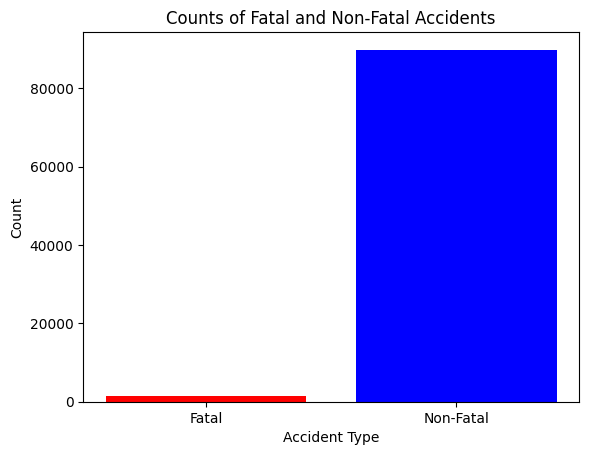

In [255]:
# Specify different colors for each bar
colors = ['red', 'blue']

plt.bar(['Fatal', 'Non-Fatal'], [fatal_no, non_fatal_no], color=colors)
plt.xlabel('Accident Type')
plt.ylabel('Count')
plt.title('Counts of Fatal and Non-Fatal Accidents')
plt.show()

In [256]:
# Balancing the data using RandomUnderSampler
Acc_df_balanced, fatal_df_balanced = RandomUnderSampler().fit_resample(Acc_df, fatal_Acc_df)
Acc_df_balanced

accident_index  accident_year accident_reference  location_easting_osgr   
71082  2020460940197           2020          460940197               575326.0  \
36311  2020140945588           2020          140945588               449868.0   
33661  20201373B0703           2020          1373B0703               415224.0   
75467  2020470970277           2020          470970277               529691.0   
6799   2020010249037           2020          010249037               547257.0   
...              ...            ...                ...                    ...   
90965  2020991006874           2020          991006874               254367.0   
91047  2020991009077           2020          991009077               270790.0   
91078  2020991010035           2020          991010035               113410.0   
91089  2020991010115           2020          991010115               381609.0   
91111  2020991010320           2020          991010320               381719.0   

       location_northing_osgr  longitude   latitude  police_force   
71082                158245.0   0.513401  51.296336            46  \
36311                402340.0  -1.249427  53.515400            14   
33661                417867.0  -1.771121  53.657092            13   
75467                120095.0  -0.154446  50.965682            47   
6799                 179610.0   0.119978  51.496258             1   
...                       ...        ...        ...           ...   
90965                661245.0  -4.326142  55.822415            99   
91047                659812.0  -4.063523  55.814225            99   
91078                903322.0  -6.842655  57.926736            99   
91089                654146.0  -2.294786  55.780278            99   
91111                665575.0  -2.293805  55.882969            99   

       accident_severity  number_of_vehicles  ...  light_conditions   
71082                  3                   2  ...                 1  \
36311                  3                   2  ...                 1   
33661                  2                   2  ...                 1   
75467                  3                   3  ...                 1   
6799                   3                   2  ...                 1   
...                  ...                 ...  ...               ...   
90965                  1                   1  ...                 4   
91047                  1                   2  ...                 6   
91078                  1                   1  ...                 1   
91089                  1                   2  ...                 1   
91111                  1                   2  ...                 1   

      weather_conditions  road_surface_conditions special_conditions_at_site   
71082                  1                        1                          0  \
36311                  1                        1                          0   
33661                  2                        2                          0   
75467                  1                        1                          0   
6799                   1                        1                          0   
...                  ...                      ...                        ...   
90965                  1                        2                          0   
91047                  1                        2                          0   
91078                  1                        1                          0   
91089                  1                        2                          0   
91111                  8                        4                          0   

       carriageway_hazards urban_or_rural_area   
71082                    0                   2  \
36311                    0                   2   
33661                    0                   1   
75467                    0                   2   
6799                     0                   1   
...                    ...                 ...   
90965                    0              

In [257]:
# Sanity Check

# Count the occurrences of True (fatal) and False (non-fatal) values in y_label
fatal_no = fatal_df_balanced.value_counts()[True]
non_fatal_no = fatal_df_balanced.value_counts()[False]

# Print the counts
print("Number of fatal accidents:", fatal_no)
print("Number of non-fatal accidents:", non_fatal_no)

Number of fatal accidents: 1391
Number of non-fatal accidents: 1391


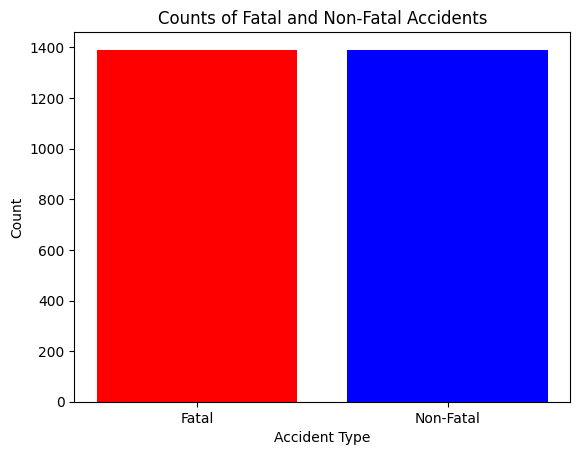

In [258]:
# Specify different colors for each bar
colors = ['red', 'blue']

plt.bar(['Fatal', 'Non-Fatal'], [fatal_no, non_fatal_no], color=colors)
plt.xlabel('Accident Type')
plt.ylabel('Count')
plt.title('Counts of Fatal and Non-Fatal Accidents')
plt.show()

- The data is now balanced

##### Feature Selection Using Filtering

In [243]:
#remove the accident_severity and did_police_attend_scene_of_accident from the balanced data frame
# List of columns to drop
columns_to_drop = ['accident_severity', 'did_police_officer_attend_scene_of_accident']

# Create a new DataFrame with the dropped columns
dropped_df = Acc_df_balanced[columns_to_drop]

# Remove the specified columns from the original DataFrame
Acc_df_corr = Acc_df_balanced.drop(columns=columns_to_drop)

# Print the new DataFrame without the dropped columns
Acc_df_corr.columns

# Check the DataFrame with the dropped columns
# print(dropped_df)

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'trunk_road_flag', 'lsoa_of_accident_location',
       'hour_of_day'],
      dtype='object')

In [244]:
#select the numerical columns only. 
Acc_df_num = Acc_df_corr.select_dtypes([np.number]) 
Acc_df_num.columns

Index(['accident_year', 'location_easting_osgr', 'location_northing_osgr',
       'longitude', 'latitude', 'police_force', 'number_of_vehicles',
       'number_of_casualties', 'day_of_week', 'local_authority_district',
       'first_road_class', 'first_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', 'second_road_class',
       'second_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'trunk_road_flag', 'hour_of_day'],
      dtype='object')

In [246]:
#Generate the best features for the model
selector = SelectKBest(f_classif, k=12)
selector.fit(Acc_df_num, fatal_df_balanced)

C:\Users\760988\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\760988\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


SelectKBest(k=12)

In [247]:
mask = selector.get_support()
names = selector.feature_names_in_[mask]
scores = selector.scores_[mask]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'location_easting_osgr'),
  Text(1, 0, 'location_northing_osgr'),
  Text(2, 0, 'latitude'),
  Text(3, 0, 'police_force'),
  Text(4, 0, 'number_of_casualties'),
  Text(5, 0, 'local_authority_district'),
  Text(6, 0, 'first_road_class'),
  Text(7, 0, 'speed_limit'),
  Text(8, 0, 'junction_control'),
  Text(9, 0, 'second_road_class'),
  Text(10, 0, 'light_conditions'),
  Text(11, 0, 'urban_or_rural_area')])

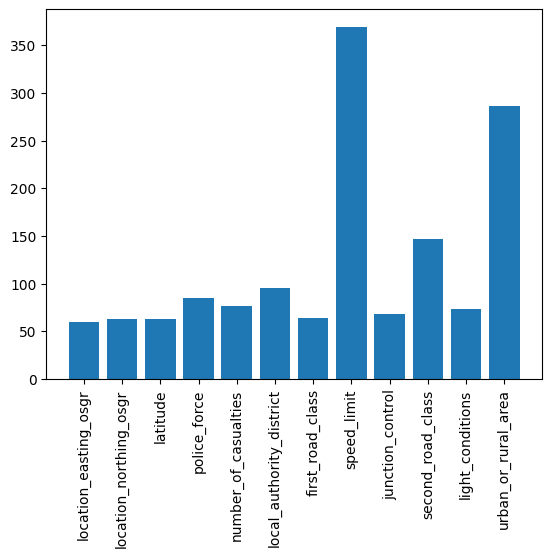

In [248]:
#plot a bar chart of the features and scores
plt.bar(names, scores)
plt.xticks(rotation='vertical')

In [249]:
#create a new df for the correlation with the selected columns above
feature_selected_df = Acc_df_balanced[names]
feature_selected_df

location_easting_osgr  location_northing_osgr   latitude  police_force   
27266               368759.0                403857.0  53.530451             6  \
27193               356851.0                402758.0  53.519726             6   
56630               619571.0                241838.0  52.031474            37   
25881               383721.0                395208.0  53.453391             6   
83353               394984.0                 98558.0  50.786561            55   
...                      ...                     ...        ...           ...   
90965               254367.0                661245.0  55.822415            99   
91047               270790.0                659812.0  55.814225            99   
91078               113410.0                903322.0  57.926736            99   
91089               381609.0                654146.0  55.780278            99   
91111               381719.0                665575.0  55.882969            99   

       number_of_casualties  local_authority_district  first_road_class   
27266                     1                       114                 3  \
27193                     1                       114                 3   
56630                     1                       412                 6   
25881                     1                       102                 5   
83353                     1                       644                 3   
...                     ...                       ...               ...   
90965                     1                       926                 4   
91047                     1                       938                 1   
91078                     1                       941                 3   
91089                     1                       914                 3   
91111                     1                       914                 3   

       speed_limit  junction_control  second_road_class  light_conditions   
27266           30                 5                  0                 1  \
27193           30                 2                  6                 4   
56630           30                 2                  6                 1   
25881           30                 4                  6                 4   
83353           60                 4                  3                 4   
...            ...               ...                ...               ...   
90965           40                 5                  0                 4   
91047           70                 5                  0                 6   
91078           60                 5                  0                 1   
91089           60                 5                  0                 1   
91111           60                 5                  0                 1   

       urban_or_rural_area  
27266                    1  
27193                    1  
56630                    1  
25881                    1  
83353                    2  
...                    ...  
90965                    1  
91047                    1  
91078                    2  
91089                    2  
91111                    2  

[2782 rows x 12 columns]

In [252]:
cols = feature_selected_df.columns

for col in cols:
    count = (feature_selected_df[col] == -1).sum()
    if count > 0:
        print(f"There are {count} occurences of -1 in {col}")
    else:
        print('None')
    

None
None
None
None
None
None
None
None
None
None
None
None


#### Model building

In [259]:
X = feature_selected_df
X

location_easting_osgr  location_northing_osgr   latitude  police_force   
27266               368759.0                403857.0  53.530451             6  \
27193               356851.0                402758.0  53.519726             6   
56630               619571.0                241838.0  52.031474            37   
25881               383721.0                395208.0  53.453391             6   
83353               394984.0                 98558.0  50.786561            55   
...                      ...                     ...        ...           ...   
90965               254367.0                661245.0  55.822415            99   
91047               270790.0                659812.0  55.814225            99   
91078               113410.0                903322.0  57.926736            99   
91089               381609.0                654146.0  55.780278            99   
91111               381719.0                665575.0  55.882969            99   

       number_of_casualties  local_authority_district  first_road_class   
27266                     1                       114                 3  \
27193                     1                       114                 3   
56630                     1                       412                 6   
25881                     1                       102                 5   
83353                     1                       644                 3   
...                     ...                       ...               ...   
90965                     1                       926                 4   
91047                     1                       938                 1   
91078                     1                       941                 3   
91089                     1                       914                 3   
91111                     1                       914                 3   

       speed_limit  junction_control  second_road_class  light_conditions   
27266           30                 5                  0                 1  \
27193           30                 2                  6                 4   
56630           30                 2                  6                 1   
25881           30                 4                  6                 4   
83353           60                 4                  3                 4   
...            ...               ...                ...               ...   
90965           40                 5                  0                 4   
91047           70                 5                  0                 6   
91078           60                 5                  0                 1   
91089           60                 5                  0                 1   
91111           60                 5                  0                 1   

       urban_or_rural_area  
27266                    1  
27193                    1  
56630                    1  
25881                    1  
83353                    2  
...                    ...  
90965                    1  
91047                    1  
91078                    2  
91089                    2  
91111                    2  

[2782 rows x 12 columns]

In [260]:
y = fatal_df_balanced
y.values

array([False, False, False, ...,  True,  True,  True])

In [261]:
y_target = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size = 0.2, random_state = 42)

In [262]:
dec_tree = DecisionTreeClassifier(criterion='gini')

In [263]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [264]:
y_pred = dec_tree.predict(X_test)

<Axes: >

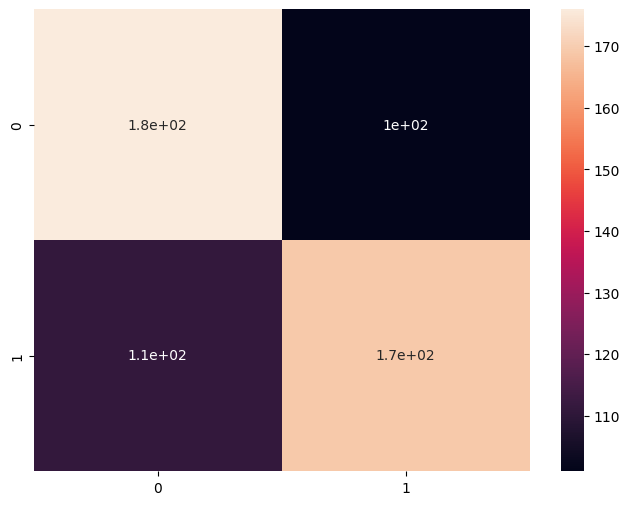

In [265]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [266]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.61      0.64      0.62       277
        True       0.63      0.60      0.61       280

    accuracy                           0.62       557
   macro avg       0.62      0.62      0.62       557
weighted avg       0.62      0.62      0.62       557



In [267]:
importance_df = pd.DataFrame(np.array([dec_tree.feature_names_in_, dec_tree.feature_importances_]).T, columns=['Feature', 'Importance'])

In [268]:
importance_df.sort_values('Importance', ascending=False)

Feature Importance
0      location_easting_osgr   0.295959
2                   latitude   0.127953
1     location_northing_osgr   0.118516
7                speed_limit    0.11482
5   local_authority_district   0.108612
6           first_road_class   0.061305
4       number_of_casualties   0.041974
9          second_road_class   0.034821
10          light_conditions   0.029668
3               police_force   0.027608
8           junction_control    0.02416
11       urban_or_rural_area   0.014606

In [270]:
X= feature_selected_df.drop([ 'junction_control', 'urban_or_rural_area', 'police_force'], axis = 1)

In [271]:
X

location_easting_osgr  location_northing_osgr   latitude   
27266               368759.0                403857.0  53.530451  \
27193               356851.0                402758.0  53.519726   
56630               619571.0                241838.0  52.031474   
25881               383721.0                395208.0  53.453391   
83353               394984.0                 98558.0  50.786561   
...                      ...                     ...        ...   
90965               254367.0                661245.0  55.822415   
91047               270790.0                659812.0  55.814225   
91078               113410.0                903322.0  57.926736   
91089               381609.0                654146.0  55.780278   
91111               381719.0                665575.0  55.882969   

       number_of_casualties  local_authority_district  first_road_class   
27266                     1                       114                 3  \
27193                     1                       114                 3   
56630                     1                       412                 6   
25881                     1                       102                 5   
83353                     1                       644                 3   
...                     ...                       ...               ...   
90965                     1                       926                 4   
91047                     1                       938                 1   
91078                     1                       941                 3   
91089                     1                       914                 3   
91111                     1                       914                 3   

       speed_limit  second_road_class  light_conditions  
27266           30                  0                 1  
27193           30                  6                 4  
56630           30                  6                 1  
25881           30                  6                 4  
83353           60                  3                 4  
...            ...                ...               ...  
90965           40                  0                 4  
91047           70                  0                 6  
91078           60                  0                 1  
91089           60                  0                 1  
91111           60                  0                 1  

[2782 rows x 9 columns]

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size = 0.2, random_state = 42)

In [273]:
dectree = DecisionTreeClassifier(criterion='gini')

In [274]:
dectree.fit(X_train, y_train)

DecisionTreeClassifier()

In [276]:
y_pred = dectree.predict(X_test)

<Axes: >

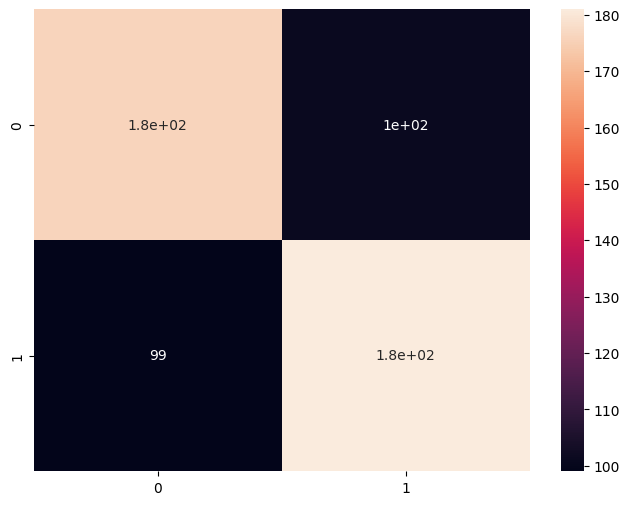

In [277]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [280]:
labels = ["Non-Fatal", "Fatal"]
dtree_cm = confusion_matrix(y_test,y_pred)
print(dtree_cm)

[[176 101]
 [ 99 181]]


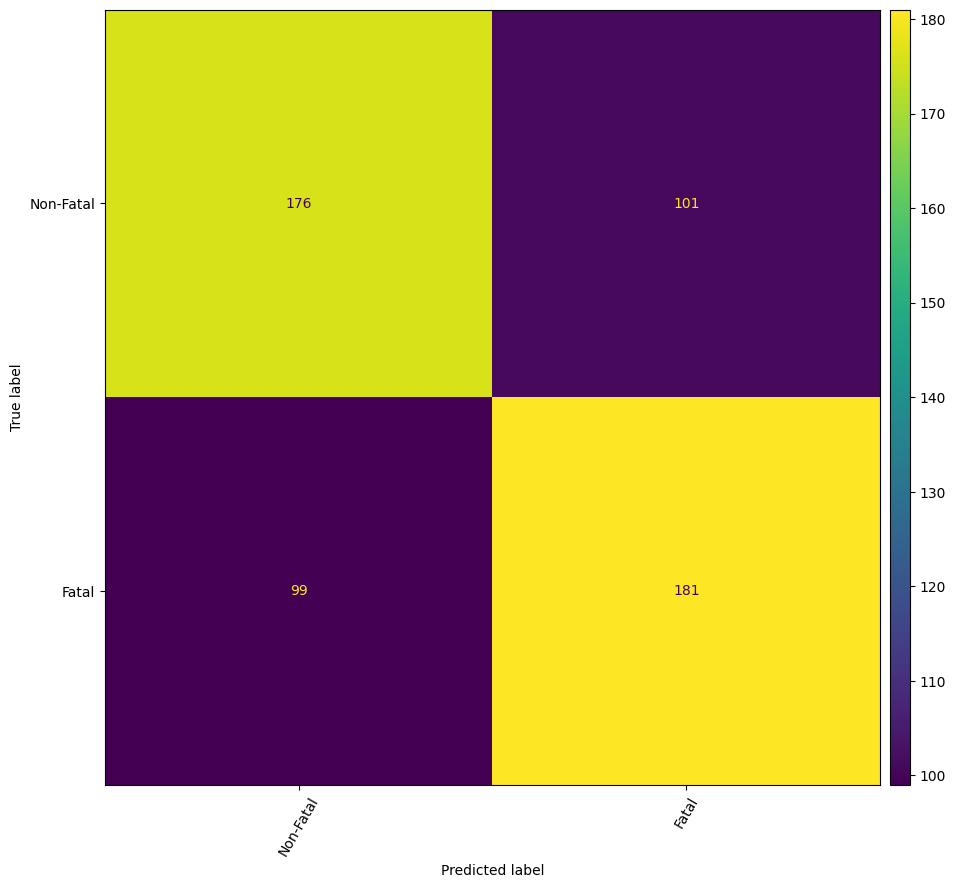

In [283]:
disp = ConfusionMatrixDisplay(confusion_matrix=dtree_cm, display_labels = labels)
fig, ax = plt.subplots(figsize=(10,18))
# Deactivate default colorbar
disp.plot(ax=ax, colorbar=False)
plt.xticks(rotation=60)
# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(disp.im_,  cax=cax)
plt.savefig("Dtree confusion_matrix.png", dpi=300, bbox_inches = "tight")
plt.show()

In [278]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.64      0.64      0.64       277
        True       0.64      0.65      0.64       280

    accuracy                           0.64       557
   macro avg       0.64      0.64      0.64       557
weighted avg       0.64      0.64      0.64       557



#### Using Random forest

In [287]:
#split train and test
X_train, X_test, y_target_train, y_target_test = train_test_split(X, y_target, test_size = 0.2, random_state = 42, stratify = y_target)

In [288]:
rf =RandomForestClassifier()
rf.fit(X_train, y_target_train)

RandomForestClassifier()

In [289]:
y_pred = rf.predict(X_test)
y_pred

array([False, False,  True,  True,  True, False, False, False, False,
       False, False,  True,  True,  True, False, False, False,  True,
        True, False, False,  True,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True,  True,  True, False, False,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
       False, False,  True, False,  True, False, False,  True, False,
        True,  True,  True, False, False,  True, False,  True, False,
        True, False, False, False, False,  True, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
       False,  True, False,  True,  True, False,  True,  True, False,
        True,  True,  True,  True, False,  True, False, False,  True,
       False, False, False,  True,  True, False, False, False,  True,
        True, False,

In [290]:
labels = ["Non-Fatal", "Fatal"]
cm = confusion_matrix(y_target_test,y_pred)
print(cm)

[[194  85]
 [104 174]]


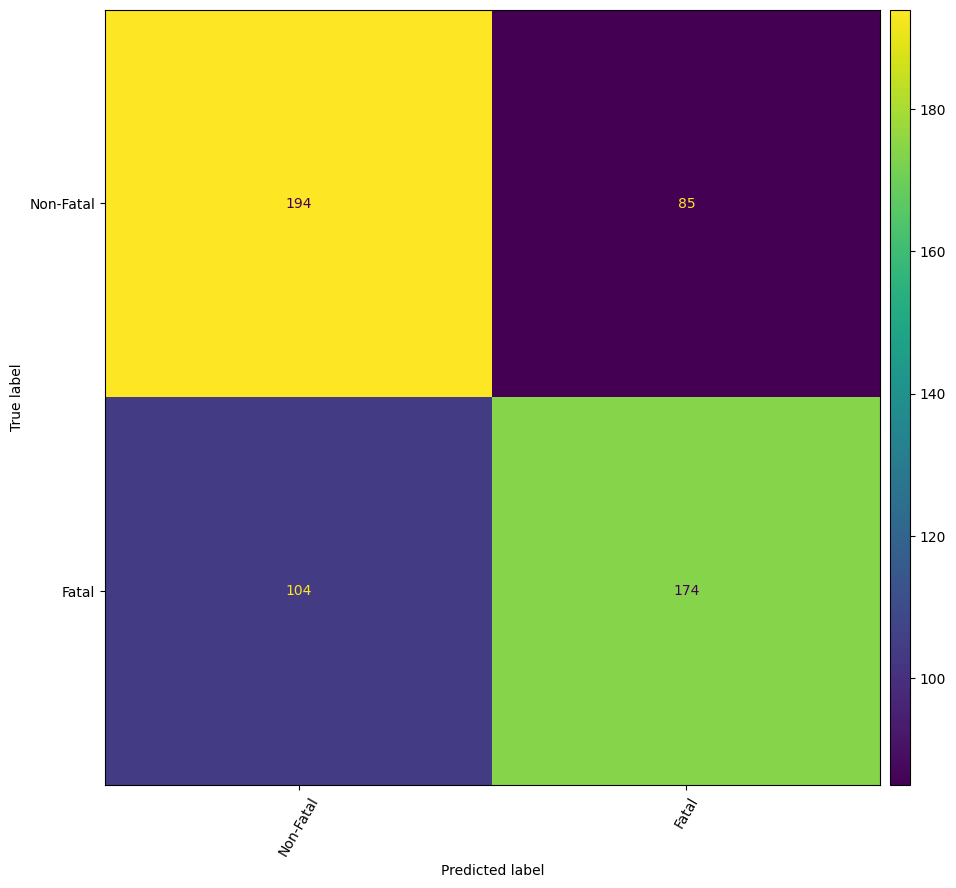

In [291]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
fig, ax = plt.subplots(figsize=(10,18))
# Deactivate default colorbar
disp.plot(ax=ax, colorbar=False)
plt.xticks(rotation=60)
# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(disp.im_,  cax=cax)
plt.savefig("confusion_matrix_lg3.png", dpi=300, bbox_inches = "tight")
plt.show()

In [294]:
print(classification_report(y_target_test,y_pred))

              precision    recall  f1-score   support

       False       0.65      0.70      0.67       279
        True       0.67      0.63      0.65       278

    accuracy                           0.66       557
   macro avg       0.66      0.66      0.66       557
weighted avg       0.66      0.66      0.66       557

